In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
metadata = pd.read_csv('../../adaptation_master_metadata.txt', sep='\t')
metadata.shape

(3634, 55)

In [159]:
metadata.head()

sample_name  box_id  cage_id collection_timepoint  \
0   12986.23B.Day7.1    10.0       23                 Day7   
1  12986.23B.Day7.10    10.0       23                 Day7   
2  12986.23B.Day7.11    10.0       23                 Day7   
3  12986.23B.Day7.12    10.0       23                 Day7   
4  12986.23B.Day7.13    14.0       23                 Day7   

  collection_timestamp date_colonized diet  elevation elevation_units  \
0        7/19/17 10:00   7/12/17 0:00   RC        193          meters   
1        7/19/17 10:00   7/12/17 0:00   RC        193          meters   
2        7/19/17 10:00   7/12/17 0:00   RC        193          meters   
3        7/19/17 10:00   7/12/17 0:00   RC        193          meters   
4        7/19/17 10:00   7/12/17 0:00   RC        193          meters   

            empo_1  ... zarrinparlab_quant_ng_ul mouse dam sire  \
0  Host-associated  ...                     78.0   23B  A1    A   
1  Host-associated  ...                     53.3   23B  A1    A   
2  Host-associated  ...                     80.6   23B  A1    A   
3  Host-associated  ...                     49.1   23B  A1    A   
4  Host-associated  ...                     48.6   23B  A1    A   

  date_collected bacteria_strain extraction_method     extraction_kit run  \
0        7/19/17            AZ20            filter  Qiagen UltraClean   1   
1        7/19/17            AZ20            filter  Qiagen UltraClean   1   
2        7/19/17            AZ20            filter  Qiagen UltraClean   1   
3        7/19/17            AZ20            filter  Qiagen UltraClean   1   
4        7/19/17            AZ20            filter  Qiagen UltraClean   1   

  plate  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 55 columns]

In [240]:
metadata['sample-id'] = metadata['sample_name'].str.replace('12986.', '', regex=False)

In [241]:
metadata['sample-id'] = metadata['sample-id'].str.replace('.', '_', regex=False)

In [242]:
metadata.set_index('sample-id', inplace=True)

In [243]:
metadata.head()

sample_name  box_id  cage_id collection_timepoint  \
sample-id                                                              
23B_Day7_1    12986.23B.Day7.1    10.0       23                 Day7   
23B_Day7_10  12986.23B.Day7.10    10.0       23                 Day7   
23B_Day7_11  12986.23B.Day7.11    10.0       23                 Day7   
23B_Day7_12  12986.23B.Day7.12    10.0       23                 Day7   
23B_Day7_13  12986.23B.Day7.13    14.0       23                 Day7   

            collection_timestamp date_colonized diet  elevation  \
sample-id                                                         
23B_Day7_1         7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_10        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_11        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_12        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_13        7/19/17 10:00   7/12/17 0:00   RC        193   

            elevation_units           empo_1  ... zarrinparlab_quant_ng_ul  \
sample-id                                     ...                            
23B_Day7_1           meters  Host-associated  ...                     78.0   
23B_Day7_10          meters  Host-associated  ...                     53.3   
23B_Day7_11          meters  Host-associated  ...                     80.6   
23B_Day7_12          meters  Host-associated  ...                     49.1   
23B_Day7_13          meters  Host-associated  ...                     48.6   

            mouse dam sire date_collected bacteria_strain extraction_method  \
sample-id                                                                     
23B_Day7_1    23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_10   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_11   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_12   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_13   23B  A1    A        7/19/17            AZ20            filter   

                extraction_kit run plate  
sample-id                                 
23B_Day7_1   Qiagen UltraClean   1   NaN  
23B_Day7_10  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_12  Qiagen UltraClean   1   NaN  
23B_Day7_13  Qiagen UltraClean   1   NaN  

[5 rows x 55 columns]

In [164]:
metadata.columns

Index(['sample_name', 'box_id', 'cage_id', 'collection_timepoint',
       'collection_timestamp', 'date_colonized', 'diet', 'elevation',
       'elevation_units', 'empo_1', 'empo_2', 'empo_3', 'env_biome',
       'env_feature', 'env_material', 'env_package', 'geo_loc_name',
       'host_age', 'host_age_units', 'host_body_habitat', 'host_body_product',
       'host_body_site', 'host_common_name', 'host_scientific_name',
       'host_subject_id', 'host_taxid', 'host_weight', 'host_weight_units',
       'iacuc_institute', 'iacuc_protocol_id', 'isolate_number', 'latitude',
       'latitude_units', 'life_stage', 'longitude', 'longitude_units',
       'mouse_dob', 'mouse_id', 'mouse_strain', 'qiita_study_id',
       'sample_type', 'scientific_name', 'sex', 'taxon_id', 'tube_id',
       'zarrinparlab_quant_ng_ul', 'mouse', 'dam', 'sire', 'date_collected',
       'bacteria_strain', 'extraction_method', 'extraction_kit', 'run',
       'plate'],
      dtype='object')

In [244]:
metadata.to_csv('MA_AZ20_output/metab_metadata.txt', sep='\t')

In [453]:
pan_outliers = ['23LL_Day3_12_S89',
 '23LL_Day3_15_S18',
 '23LL_Day3_8_S57',
 '23LL_Month1_24_S186',
 '25N_Day3_10_S75',
 '25N_Day3_23_S84',
 '25N_Day3_4_S27',
 '25N_Day3_7_S51',
 '25N_Day3_9_S67',
 '25N_Month1_21_S164',
 '25N_Month1_22_S172',
 '25N_Month1_2_S107',
 '23LL_Day7_13_S95',
 '24B_Day7_8_S8',
 '24N_Day7_23_S1316',
 '25L_Day7_14_S108',
 '25L_Day7_22_S1088',
 '25N_Month3_16_S257',
 '26B_Month3_23_S295',
 '26L_Day7_3_S86',
 '26N_Day7_14_S1104',
 '26N_Day7_19_S1109',
 '27L_Day7_10_S1024',
 '27N_Day7_10_S99',
 '27N_Day7_11_S99',
 '27N_Month6_4_S36',
 '27R_Month3_14_S328',
 '28LL_Day7_8_S1054',
 '28LL_Month3_14_S4',
 '28LL_Month3_17_S406',
 '28LL_Month3_19_S408',
 '28LL_Month3_21_S4',
 '28LL_Month3_24_S41',
 '28N_Month1_4_S125',
 '45L_Month3_2_S1627',
 '45L_Month3_4_S164',
 '45L_Month3_6_S1659',
 '45N_Month3_13_S1618',
 '45N_Month3_14_S1626',
 '45N_Month3_16_S1642',
 '45N_Month3_17_S165',
 '46L_Day7_10_S361',
 '46L_Day7_15_S306',
 '46L_Day7_18_S330',
 '46L_Day7_4_S313',
 '46L_Day7_7_S337',
 '46L_Month6_6_S1099',
 '46R_Day7_10_S363',
 '46R_Day7_15_S308',
 '46R_Day7_3_S307',
 '46R_Day7_5_S323',
 '46R_Day7_6_S331',
 '41LL_Month3_6_S1469',
 '41L_Month3_19_S1476',
 '41L_Month3_20_S1484',
 '42L_Month3_22_S1598',
 '42R_Month3_22_S16',
 '42R_Month3_6_S1567',
 '44B_Month6_22_S1792',
 '44N_Month1_11_S189',
 '44R_Month6_7_S1765',
 '45L_Day7_11_S1411',
 '45N_Month3_20_S1674',
 '45N_Month3_7_S1665',
 '43B_Month6_15_S984',
 '43R_Month6_18_S1006',
 '46L_Month6_15_S1076',
 '46L_Month6_16_S1084',
 '46L_Month6_21_S1124',
 '46L_Month6_2_S1067',
 '46N_Month6_14_S1066',
 '46N_Month6_15_S1074',
 '46N_Month6_19_S1106',
 '46R_Month6_13_S1062',
 '46R_Month6_14_S107',
 '46R_Month6_15_S1078',
 '46R_Month6_16_S1086',
 '46R_Month6_17_S1094',
 '46R_Month6_18_S1102',
 '46R_Month6_19_S111',
 '46R_Month6_20_S1118',
 '46R_Month6_21_S1126',
 '46R_Month6_22_S1134',
 '46R_Month6_23_S1142',
 '46R_Month6_24_S115']

In [459]:
new_pan_outliers = ['23LL_Day3_12',
 '23LL_Day3_15',
 '23LL_Day3_8',
 '23LL_Month1_24',
 '25N_Day3_10',
 '25N_Day3_23',
 '25N_Day3_4',
 '25N_Day3_7',
 '25N_Day3_9',
 '25N_Month1_21',
 '25N_Month1_22',
 '25N_Month1_2',
 '23LL_Day7_13',
 '24B_Day7_8',
 '24N_Day7_23',
 '25L_Day7_14',
 '25L_Day7_22',
 '25N_Month3_16',
 '26B_Month3_23',
 '26L_Day7_3',
 '26N_Day7_14',
 '26N_Day7_19',
 '27L_Day7_10',
 '27N_Day7_10',
 '27N_Day7_11',
 '27N_Month6_4',
 '27R_Month3_14',
 '28LL_Day7_8',
 '28LL_Month3_14',
 '28LL_Month3_17',
 '28LL_Month3_19',
 '28LL_Month3_21',
 '28LL_Month3_24',
 '28N_Month1_4',
 '45L_Month3_2',
 '45L_Month3_4',
 '45L_Month3_6',
 '45N_Month3_13',
 '45N_Month3_14',
 '45N_Month3_16',
 '45N_Month3_17',
 '46L_Day7_10',
 '46L_Day7_15',
 '46L_Day7_18',
 '46L_Day7_4',
 '46L_Day7_7',
 '46L_Month6_6',
 '46R_Day7_10',
 '46R_Day7_15',
 '46R_Day7_3',
 '46R_Day7_5',
 '46R_Day7_6',
 '41LL_Month3_6',
 '41L_Month3_19',
 '41L_Month3_20',
 '42L_Month3_22',
 '42R_Month3_22',
 '42R_Month3_6',
 '44B_Month6_22',
 '44N_Month1_11',
 '44R_Month6_7',
 '45L_Day7_11',
 '45N_Month3_20',
 '45N_Month3_7',
 '43B_Month6_15',
 '43R_Month6_18',
 '46L_Month6_15',
 '46L_Month6_16',
 '46L_Month6_21',
 '46L_Month6_2',
 '46N_Month6_14',
 '46N_Month6_15',
 '46N_Month6_19',
 '46R_Month6_13',
 '46R_Month6_14',
 '46R_Month6_15',
 '46R_Month6_16',
 '46R_Month6_17',
 '46R_Month6_18',
 '46R_Month6_19',
 '46R_Month6_20',
 '46R_Month6_21',
 '46R_Month6_22',
 '46R_Month6_23',
 '46R_Month6_24']

In [461]:
metadata.shape

(3634, 56)

In [462]:
metadata['sample_ident'] = metadata.index
metadata_non = metadata[~(metadata['sample_ident'].isin(new_pan_outliers))]
metadata_non.shape

(3549, 56)

In [463]:
metadata_non.to_csv('MA_AZ20_output/metab_metadata_removed_pangenome_outliers.txt', sep='\t')

# AZ20

In [464]:
AZ20_metab = pd.read_csv('MA_AZ20_output/metabolic_summary__module_completeness.tsv', sep='\t', index_col=[2, 1, 0])
AZ20_metab.head()

23B_Day7_11_S38_AZ20_mut.faa.ko  \
pathway group                   name                                               module                                    
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                            100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                             60.0   
                                Urea cycle                                         M00029                             60.0   
                                Creatine pathway                                   M00047                              0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                              0.0   

                                                                                           23B_Day7_12_S384_AZ20_mut.faa.ko  \
pathway group                   name                                               module                                     
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                             100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                              60.0   
                                Urea cycle                                         M00029                              60.0   
                                Creatine pathway                                   M00047                               0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                               0.0   

                                                                                           23B_Day7_13_S1294_AZ20_mut.faa.ko  \
pathway group                   name                                               module                                      
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                              100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                               60.0   
                                Urea cycle                                         M00029                               60.0   
                                Creatine pathway                                   M00047                                0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                0.0   

                                                                                           23B_Day7_14_S1295_AZ20_mut.faa.ko  \
pathway group                   name                                               module                                      
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                              100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                               60.0   
                                Urea cycle                                         M00029                               60.0   
                                Creatine pathway                                   M00047                                0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                0.0   

                                                                                           23B_Day7_16_S1297_AZ20_mut.faa.ko  \
pathway group                   name                                               module                                      
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                              100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                               60.0   
            

In [465]:
AZ20_metab.columns = AZ20_metab.columns.str.replace('_S([0-9]+)_AZ20_mut\.faa\.ko', '', regex=True)
AZ20_metab.columns = AZ20_metab.columns.str.replace('_S_AZ20_mut\.faa\.ko', '', regex=True)

In [466]:
AZ20_metab.head()

23B_Day7_11  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           23B_Day7_12  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           23B_Day7_13  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           23B_Day7_14  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           23B_Day7_16  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           23B_Day7_17  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, gl

In [467]:
AZ20_metab_forbiom = AZ20_metab.reset_index()
AZ20_metab_forbiom2 = AZ20_metab_forbiom.drop(columns=['name', 'pathway group'])
AZ20_metab_forbiom3 = AZ20_metab_forbiom2.rename(columns={'module': '#OTU ID'})
AZ20_metab_forbiom4 = AZ20_metab_forbiom3.set_index('#OTU ID')
AZ20_metab_forbiom4.head()

23B_Day7_11  23B_Day7_12  23B_Day7_13  23B_Day7_14  23B_Day7_16  \
#OTU ID                                                                    
M00015         100.0        100.0        100.0        100.0        100.0   
M00028          60.0         60.0         60.0         60.0         60.0   
M00029          60.0         60.0         60.0         60.0         60.0   
M00047           0.0          0.0          0.0          0.0          0.0   
M00763           0.0          0.0          0.0          0.0          0.0   

         23B_Day7_17  23B_Day7_18  23B_Day7_20  23B_Day7_21  23B_Day7_22  ...  \
#OTU ID                                                                   ...   
M00015         100.0        100.0        100.0        100.0        100.0  ...   
M00028          60.0         60.0         60.0         60.0         60.0  ...   
M00029          60.0         60.0         60.0         60.0         60.0  ...   
M00047           0.0          0.0          0.0          0.0          0.0  ...   
M00763           0.0          0.0          0.0          0.0          0.0  ...   

         30N_Day7_23  30N_Day7_24  30N_Day7_2  30N_Day7_3  30N_Day7_4  \
#OTU ID                                                                 
M00015         100.0        100.0       100.0       100.0       100.0   
M00028          60.0         60.0        60.0        60.0        60.0   
M00029          60.0         60.0        60.0        60.0        60.0   
M00047           0.0          0.0         0.0         0.0         0.0   
M00763           0.0          0.0         0.0         0.0         0.0   

         30N_Day7_5  30N_Day7_6  30N_Day7_7  30N_Day7_8  30N_Day7_9  
#OTU ID                                                              
M00015        100.0       100.0       100.0       100.0       100.0  
M00028         60.0        60.0        60.0        60.0        60.0  
M00029         60.0        60.0        60.0        60.0        60.0  
M00047          0.0         0.0         0.0         0.0         0.0  
M00763          0.0         0.0         0.0         0.0         0.0  

[5 rows x 1222 columns]

In [468]:
AZ20_metab_forbiom4.isnull().values.any()

False

In [469]:
print(list(AZ20_metab_forbiom4.columns))

['23B_Day7_11', '23B_Day7_12', '23B_Day7_13', '23B_Day7_14', '23B_Day7_16', '23B_Day7_17', '23B_Day7_18', '23B_Day7_20', '23B_Day7_21', '23B_Day7_22', '23B_Day7_23', '23B_Day7_24', '23B_Day7_2', '23B_Day7_3', '23B_Day7_4', '23B_Day7_5', '23B_Day7_6', '23B_Day7_7', '23B_Day7_8', '23B_Day7_9', '23B_Month3_10', '23B_Month3_11', '23B_Month3_12', '23B_Month3_13', '23B_Month3_14', '23B_Month3_15', '23B_Month3_16', '23B_Month3_17', '23B_Month3_18', '23B_Month3_19', '23B_Month3_1', '23B_Month3_20', '23B_Month3_21', '23B_Month3_22', '23B_Month3_23', '23B_Month3_24', '23B_Month3_2', '23B_Month3_3', '23B_Month3_4', '23B_Month3_5', '23B_Month3_6', '23B_Month3_7', '23B_Month3_8', '23B_Month3_9', '23B_Month6_10', '23B_Month6_11', '23B_Month6_12', '23B_Month6_13', '23B_Month6_14', '23B_Month6_15', '23B_Month6_16', '23B_Month6_17', '23B_Month6_18', '23B_Month6_19', '23B_Month6_1', '23B_Month6_20', '23B_Month6_21', '23B_Month6_22', '23B_Month6_23', '23B_Month6_24', '23B_Month6_2', '23B_Month6_3', '23B_

In [470]:
AZ20_metab_forbiom4.to_csv('MA_AZ20_output/AZ20_metab_all.tsv', sep='\t')

In [471]:
AZ20_metab_all = AZ20_metab.reset_index()
AZ20_metab_all2 = AZ20_metab_all.drop(columns=['name', 'module'])
AZ20_metab_all3 = AZ20_metab_all2.groupby(by=['pathway group']).mean()
AZ20_metab_all3.head()

23B_Day7_11  23B_Day7_12  23B_Day7_13  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 23B_Day7_14  23B_Day7_16  23B_Day7_17  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 23B_Day7_18  23B_Day7_20  23B_Day7_21  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 23B_Day7_22  ...  30N_Day7_23  30N_Day7_24  \
pathway group                                 ...                             
ATP synthesis                      14.144091  ...    14.144091    14.144091   
Arginine and proline metabolism    57.142500  ...    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000  ...    37.500000    37.500000   
Aromatics degradation               3.359048  ...     1.771905     2.565714   
Beta-Lactam biosynthesis            1.666000  ...     0.000000     0.000000   

                                 30N_Day7_2  30N_Day7_3  30N_Day7_4  \
pathway group                                                         
ATP synthesis                     14.144091   14.144091   13.007727   
Arginine and proline metabolism   57.142500   57.142500   57.142500   
Aromatic amino acid metabolism    37.500000   37.500000   37.500000   
Aromatics degradation              2.565714    2.565714    2.565714   
Beta-Lactam biosynthesis           0.000000    0.000000    0.000000   

                                 30N_Day7_5  30N_Day7_6  30N_Day7_7  \
pathway group                                                         
ATP synthesis                     14.144091   14.144091   14.144091   
Arginine and proline metabolism   57.142500   57.142500   57.142500   
Aromatic amino acid metabolism    37.500000   37.500000   37.500000   
Aromatics degradation              2.565714    3.359048    2.565714   
Beta-Lactam biosynthesis           0.000000    0.000000    0.000000   

                                 30N_Day7_8  30N_Day7_9  
pathway group                                            
ATP synthesis                     14.144091   14.144091  
Arginine and proline metabolism   57.142500   57.142500  
Aromatic amino acid metabolism    37.500000   37.500000  
Aromatics degradation              2.565714    2.565714  
Beta-Lactam biosynthesis           0.000000    0.000000  

[5 rows x 1222 columns]

In [472]:
pathways = AZ20_metab_all.groupby(by=['pathway group', 'name']).mean()
pathways.head()

23B_Day7_11  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_12  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_13  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_14  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_16  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_17  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_18  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_20  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       23B_Day7_21  \
pathway group name                                       

In [473]:
AZ20_metab_named = pd.merge(AZ20_metab_all3.T, metadata_non, left_index=True, right_index=True)
#merge with pathway groups
AZ20_metab_named.shape

(1174, 96)

In [474]:
AZ20_metab_named.head()

ATP synthesis  Arginine and proline metabolism  \
23B_Day7_11      14.144091                          57.1425   
23B_Day7_12      14.144091                          57.1425   
23B_Day7_13      14.144091                          57.1425   
23B_Day7_14      14.144091                          57.1425   
23B_Day7_16      14.144091                          57.1425   

             Aromatic amino acid metabolism  Aromatics degradation  \
23B_Day7_11                            37.5               2.565714   
23B_Day7_12                            37.5               2.565714   
23B_Day7_13                            37.5               2.565714   
23B_Day7_14                            37.5               2.565714   
23B_Day7_16                            37.5               2.565714   

             Beta-Lactam biosynthesis  \
23B_Day7_11                       0.0   
23B_Day7_12                       0.0   
23B_Day7_13                       0.0   
23B_Day7_14                       0.0   
23B_Day7_16                       0.0   

             Biosynthesis of other secondary metabolites  \
23B_Day7_11                                     6.315217   
23B_Day7_12                                     6.315217   
23B_Day7_13                                     6.315217   
23B_Day7_14                                     6.315217   
23B_Day7_16                                     6.315217   

             Branched-chain amino acid metabolism  Carbon fixation  \
23B_Day7_11                                51.446        40.505333   
23B_Day7_12                                51.446        40.505333   
23B_Day7_13                                51.446        40.505333   
23B_Day7_14                                51.446        40.505333   
23B_Day7_16                                51.446        40.505333   

             Central carbohydrate metabolism  Cofactor and vitamin metabolism  \
23B_Day7_11                        68.528125                        52.764516   
23B_Day7_12                        68.528125                        52.764516   
23B_Day7_13                        68.528125                        52.764516   
23B_Day7_14                        68.528125                        52.764516   
23B_Day7_16                        68.528125                        52.764516   

             ...  mouse  dam  sire  date_collected  bacteria_strain  \
23B_Day7_11  ...    23B   A1     A         7/19/17             AZ20   
23B_Day7_12  ...    23B   A1     A         7/19/17             AZ20   
23B_Day7_13  ...    23B   A1     A         7/19/17             AZ20   
23B_Day7_14  ...    23B   A1     A         7/19/17             AZ20   
23B_Day7_16  ...    23B   A1     A         7/19/17             AZ20   

             extraction_method     extraction_kit  run  plate  sample_ident  
23B_Day7_11             filter  Qiagen UltraClean    1    NaN   23B_Day7_11  
23B_Day7_12             filter  Qiagen UltraClean    1    NaN   23B_Day7_12  
23B_Day7_13             filter  Qiagen UltraClean    1    NaN   23B_Day7_13  
23B_Day7_14             filter  Qiagen UltraClean    1    NaN   23B_Day7_14  
23B_Day7_16             filter  Qiagen UltraClean    1    NaN   23B_Day7_16  

[5 rows x 96 columns]

In [475]:
AZ20_metab_named_min = pd.merge(AZ20_metab_all3.T, metadata_non[['cage_id', 'mouse', 'collection_timepoint']], left_index=True, right_index=True)

In [476]:
AZ20_metab_named_min['cage_id'] = AZ20_metab_named_min['cage_id'].astype(str)

In [477]:
AZ20_metab_named_groups = AZ20_metab_named_min.groupby(by=['cage_id', 'mouse', 'collection_timepoint']).mean()

In [478]:
AZ20_metab_named_groups

ATP synthesis  \
cage_id mouse collection_timepoint                  
23      23B   Day7                      14.144091   
              Month3                    14.104583   
              Month6                    14.144091   
        23LL  Day3                      14.144091   
              Day7                      14.144091   
...                                           ...   
29      29N   Day7                      14.144091   
              Month3                    14.144091   
        29R   Day7                      14.144091   
              Month3                    14.117035   
30      30N   Day7                      14.094684   

                                    Arginine and proline metabolism  \
cage_id mouse collection_timepoint                                    
23      23B   Day7                                        57.142500   
              Month3                                      57.295052   
              Month6                                      57.142500   
        23LL  Day3                                        57.142500   
              Day7                                        57.142500   
...                                                             ...   
29      29N   Day7                                        57.142500   
              Month3                                      57.142500   
        29R   Day7                                        57.150000   
              Month3                                      57.231786   
30      30N   Day7                                        57.142500   

                                    Aromatic amino acid metabolism  \
cage_id mouse collection_timepoint                                   
23      23B   Day7                                       37.500000   
              Month3                                     36.906840   
              Month6                                     37.500000   
        23LL  Day3                                       37.500000   
              Day7                                       37.500000   
...                                                            ...   
29      29N   Day7                                       37.500000   
              Month3                                     37.500000   
        29R   Day7                                       37.400764   
              Month3                                     37.443294   
30      30N   Day7                                       37.500000   

                                    Aromatics degradation  \
cage_id mouse collection_timepoint                          
23      23B   Day7                               2.605381   
              Month3                             2.598770   
              Month6                             2.565714   
        23LL  Day3                               2.565714   
              Day7                               2.565714   
...                                                   ...   
29      29N   Day7                               2.466488   
              Month3                             3.756190   
        29R   Day7                               2.565714   
              Month3                             2.565714   
30      30N   Day7                               2.565694   

                                    Beta-Lactam biosynthesis  \
cage_id mouse collection_timepoint                             
23      23B   Day7                                  0.083300   
              Month3                                0.069417   
              Month6                                0.000000   
        23LL  Day3                                  0.000000   
              Day7                                  0.000000   
...                                                      ...   
29      29N   Day7                                  0.000000   
              Month3                                0.000000   
        29R   Day7                                  0.000000   
             

In [479]:
AZ20_metab_named_groups.shape

(69, 40)

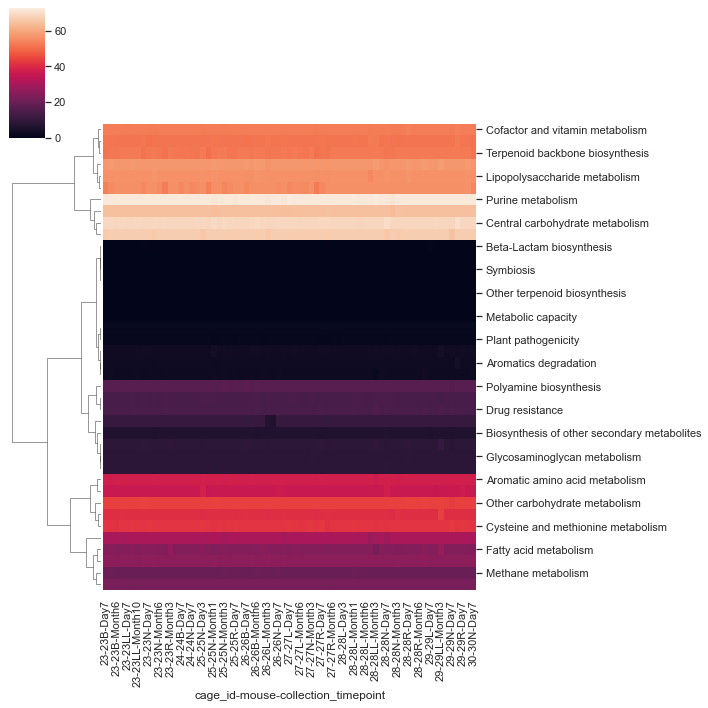

In [480]:
sns.clustermap(data=AZ20_metab_named_groups.T, col_cluster=False)

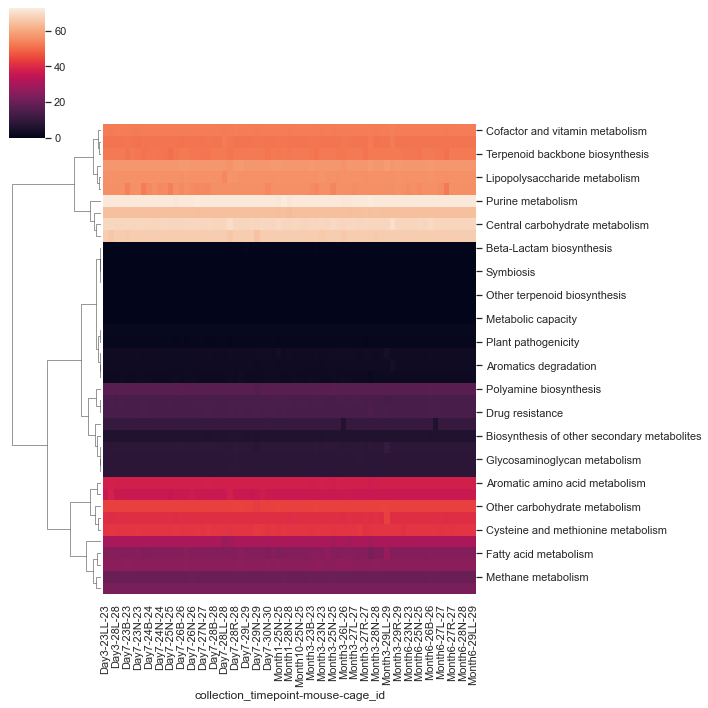

In [481]:
AZ20_metab_named_groups2 = AZ20_metab_named_min.groupby(by=['collection_timepoint', 'mouse', 'cage_id']).mean()
sns.clustermap(data=AZ20_metab_named_groups2.T, col_cluster=False)

In [482]:
AZ20_metab_named_mouse = pd.merge(AZ20_metab_all3.T, metadata_non[['mouse']], left_index=True, right_index=True)

In [483]:
AZ20_metab_named_mouse2 = AZ20_metab_named_mouse.groupby(by=['mouse']).mean()

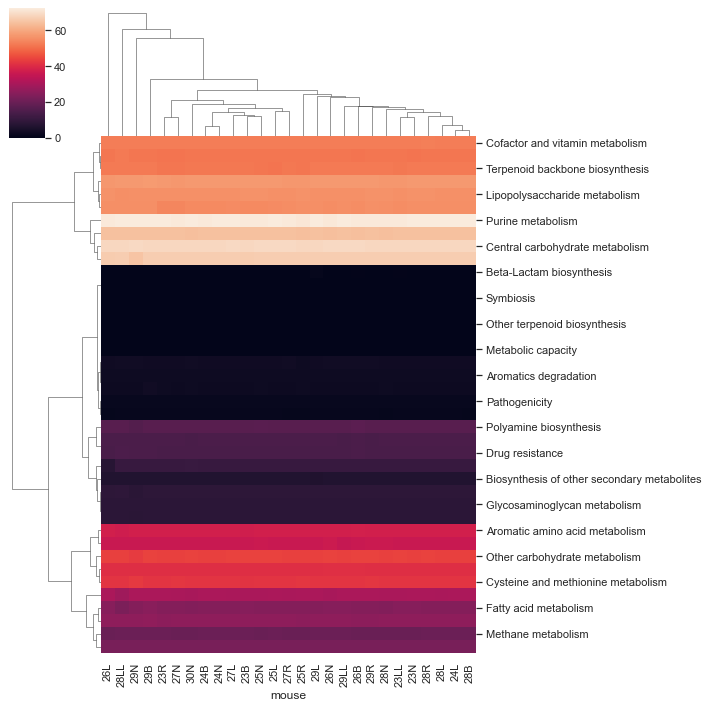

In [484]:
sns.clustermap(data=AZ20_metab_named_mouse2.T)

In [485]:
AZ20_metab_named_ctp = pd.merge(AZ20_metab_all3.T, metadata_non[['collection_timepoint']], left_index=True, right_index=True)

In [486]:
AZ20_metab_named_ctp2 = AZ20_metab_named_ctp.groupby(by=['collection_timepoint']).mean()

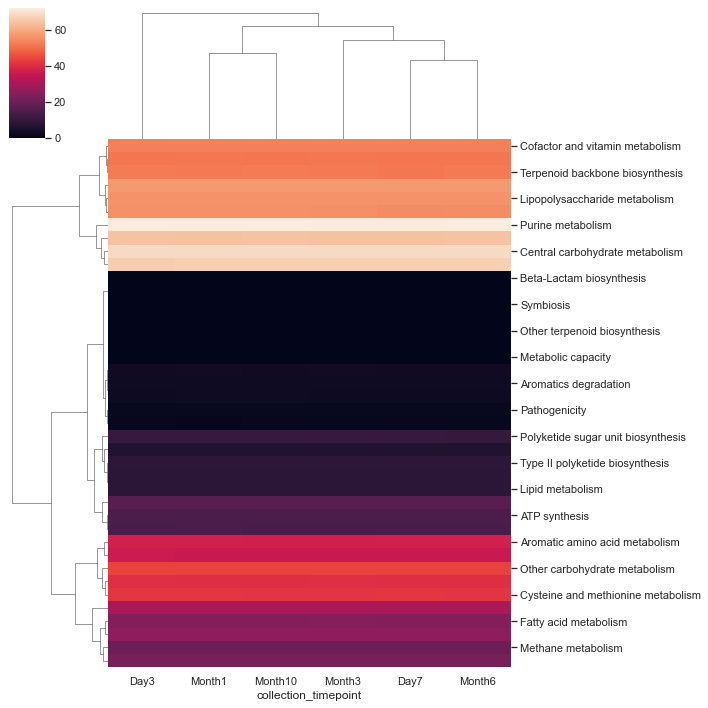

In [487]:
sns.clustermap(data=AZ20_metab_named_ctp2.T)

In [488]:
AZ20_metab_named_groups_stack = pd.DataFrame(AZ20_metab_named_groups.stack())
AZ20_metab_named_groups_stack.reset_index(inplace=True)
AZ20_metab_named_groups_stack.rename(columns={'level_3':'pathway_group', 0:'Mean % Present'}, inplace=True)
AZ20_metab_named_groups_stack

cage_id mouse collection_timepoint                    pathway_group  \
0         23   23B                 Day7                    ATP synthesis   
1         23   23B                 Day7  Arginine and proline metabolism   
2         23   23B                 Day7   Aromatic amino acid metabolism   
3         23   23B                 Day7            Aromatics degradation   
4         23   23B                 Day7         Beta-Lactam biosynthesis   
...      ...   ...                  ...                              ...   
2755      30   30N                 Day7              Sterol biosynthesis   
2756      30   30N                 Day7                Sulfur metabolism   
2757      30   30N                 Day7                        Symbiosis   
2758      30   30N                 Day7  Terpenoid backbone biosynthesis   
2759      30   30N                 Day7  Type II polyketide biosynthesis   

      Mean % Present  
0          14.144091  
1          57.142500  
2          37.500000  
3           2.605381  
4           0.083300  
...              ...  
2755        0.000000  
2756       22.223333  
2757        0.000000  
2758       51.744161  
2759        8.576250  

[2760 rows x 5 columns]

In [489]:
AZ20_metab_named_groups_stack['collection_timepoint'] = pd.Categorical(AZ20_metab_named_groups_stack['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [490]:
AZ20_metab_named_groups_stack_sorted = AZ20_metab_named_groups_stack.sort_values('collection_timepoint')

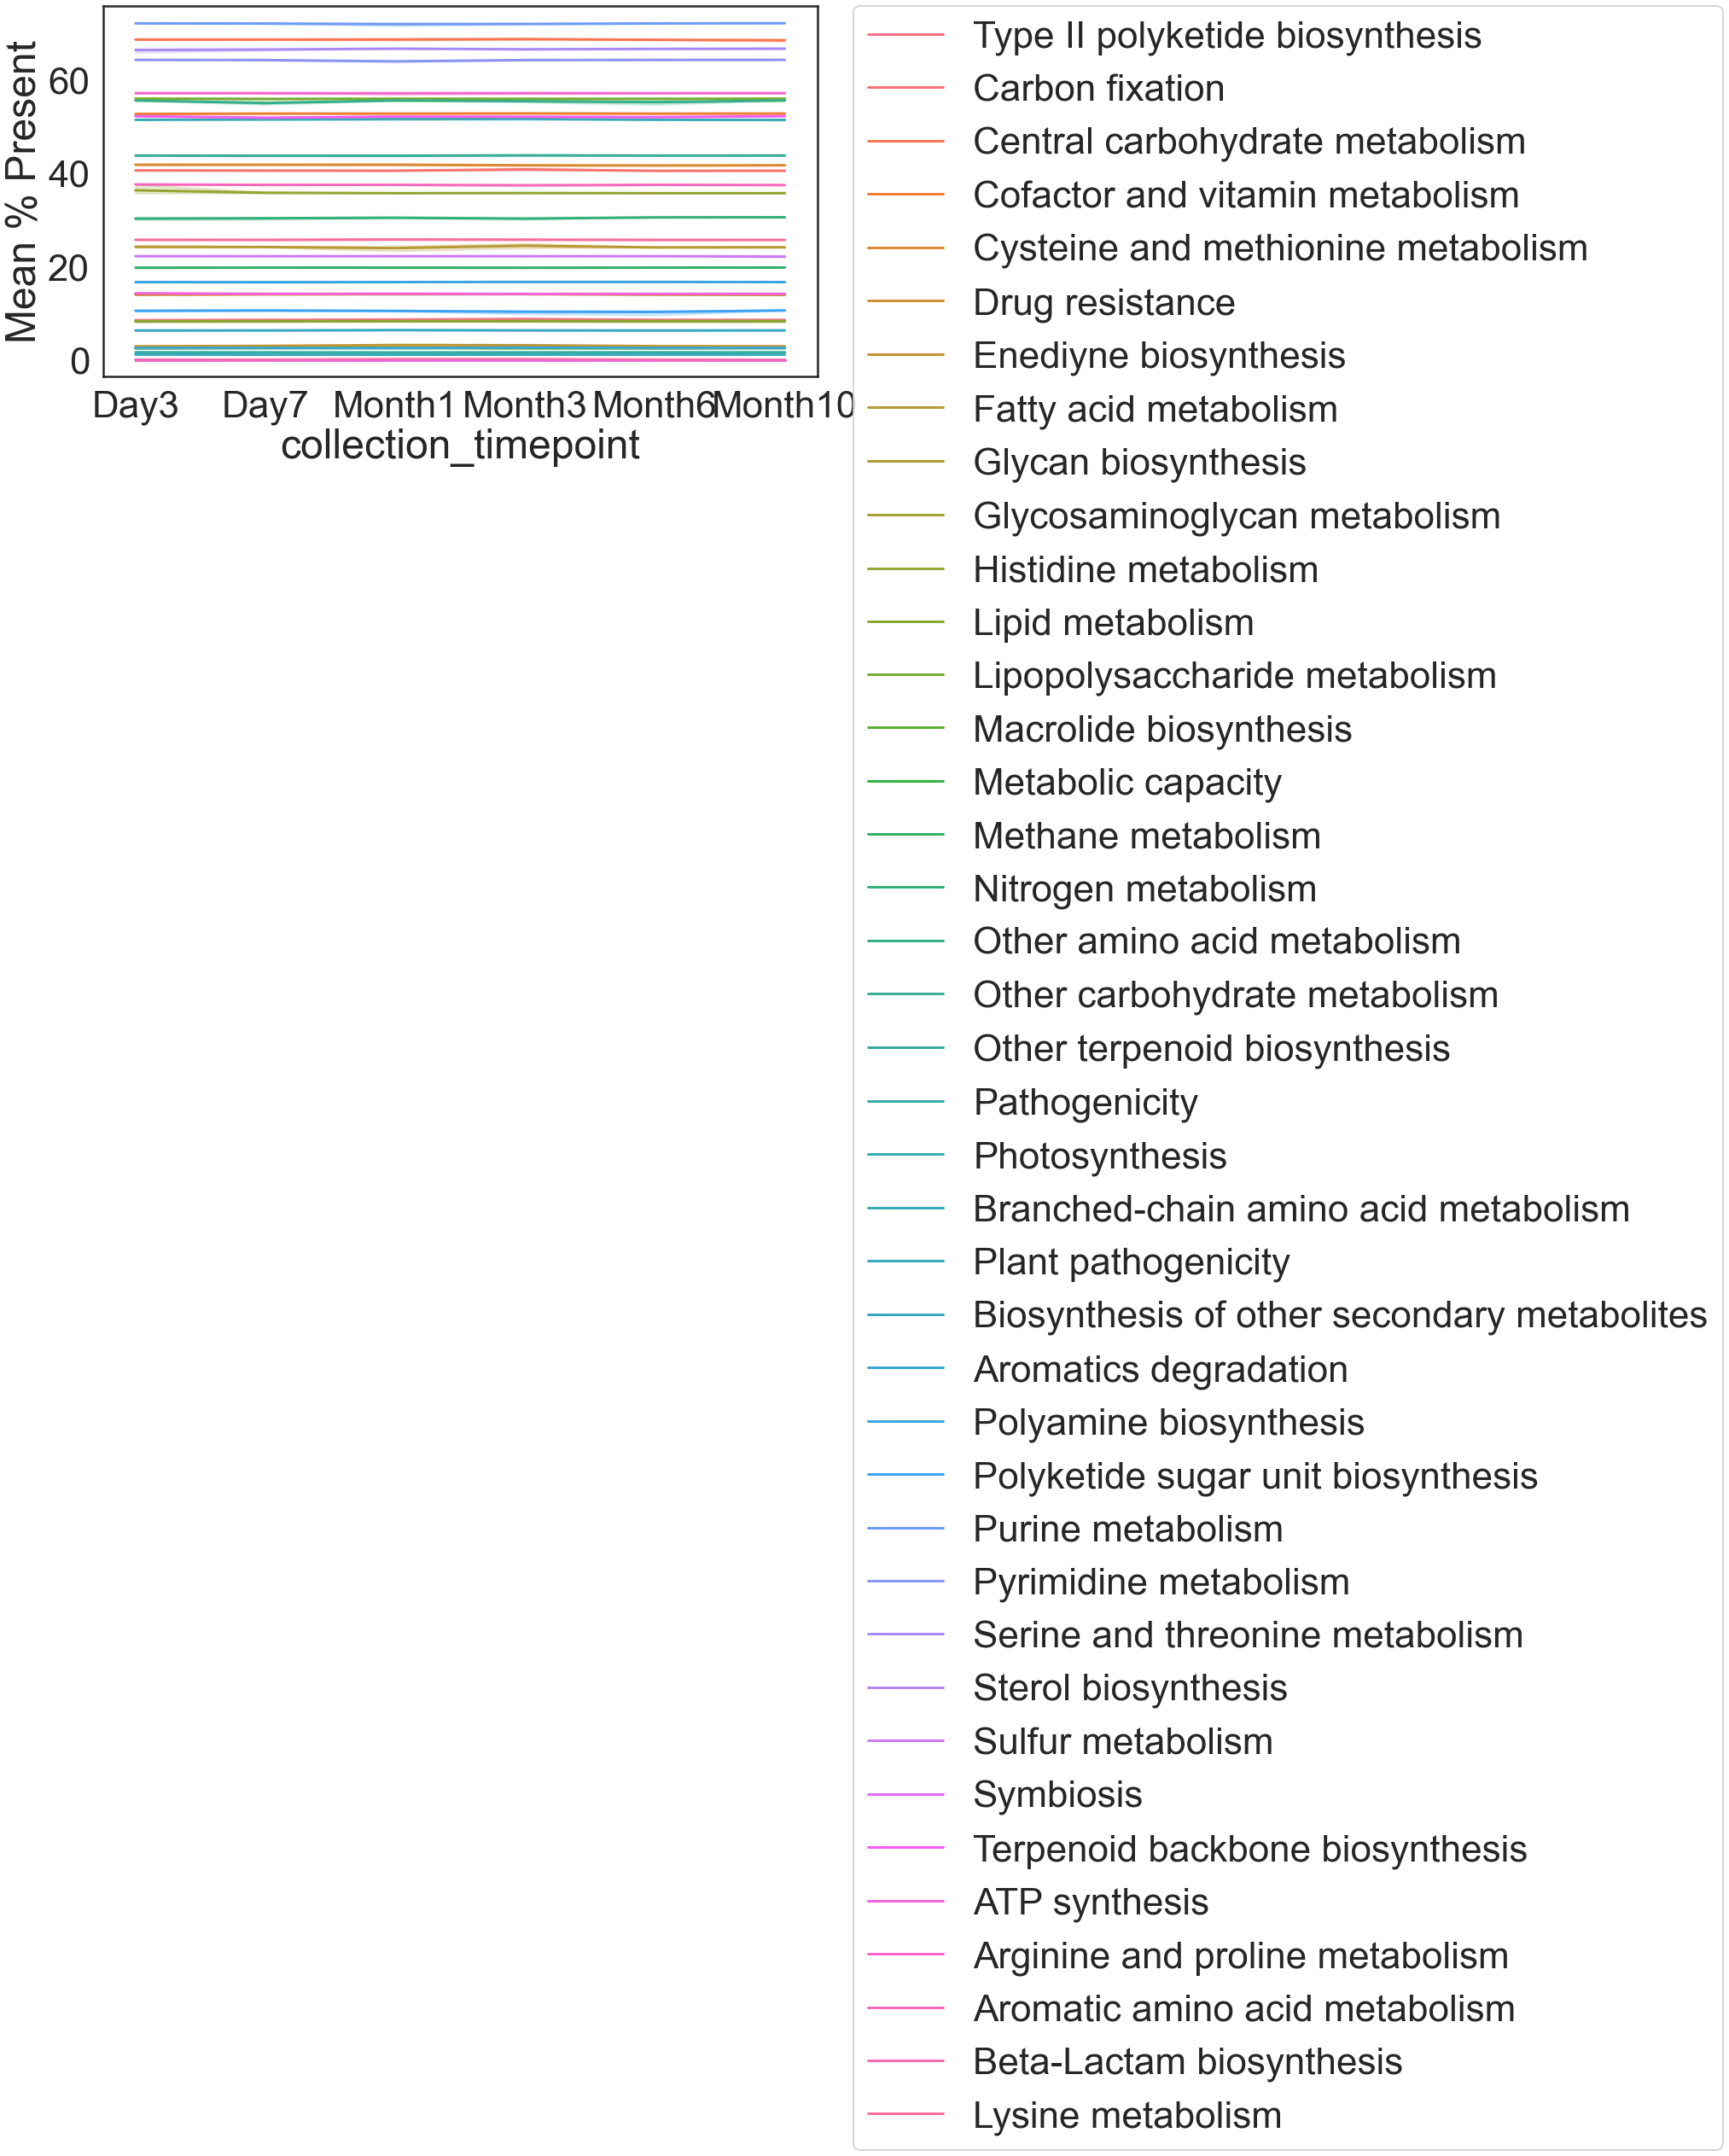

In [609]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('white')
sns.set_context('poster', font_scale=2)
g = sns.lineplot(data=AZ20_metab_named_groups_stack_sorted, x='collection_timepoint', 
             y='Mean % Present',
             hue='pathway_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Delta by Pathway Group

In [492]:
AZ20_change = AZ20_metab_named_groups
AZ20_change2 = AZ20_change.drop(index=['Month3', 'Day3', 'Month10', 'Month1'], level=2)
AZ20_change2.reset_index()

cage_id mouse collection_timepoint  ATP synthesis  \
0       23   23B                 Day7      14.144091   
1       23   23B               Month6      14.144091   
2       23  23LL                 Day7      14.144091   
3       23   23N                 Day7      14.144091   
4       23   23N               Month6      14.144091   
5       23   23R                 Day7      14.278580   
6       23   23R               Month6      14.144091   
7       24   24B                 Day7      14.144091   
8       24   24L                 Day7      14.144091   
9       24   24N                 Day7      14.144091   
10      25   25L                 Day7      14.144091   
11      25   25N                 Day7      14.267443   
12      25   25N               Month6      14.144091   
13      25   25R                 Day7      14.144091   
14      25   25R               Month6      14.144091   
15      26   26B                 Day7      14.144091   
16      26   26B               Month6      14.332254   
17      26   26L                 Day7      14.144091   
18      26   26L               Month6      14.144091   
19      26   26N                 Day7      14.144091   
20      27   27L                 Day7      14.212975   
21      27   27L               Month6      14.144091   
22      27   27N                 Day7      14.144091   
23      27   27N               Month6      14.144091   
24      27   27R                 Day7      14.144091   
25      27   27R               Month6      14.144091   
26      28   28B                 Day7      14.144091   
27      28   28L                 Day7      14.144091   
28      28   28L               Month6      14.144091   
29      28  28LL                 Day7      14.144091   
30      28   28N                 Day7      14.387597   
31      28   28N               Month6      14.144091   
32      28   28R                 Day7      14.144091   
33      28   28R               Month6      14.144091   
34      29   29B                 Day7      14.144091   
35      29   29L                 Day7      14.144091   
36      29  29LL                 Day7      14.142008   
37      29  29LL               Month6      14.144091   
38      29   29N                 Day7      14.144091   
39      29   29R                 Day7      14.144091   
40      30   30N                 Day7      14.094684   

    Arginine and proline metabolism  Aromatic amino acid metabolism  \
0                         57.142500                       37.500000   
1                         57.142500                       37.500000   
2                         57.142500                       37.500000   
3                         57.142500                       37.450382   
4                         57.142500                       37.500000   
5                         57.142500                       37.500000   
6                         57.142500                       37.500000   
7                         57.142500                       37.500000   
8                         57.142500                       37.500000   
9                         57.142500                       37.500000   
10                        57.142500                       37.500000   
11                        57.142500                       37.500000   
12                        57.142500                       37.500000   
13                        57.034318                       37.405303   
14                        57.142500                       37.500000   
15                        57.298750                       37.586823   
16                        57.220677                       37.500000   
17                        57.241736                       37.500000   
18                        57.142500                       37.500000   
19                        57.142500                       37.443294   
20                        57.142500                       37.500000   
21                        57.142500                       37.500000   
22               

In [493]:
table = pd.pivot_table(AZ20_change2, values=AZ20_change.columns, index=['cage_id', 'mouse'], columns=['collection_timepoint'], aggfunc=np.mean)

In [494]:
table

ATP synthesis            Arginine and proline metabolism  \
collection_timepoint          Day7     Month6                            Day7   
cage_id mouse                                                                   
23      23B              14.144091  14.144091                       57.142500   
        23LL             14.144091        NaN                       57.142500   
        23N              14.144091  14.144091                       57.142500   
        23R              14.278580  14.144091                       57.142500   
24      24B              14.144091        NaN                       57.142500   
        24L              14.144091        NaN                       57.142500   
        24N              14.144091        NaN                       57.142500   
25      25L              14.144091        NaN                       57.142500   
        25N              14.267443  14.144091                       57.142500   
        25R              14.144091  14.144091                       57.034318   
26      26B              14.144091  14.332254                       57.298750   
        26L              14.144091  14.144091                       57.241736   
        26N              14.144091        NaN                       57.142500   
27      27L              14.212975  14.144091                       57.142500   
        27N              14.144091  14.144091                       56.897426   
        27R              14.144091  14.144091                       57.121458   
28      28B              14.144091        NaN                       57.142500   
        28L              14.144091  14.144091                       57.142500   
        28LL             14.144091        NaN                       57.142500   
        28N              14.387597  14.144091                       56.207321   
        28R              14.144091  14.144091                       57.440208   
29      29B              14.144091        NaN                       57.589063   
        29L              14.144091        NaN                       57.142500   
        29LL             14.142008  14.144091                       57.142500   
        29N              14.144091        NaN                       57.142500   
        29R              14.144091        NaN                       57.150000   
30      30N              14.094684        NaN                       57.142500   

                                Aromatic amino acid metabolism         \
collection_timepoint     Month6                           Day7 Month6   
cage_id mouse                                                           
23      23B           57.142500                      37.500000   37.5   
        23LL                NaN                      37.500000    NaN   
        23N           57.142500                      37.450382   37.5   
        23R           57.142500                      37.500000   37.5   
24      24B                 NaN                      37.500000    NaN   
        24L                 NaN                      37.500000    NaN   
        24N                 NaN                      37.500000    NaN   
25      25L                 NaN                      37.500000    NaN   
        25N           57.142500                      37.500000   37.5   
        25R           57.142500                      37.405303   37.5   
26      26B           57.220677                      37.586823   37.5   
        26L           57.142500                      37.500000   37.5   
        26N                 NaN                      37.443294    NaN   
27      27L           57.142500                      37.500000   37.5   
        27N           56.794567                      37.500000   37.5   
        27R           57.142500                      37.673611   37.5   
28      28B                 NaN                      37.500000    NaN   
        28L           57.142500                      37.500000   37.5   
        28LL                NaN                      37.5

In [495]:
new_cols1 = [(x, 'Day7') for x in table.columns.levels[0]]
new_cols2 = [(x, 'Month6') for x in table.columns.levels[0]]

In [496]:
deltaz = [(table[x, 'Month6'] - table[x, 'Day7']) for x in table.columns.levels[0]]

In [497]:
for x in table.columns.levels[0]:
    table[x, 'delta'] = table[x, 'Month6'] - table[x, 'Day7']

In [498]:
table2 = table.groupby(axis=1, level=[0, 1]).mean()
table2

ATP synthesis                           \
collection_timepoint          Day7     Month6         delta   
cage_id mouse                                                 
23      23B              14.144091  14.144091 -3.552714e-15   
        23LL             14.144091        NaN           NaN   
        23N              14.144091  14.144091  0.000000e+00   
        23R              14.278580  14.144091 -1.344886e-01   
24      24B              14.144091        NaN           NaN   
        24L              14.144091        NaN           NaN   
        24N              14.144091        NaN           NaN   
25      25L              14.144091        NaN           NaN   
        25N              14.267443  14.144091 -1.233523e-01   
        25R              14.144091  14.144091 -1.776357e-15   
26      26B              14.144091  14.332254  1.881629e-01   
        26L              14.144091  14.144091 -5.329071e-15   
        26N              14.144091        NaN           NaN   
27      27L              14.212975  14.144091 -6.888430e-02   
        27N              14.144091  14.144091 -5.329071e-15   
        27R              14.144091  14.144091  1.776357e-15   
28      28B              14.144091        NaN           NaN   
        28L              14.144091  14.144091  0.000000e+00   
        28LL             14.144091        NaN           NaN   
        28N              14.387597  14.144091 -2.435065e-01   
        28R              14.144091  14.144091  1.776357e-15   
29      29B              14.144091        NaN           NaN   
        29L              14.144091        NaN           NaN   
        29LL             14.142008  14.144091  2.083333e-03   
        29N              14.144091        NaN           NaN   
        29R              14.144091        NaN           NaN   
30      30N              14.094684        NaN           NaN   

                     Arginine and proline metabolism                           \
collection_timepoint                            Day7     Month6         delta   
cage_id mouse                                                                   
23      23B                                57.142500  57.142500 -1.421085e-14   
        23LL                               57.142500        NaN           NaN   
        23N                                57.142500  57.142500  0.000000e+00   
        23R                                57.142500  57.142500  2.131628e-14   
24      24B                                57.142500        NaN           NaN   
        24L                                57.142500        NaN           NaN   
        24N                                57.142500        NaN           NaN   
25      25L                                57.142500        NaN           NaN   
        25N                                57.142500  57.142500  7.105427e-15   
        25R                                57.034318  57.142500  1.081818e-01   
26      26B                                57.298750  57.220677 -7.807292e-02   
        26L                                57.241736  57.142500 -9.923611e-02   
        26N                                57.142500        NaN           NaN   
27      27L                                57.142500  57.142500 -7.105427e-15   
        27N                                56.897426  56.794567 -1.028592e-01   
        27R                                57.121458  57.142500  2.104167e-02   
28      28B                                57.142500        NaN           NaN   
        28L                                57.142500  57.142500 -7.105427e-15   
        28LL                               57.142500        NaN           NaN   
        28N                                56.207321  57.142500  9.351786e-01   
        28R                                57.440208  57.142500 -2.977083e-01   
29      29B                                57.589063        NaN           NaN   
        29L                                57.142500        NaN           NaN   
        29LL            

In [499]:
table3 = table2.dropna(axis=0)
table3

ATP synthesis                           \
collection_timepoint          Day7     Month6         delta   
cage_id mouse                                                 
23      23B              14.144091  14.144091 -3.552714e-15   
        23N              14.144091  14.144091  0.000000e+00   
        23R              14.278580  14.144091 -1.344886e-01   
25      25N              14.267443  14.144091 -1.233523e-01   
        25R              14.144091  14.144091 -1.776357e-15   
26      26B              14.144091  14.332254  1.881629e-01   
        26L              14.144091  14.144091 -5.329071e-15   
27      27L              14.212975  14.144091 -6.888430e-02   
        27N              14.144091  14.144091 -5.329071e-15   
        27R              14.144091  14.144091  1.776357e-15   
28      28L              14.144091  14.144091  0.000000e+00   
        28N              14.387597  14.144091 -2.435065e-01   
        28R              14.144091  14.144091  1.776357e-15   
29      29LL             14.142008  14.144091  2.083333e-03   

                     Arginine and proline metabolism                           \
collection_timepoint                            Day7     Month6         delta   
cage_id mouse                                                                   
23      23B                                57.142500  57.142500 -1.421085e-14   
        23N                                57.142500  57.142500  0.000000e+00   
        23R                                57.142500  57.142500  2.131628e-14   
25      25N                                57.142500  57.142500  7.105427e-15   
        25R                                57.034318  57.142500  1.081818e-01   
26      26B                                57.298750  57.220677 -7.807292e-02   
        26L                                57.241736  57.142500 -9.923611e-02   
27      27L                                57.142500  57.142500 -7.105427e-15   
        27N                                56.897426  56.794567 -1.028592e-01   
        27R                                57.121458  57.142500  2.104167e-02   
28      28L                                57.142500  57.142500 -7.105427e-15   
        28N                                56.207321  57.142500  9.351786e-01   
        28R                                57.440208  57.142500 -2.977083e-01   
29      29LL                               57.142500  57.142500 -7.105427e-15   

                     Aromatic amino acid metabolism                   \
collection_timepoint                           Day7 Month6     delta   
cage_id mouse                                                          
23      23B                               37.500000   37.5  0.000000   
        23N                               37.450382   37.5  0.049618   
        23R                               37.500000   37.5  0.000000   
25      25N                               37.500000   37.5  0.000000   
        25R                               37.405303   37.5  0.094697   
26      26B                               37.586823   37.5 -0.086823   
        26L                               37.500000   37.5  0.000000   
27      27L                               37.500000   37.5  0.000000   
        27N                               37.500000   37.5  0.000000   
        27R                               37.673611   37.5 -0.173611   
28      28L                               37.500000   37.5  0.000000   
        28N                               37.500000   37.5  0.000000   
        28R                               37.500000   37.5  0.000000   
29      29LL                              37.500000   37.5  0.000000   

                     Aromatics degradation  ... Sulfur metabolism Symbiosis  \
collection_timepoint                  Day7  ...             delta      Day7   
cage_id mouse                               ...                               
23      23B                       2.605381  ...      0.000000e+00       0.0   
        23N                   

In [500]:
grap4ing = table3.stack(level=0).reset_index(level=0).reset_index()
grap4ing.head()

collection_timepoint mouse                          level_1 cage_id  \
0                      23B                    ATP synthesis      23   
1                      23B  Arginine and proline metabolism      23   
2                      23B   Aromatic amino acid metabolism      23   
3                      23B            Aromatics degradation      23   
4                      23B         Beta-Lactam biosynthesis      23   

collection_timepoint       Day7     Month6         delta  
0                     14.144091  14.144091 -3.552714e-15  
1                     57.142500  57.142500 -1.421085e-14  
2                     37.500000  37.500000  0.000000e+00  
3                      2.605381   2.565714 -3.966667e-02  
4                      0.083300   0.000000 -8.330000e-02

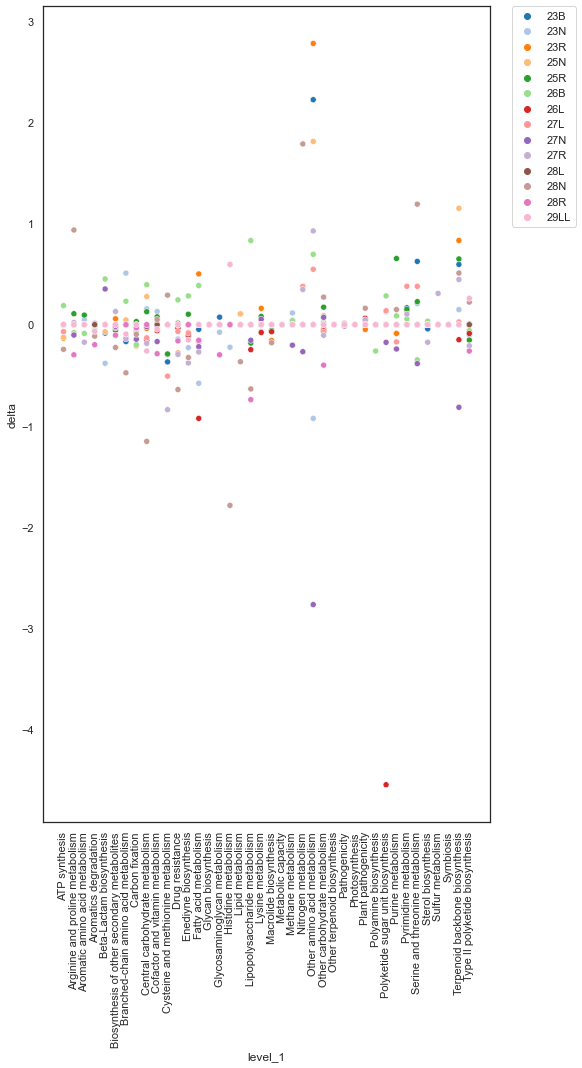

In [501]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ing, x='level_1', y='delta', hue='mouse', palette='tab20')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

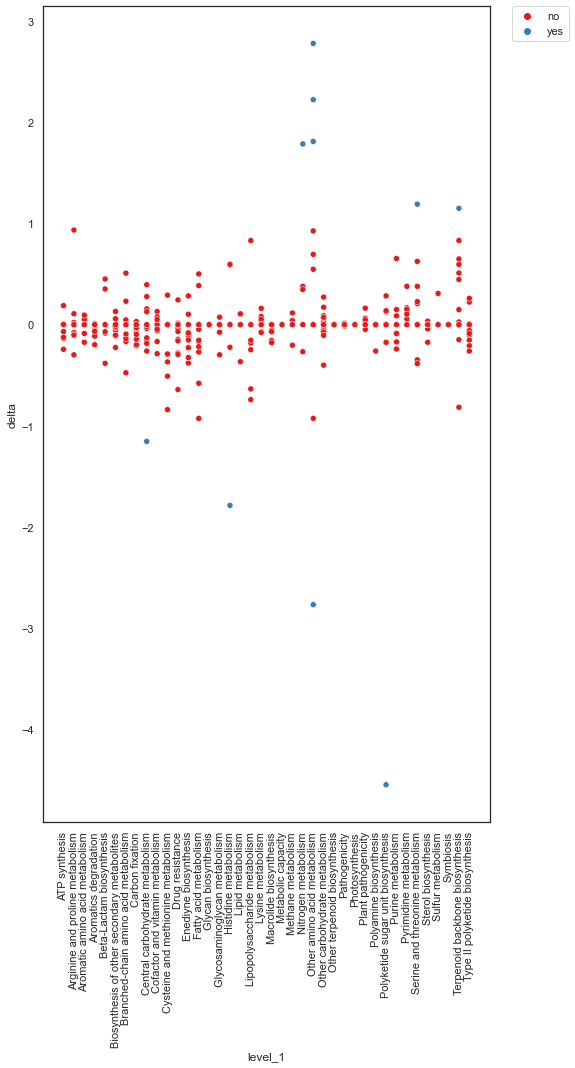

In [558]:
grap4ing['outlier'] = np.where((grap4ing['delta']>1)|(grap4ing['delta']<-1), 'yes', 'no')
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ing, x='level_1', y='delta', hue='outlier', palette='Set1')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./AZ20_group_delta_outliers.png', bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Other amino acid metabolism'),
  Text(1, 0, 'Terpenoid backbone biosynthesis'),
  Text(2, 0, 'Polyketide sugar unit biosynthesis'),
  Text(3, 0, 'Central carbohydrate metabolism'),
  Text(4, 0, 'Histidine metabolism'),
  Text(5, 0, 'Nitrogen metabolism'),
  Text(6, 0, 'Serine and threonine metabolism')])

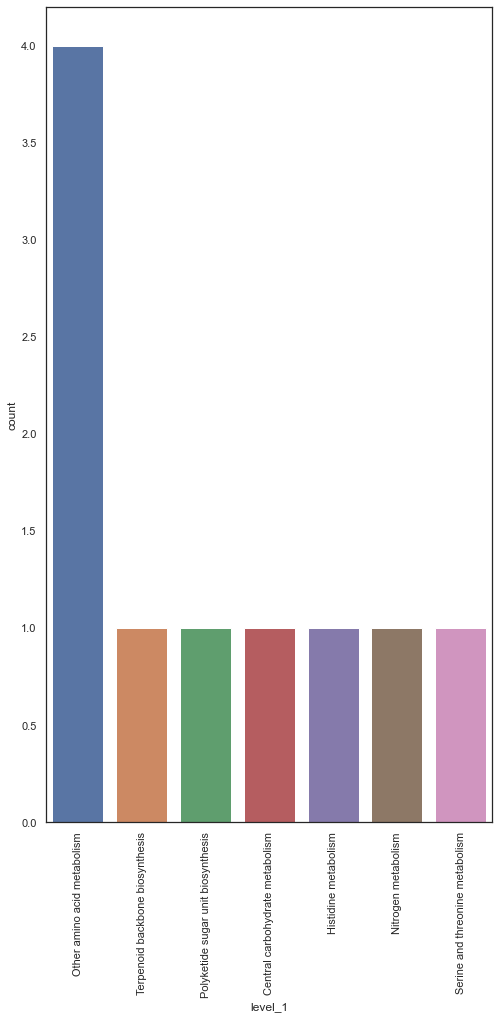

In [503]:
sns.countplot(data=grap4ing[grap4ing['outlier'] == 'yes'], x='level_1')
plt.xticks(rotation=90)

In [504]:
out_pathways = grap4ing[grap4ing['outlier'] == 'yes'].level_1.unique()

In [505]:
pathwayz = pathways.reset_index()
pathwayz.head()

pathway group                                     name  23B_Day7_11  \
0  ATP synthesis    Cytochrome aa3-600 menaquinol oxidase        25.00   
1  ATP synthesis                   Cytochrome b6f complex         0.00   
2  ATP synthesis                   Cytochrome bc1 complex         0.00   
3  ATP synthesis  Cytochrome bc1 complex respiratory unit         0.00   
4  ATP synthesis          Cytochrome bd ubiquinol oxidase        66.67   

   23B_Day7_12  23B_Day7_13  23B_Day7_14  23B_Day7_16  23B_Day7_17  \
0        25.00        25.00        25.00        25.00        25.00   
1         0.00         0.00         0.00         0.00         0.00   
2         0.00         0.00         0.00         0.00         0.00   
3         0.00         0.00         0.00         0.00         0.00   
4        66.67        66.67        66.67        66.67        66.67   

   23B_Day7_18  23B_Day7_20  ...  30N_Day7_23  30N_Day7_24  30N_Day7_2  \
0        25.00        25.00  ...        25.00        25.00       25.00   
1         0.00         0.00  ...         0.00         0.00        0.00   
2         0.00         0.00  ...         0.00         0.00        0.00   
3         0.00         0.00  ...         0.00         0.00        0.00   
4        66.67        66.67  ...        66.67        66.67       66.67   

   30N_Day7_3  30N_Day7_4  30N_Day7_5  30N_Day7_6  30N_Day7_7  30N_Day7_8  \
0       25.00        0.00       25.00       25.00       25.00       25.00   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2        0.00        0.00        0.00        0.00        0.00        0.00   
3        0.00        0.00        0.00        0.00        0.00        0.00   
4       66.67       66.67       66.67       66.67       66.67       66.67   

   30N_Day7_9  
0       25.00  
1        0.00  
2        0.00  
3        0.00  
4       66.67  

[5 rows x 1224 columns]

In [506]:
pathwayz2 = pathwayz[pathwayz['pathway group'].isin(out_pathways)]
pathwayz2.head()

pathway group  \
111  Central carbohydrate metabolism   
112  Central carbohydrate metabolism   
113  Central carbohydrate metabolism   
114  Central carbohydrate metabolism   
115  Central carbohydrate metabolism   

                                                  name  23B_Day7_11  \
111             Citrate cycle (TCA cycle, Krebs cycle)        65.62   
112  Citrate cycle, first carbon oxidation, oxaloac...        33.33   
113  Citrate cycle, second carbon oxidation, 2-oxog...        85.00   
114  Entner-Doudoroff pathway, glucose-6P => glycer...        25.00   
115       Gluconeogenesis, oxaloacetate => fructose-6P       100.00   

     23B_Day7_12  23B_Day7_13  23B_Day7_14  23B_Day7_16  23B_Day7_17  \
111        65.62        65.62        65.62        65.62        65.62   
112        33.33        33.33        33.33        33.33        33.33   
113        85.00        85.00        85.00        85.00        85.00   
114        25.00        25.00        25.00        25.00        25.00   
115       100.00       100.00       100.00       100.00       100.00   

     23B_Day7_18  23B_Day7_20  ...  30N_Day7_23  30N_Day7_24  30N_Day7_2  \
111        65.62        65.62  ...        65.62        65.62       65.62   
112        33.33        33.33  ...        33.33        33.33       33.33   
113        85.00        85.00  ...        85.00        85.00       85.00   
114        25.00        25.00  ...        25.00        25.00       25.00   
115       100.00       100.00  ...       100.00       100.00      100.00   

     30N_Day7_3  30N_Day7_4  30N_Day7_5  30N_Day7_6  30N_Day7_7  30N_Day7_8  \
111       78.12       65.62       65.62       65.62       65.62       65.62   
112       66.67       33.33       33.33       33.33       33.33       33.33   
113       85.00       85.00       85.00       85.00       85.00       85.00   
114       25.00       25.00       25.00       25.00       25.00       25.00   
115      100.00      100.00      100.00      100.00      100.00      100.00   

     30N_Day7_9  
111       59.38  
112       33.33  
113       75.00  
114       25.00  
115      100.00  

[5 rows x 1224 columns]

In [507]:
pathwayz2.shape

(49, 1224)

In [508]:
pathwayz3 = pathwayz2.set_index(['name'])
pathwayz3.drop(columns=['pathway group'], inplace=True)
pathwayz3.head()

23B_Day7_11  23B_Day7_12  \
name                                                                           
Citrate cycle (TCA cycle, Krebs cycle)                    65.62        65.62   
Citrate cycle, first carbon oxidation, oxaloace...        33.33        33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00       100.00   

                                                    23B_Day7_13  23B_Day7_14  \
name                                                                           
Citrate cycle (TCA cycle, Krebs cycle)                    65.62        65.62   
Citrate cycle, first carbon oxidation, oxaloace...        33.33        33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00       100.00   

                                                    23B_Day7_16  23B_Day7_17  \
name                                                                           
Citrate cycle (TCA cycle, Krebs cycle)                    65.62        65.62   
Citrate cycle, first carbon oxidation, oxaloace...        33.33        33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00       100.00   

                                                    23B_Day7_18  23B_Day7_20  \
name                                                                           
Citrate cycle (TCA cycle, Krebs cycle)                    65.62        65.62   
Citrate cycle, first carbon oxidation, oxaloace...        33.33        33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00       100.00   

                                                    23B_Day7_21  23B_Day7_22  \
name                                                                           
Citrate cycle (TCA cycle, Krebs cycle)                    65.62        78.12   
Citrate cycle, first carbon oxidation, oxaloace...        33.33        66.67   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00       100.00   

                                                    ...  30N_Day7_23  \
name                                                ...                
Citrate cycle (TCA cycle, Krebs cycle)              ...        65.62   
Citrate cycle, first carbon oxidation, oxaloace...  ...        33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...  ...        85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...  ...        25.00   
Gluconeogenesis, oxaloacetate => fructose-6P        ...       100.00   

                                                    30N_Day7_24  30N_Day7_2  \
name                                                                          
Citrate cycle (TCA cycle, Krebs cycle)                    65.62       65.62   
Citrate cycle, first carbon oxidation, oxaloace...        33.33       33.33   
Citrate cycle, second carbon oxidation, 2-oxogl...        85.00       85.00   
Entner-Doudoroff pathway, glucose-6P => glycera...        25.00       25.00   
Gluconeogenesis, oxaloacetate => fructose-6P             100.00      100.00   

                                                    30N_Day7_3  30N_Day7_4  \
name                                                                         
Citrate cycle (TCA cycle, Krebs 

In [509]:
pathwayz_named = pd.merge(pathwayz3.T, metadata_non[['mouse', 'collection_timepoint']], left_index=True, right_index=True)
pathwayz_named.head()

Citrate cycle (TCA cycle, Krebs cycle)  \
23B_Day7_11                                   65.62   
23B_Day7_12                                   65.62   
23B_Day7_13                                   65.62   
23B_Day7_14                                   65.62   
23B_Day7_16                                   65.62   

             Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
23B_Day7_11                                              33.33                       
23B_Day7_12                                              33.33                       
23B_Day7_13                                              33.33                       
23B_Day7_14                                              33.33                       
23B_Day7_16                                              33.33                       

             Citrate cycle, second carbon oxidation, 2-oxoglutarate => oxaloacetate  \
23B_Day7_11                                               85.0                        
23B_Day7_12                                               85.0                        
23B_Day7_13                                               85.0                        
23B_Day7_14                                               85.0                        
23B_Day7_16                                               85.0                        

             Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
23B_Day7_11                                               25.0                      
23B_Day7_12                                               25.0                      
23B_Day7_13                                               25.0                      
23B_Day7_14                                               25.0                      
23B_Day7_16                                               25.0                      

             Gluconeogenesis, oxaloacetate => fructose-6P  \
23B_Day7_11                                         100.0   
23B_Day7_12                                         100.0   
23B_Day7_13                                         100.0   
23B_Day7_14                                         100.0   
23B_Day7_16                                         100.0   

             Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate  \
23B_Day7_11                                               90.0           
23B_Day7_12                                               90.0           
23B_Day7_13                                               90.0           
23B_Day7_14                                               90.0           
23B_Day7_16                                               90.0           

             Glycolysis, core module involving three-carbon compounds  \
23B_Day7_11                                              100.0          
23B_Day7_12                                              100.0          
23B_Day7_13                                              100.0          
23B_Day7_14                                              100.0          
23B_Day7_16                                              100.0          

             Non-phosphorylative Entner-Doudoroff pathway, gluconate--galactonate => glycerate  \
23B_Day7_11                                              33.33                                   
23B_Day7_12                                              33.33                                   
23B_Day7_13                                              33.33                                   
23B_Day7_14                                              33.33                                   
23B_Day7_16                                              33.33                                   

             PRPP biosynthesis, ribose 5P => PRPP  \
23B_Day7_11                                 100.0   
23B_Day7_12                                 100.0   
23B_Day7_13                                 100.0   
23B_Day7_14                                 100.0   
23B_Day7_16               

In [510]:
pathwayz_named_grouped = pathwayz_named.groupby(by=['mouse', 'collection_timepoint']).mean()
pathwayz_named_grouped.head()

Citrate cycle (TCA cycle, Krebs cycle)  \
mouse collection_timepoint                                           
23B   Day7                                               66.245000   
      Month3                                             66.140833   
      Month6                                             65.620000   
23LL  Day3                                               66.453333   
      Day7                                               65.620000   

                            Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
mouse collection_timepoint                                                                          
23B   Day7                                                          34.997000                       
      Month3                                                        34.719167                       
      Month6                                                        33.330000                       
23LL  Day3                                                          35.552667                       
      Day7                                                          33.330000                       

                            Citrate cycle, second carbon oxidation, 2-oxoglutarate => oxaloacetate  \
mouse collection_timepoint                                                                           
23B   Day7                                                               85.0                        
      Month3                                                             85.0                        
      Month6                                                             85.0                        
23LL  Day3                                                               85.0                        
      Day7                                                               85.0                        

                            Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
mouse collection_timepoint                                                                         
23B   Day7                                                          25.000000                      
      Month3                                                        27.083333                      
      Month6                                                        25.000000                      
23LL  Day3                                                          25.000000                      
      Day7                                                          25.000000                      

                            Gluconeogenesis, oxaloacetate => fructose-6P  \
mouse collection_timepoint                                                 
23B   Day7                                                         100.0   
      Month3                                                       100.0   
      Month6                                                       100.0   
23LL  Day3                                                         100.0   
      Day7                                                         100.0   

                            Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate  \
mouse collection_timepoint                                                              
23B   Day7                                                          90.000000           
      Month3                                                        89.583333           
      Month6                                                        90.000000           
23LL  Day3                                                          90.000000           
      Day7                                                          90.000000           

                            Glycolysis, core module involving three-carbon compounds  \
mouse collection_timepoint                                                             
23B   Day7                                                              100.0   

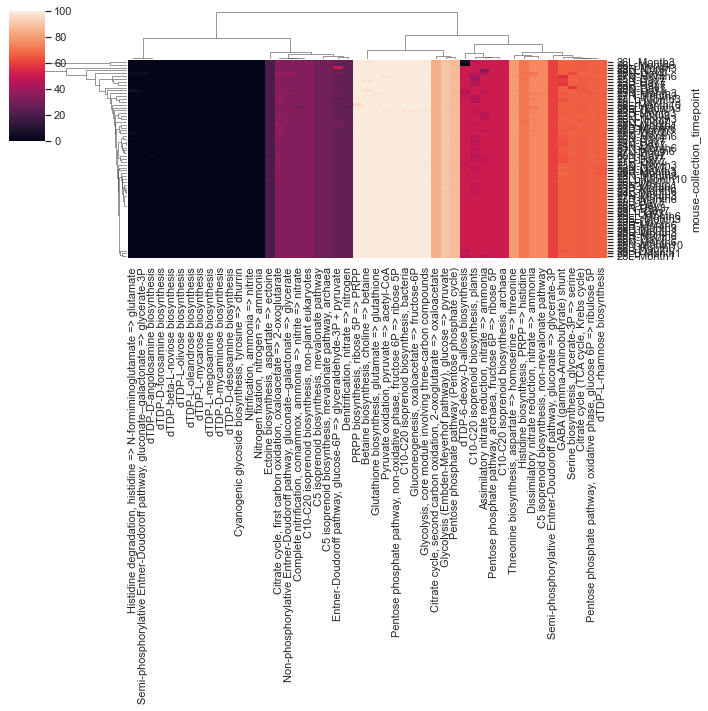

In [511]:
sns.set(rc = {'figure.figsize':(100,100)})
sns.clustermap(data=pathwayz_named_grouped, yticklabels=1, xticklabels=1)

# Delta by Individual Pathway

In [512]:
AZ20_changez = pathwayz_named_grouped
AZ20_changez2 = AZ20_changez.drop(index=['Month3', 'Day3', 'Month10', 'Month1'], level=1)
AZ20_changez2.reset_index()

mouse collection_timepoint  Citrate cycle (TCA cycle, Krebs cycle)  \
0    23B                 Day7                               66.245000   
1    23B               Month6                               65.620000   
2   23LL                 Day7                               65.620000   
3    23N                 Day7                               65.620000   
4    23N               Month6                               65.620000   
5    23R                 Day7                               65.446667   
6    23R               Month6                               65.620000   
7    24B                 Day7                               65.620000   
8    24L                 Day7                               65.620000   
9    24N                 Day7                               65.620000   
10   25L                 Day7                               66.810476   
11   25N                 Day7                               65.446667   
12   25N               Month6                               66.188182   
13   25R                 Day7                               65.620000   
14   25R               Month6                               65.620000   
15   26B                 Day7                               65.620000   
16   26B               Month6                               66.661667   
17   26L                 Day7                               65.620000   
18   26L               Month6                               65.620000   
19   26N                 Day7                               66.215238   
20   27L                 Day7                               66.188182   
21   27L               Month6                               65.620000   
22   27N                 Day7                               65.620000   
23   27N               Month6                               66.341538   
24   27R                 Day7                               66.140833   
25   27R               Month6                               65.620000   
26   28B                 Day7                               65.620000   
27   28L                 Day7                               65.620000   
28   28L               Month6                               65.620000   
29  28LL                 Day7                               65.620000   
30   28N                 Day7                               67.405714   
31   28N               Month6                               65.620000   
32   28R                 Day7                               65.620000   
33   28R               Month6                               65.620000   
34   29B                 Day7                               65.620000   
35   29L                 Day7                               65.620000   
36  29LL                 Day7                               65.620000   
37  29LL               Month6                               65.620000   
38   29N                 Day7                               65.620000   
39   29R                 Day7                               66.661667   
40   30N                 Day7                               65.892174   

    Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
0                                           34.997000                       
1                                           33.330000                       
2                                           33.330000                       
3                                           33.330000                       
4                                           33.330000                       
5                                           33.330000                       
6                                           33.330000                       
7                                           33.330000                       
8                                           33.330000                       
9                                           33.330000                       
10                                          36.505238                       
11          

In [513]:
tabled = pd.pivot_table(AZ20_changez2, values=AZ20_changez2.columns, index=['mouse'], columns=['collection_timepoint'], aggfunc=np.mean)

In [514]:
tabled

Assimilatory nitrate reduction, nitrate => ammonia  \
collection_timepoint                                               Day7   
mouse                                                                     
23B                                                           50.000000   
23LL                                                          50.000000   
23N                                                           50.000000   
23R                                                           50.000000   
24B                                                           50.000000   
24L                                                           50.000000   
24N                                                           50.000000   
25L                                                           50.000000   
25N                                                           50.000000   
25R                                                           50.000000   
26B                                                           50.000000   
26L                                                           50.000000   
26N                                                           50.000000   
27L                                                           47.727273   
27N                                                           50.000000   
27R                                                           47.916667   
28B                                                           50.000000   
28L                                                           50.000000   
28LL                                                          33.333333   
28N                                                           42.857143   
28R                                                           50.000000   
29B                                                           50.000000   
29L                                                           50.000000   
29LL                                                          50.000000   
29N                                                           50.000000   
29R                                                           50.000000   
30N                                                           47.826087   

                            Betaine biosynthesis, choline => betaine         \
collection_timepoint Month6                                     Day7 Month6   
mouse                                                                         
23B                    50.0                                     97.5  100.0   
23LL                    NaN                                    100.0    NaN   
23N                    50.0                                    100.0  100.0   
23R                    50.0                                    100.0  100.0   
24B                     NaN                                    100.0    NaN   
24L                     NaN                                    100.0    NaN   
24N                     NaN                                    100.0    NaN   
25L                     NaN                                    100.0    NaN   
25N                    50.0                                    100.0  100.0   
25R                    50.0                                    100.0  100.0   
26B                    50.0                                    100.0  100.0   
26L                    50.0                                    100.0  100.0   
26N                     NaN                                    100.0    NaN   
27L                    50.0                                    100.0  100.0   
27N                    50.0                                    100.0  100.0   
27R                    50.0                                    100.0  100.0   
28B                     NaN                                    100.0    NaN   
28L                    50.0                                    100.0  100.0   
28LL                    NaN                                    100.0    NaN   
28N                    50.0     

In [515]:
new_cols1 = [(x, 'Day7') for x in tabled.columns.levels[0]]
new_cols2 = [(x, 'Month6') for x in tabled.columns.levels[0]]

In [516]:
deltad = [(tabled[x, 'Month6'] - tabled[x, 'Day7']) for x in tabled.columns.levels[0]]

In [517]:
for x in tabled.columns.levels[0]:
    tabled[x, 'delta'] = tabled[x, 'Month6'] - tabled[x, 'Day7']

In [518]:
tabled2 = tabled.groupby(axis=1, level=[0, 1]).mean()
tabled2

Assimilatory nitrate reduction, nitrate => ammonia  \
collection_timepoint                                               Day7   
mouse                                                                     
23B                                                           50.000000   
23LL                                                          50.000000   
23N                                                           50.000000   
23R                                                           50.000000   
24B                                                           50.000000   
24L                                                           50.000000   
24N                                                           50.000000   
25L                                                           50.000000   
25N                                                           50.000000   
25R                                                           50.000000   
26B                                                           50.000000   
26L                                                           50.000000   
26N                                                           50.000000   
27L                                                           47.727273   
27N                                                           50.000000   
27R                                                           47.916667   
28B                                                           50.000000   
28L                                                           50.000000   
28LL                                                          33.333333   
28N                                                           42.857143   
28R                                                           50.000000   
29B                                                           50.000000   
29L                                                           50.000000   
29LL                                                          50.000000   
29N                                                           50.000000   
29R                                                           50.000000   
30N                                                           47.826087   

                                       \
collection_timepoint Month6     delta   
mouse                                   
23B                    50.0  0.000000   
23LL                    NaN       NaN   
23N                    50.0  0.000000   
23R                    50.0  0.000000   
24B                     NaN       NaN   
24L                     NaN       NaN   
24N                     NaN       NaN   
25L                     NaN       NaN   
25N                    50.0  0.000000   
25R                    50.0  0.000000   
26B                    50.0  0.000000   
26L                    50.0  0.000000   
26N                     NaN       NaN   
27L                    50.0  2.272727   
27N                    50.0  0.000000   
27R                    50.0  2.083333   
28B                     NaN       NaN   
28L                    50.0  0.000000   
28LL                    NaN       NaN   
28N                    50.0  7.142857   
28R                    50.0  0.000000   
29B                     NaN       NaN   
29L                     NaN       NaN   
29LL                   50.0  0.000000   
29N                     NaN       NaN   
29R                     NaN       NaN   
30N                     NaN       NaN   

                     Betaine biosynthesis, choline => betaine               \
collection_timepoint                                     Day7 Month6 delta   
mouse                                                                        
23B                                                      97.5  100.0   2.5   
23LL                                                    100.0    NaN   NaN   
23N                                                     100.0  100.0   0.0   
23R                                                     100.0  100.0   

In [519]:
tabled3 = tabled2.dropna(axis=0)
tabled3

Assimilatory nitrate reduction, nitrate => ammonia  \
collection_timepoint                                               Day7   
mouse                                                                     
23B                                                           50.000000   
23N                                                           50.000000   
23R                                                           50.000000   
25N                                                           50.000000   
25R                                                           50.000000   
26B                                                           50.000000   
26L                                                           50.000000   
27L                                                           47.727273   
27N                                                           50.000000   
27R                                                           47.916667   
28L                                                           50.000000   
28N                                                           42.857143   
28R                                                           50.000000   
29LL                                                          50.000000   

                                       \
collection_timepoint Month6     delta   
mouse                                   
23B                    50.0  0.000000   
23N                    50.0  0.000000   
23R                    50.0  0.000000   
25N                    50.0  0.000000   
25R                    50.0  0.000000   
26B                    50.0  0.000000   
26L                    50.0  0.000000   
27L                    50.0  2.272727   
27N                    50.0  0.000000   
27R                    50.0  2.083333   
28L                    50.0  0.000000   
28N                    50.0  7.142857   
28R                    50.0  0.000000   
29LL                   50.0  0.000000   

                     Betaine biosynthesis, choline => betaine               \
collection_timepoint                                     Day7 Month6 delta   
mouse                                                                        
23B                                                      97.5  100.0   2.5   
23N                                                     100.0  100.0   0.0   
23R                                                     100.0  100.0   0.0   
25N                                                     100.0  100.0   0.0   
25R                                                     100.0  100.0   0.0   
26B                                                     100.0  100.0   0.0   
26L                                                     100.0  100.0   0.0   
27L                                                     100.0  100.0   0.0   
27N                                                     100.0  100.0   0.0   
27R                                                     100.0  100.0   0.0   
28L                                                     100.0  100.0   0.0   
28N                                                     100.0  100.0   0.0   
28R                                                     100.0  100.0   0.0   
29LL                                                    100.0  100.0   0.0   

                     C10-C20 isoprenoid biosynthesis, archaea               \
collection_timepoint                                     Day7 Month6 delta   
mouse                                                                        
23B                                                      50.0   50.0   0.0   
23N                                                      50.0   50.0   0.0   
23R                                                      50.0   50.0   0.0   
25N                                                      50.0   50.0   0.0   
25R                                                      50.0   50.0   0.0   
26B                                                      50.0   50.0   0.0   
26L               

In [520]:
grap4ingz = tabled3.stack(level=0).reset_index(level=0).reset_index()
grap4ingz.head()

collection_timepoint                                              index mouse  \
0                     Assimilatory nitrate reduction, nitrate => amm...   23B   
1                              Betaine biosynthesis, choline => betaine   23B   
2                              C10-C20 isoprenoid biosynthesis, archaea   23B   
3                             C10-C20 isoprenoid biosynthesis, bacteria   23B   
4                     C10-C20 isoprenoid biosynthesis, non-plant euk...   23B   

collection_timepoint    Day7  Month6         delta  
0                      50.00   50.00  0.000000e+00  
1                      97.50  100.00  2.500000e+00  
2                      50.00   50.00  0.000000e+00  
3                     100.00  100.00  0.000000e+00  
4                      33.33   33.33  7.105427e-15

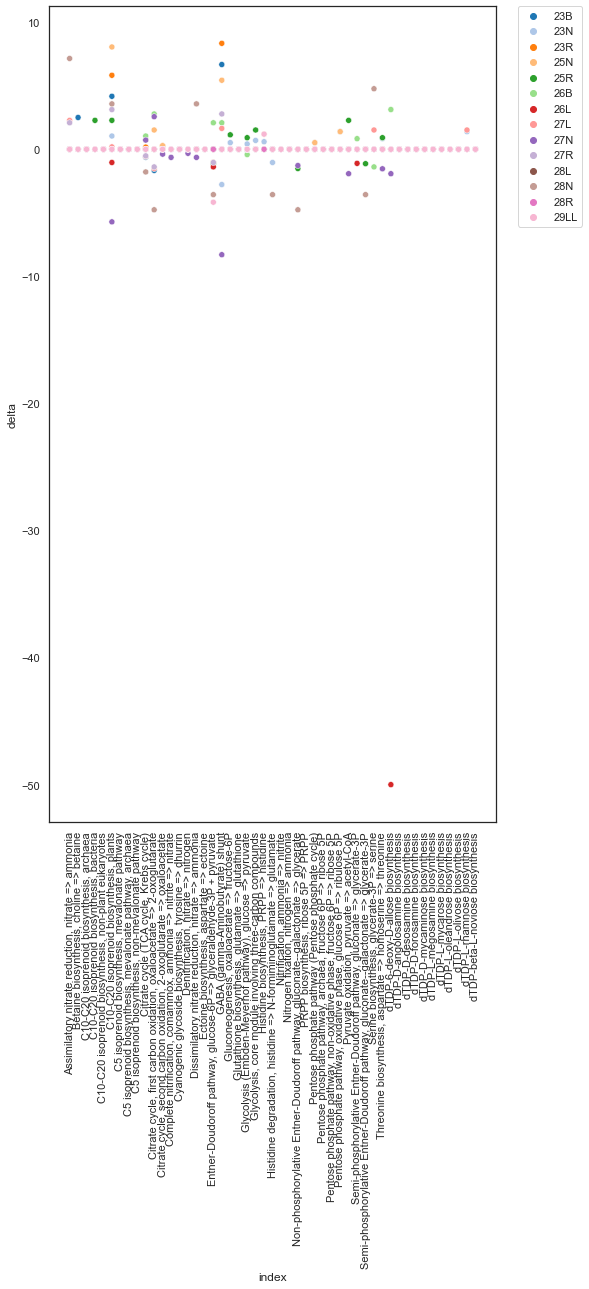

In [521]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ingz, x='index', y='delta', hue='mouse', palette='tab20')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [538]:
grap4ingz['outlier'] = np.where((grap4ingz['delta']>1)|(grap4ingz['delta']<-1), 'yes', 'no')

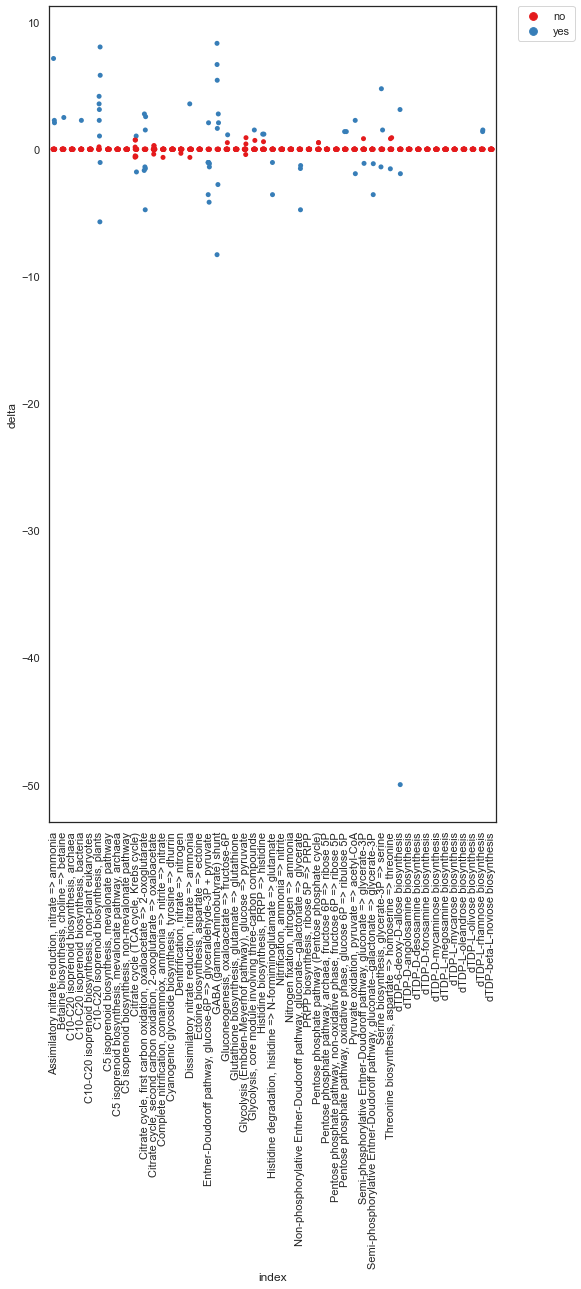

In [557]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.stripplot(data=grap4ingz, x='index', y='delta', hue='outlier', palette='Set1')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('./AZ20_outliers.png', bbox_inches='tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Betaine biosynthesis, choline => betaine'),
  Text(1, 0, 'C10-C20 isoprenoid biosynthesis, plants'),
  Text(2, 0, 'Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate'),
  Text(3, 0, 'GABA (gamma-Aminobutyrate) shunt'),
  Text(4, 0, 'Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate'),
  Text(5, 0, 'Histidine degradation, histidine => N-formiminoglutamate => glutamate'),
  Text(6, 0, 'Pentose phosphate pathway, oxidative phase, glucose 6P => ribulose 5P'),
  Text(7, 0, 'dTDP-L-rhamnose biosynthesis'),
  Text(8, 0, 'Histidine biosynthesis, PRPP => histidine'),
  Text(9, 0, 'C10-C20 isoprenoid biosynthesis, bacteria'),
  Text(10, 0, 'Gluconeogenesis, oxaloacetate => fructose-6P'),
  Text(11, 0, 'Glycolysis, core module involving three-carbon compounds'),
  Text(12, 0, 'Non-phosphorylative Entner-Doudoroff pathway, gluconate--galacton

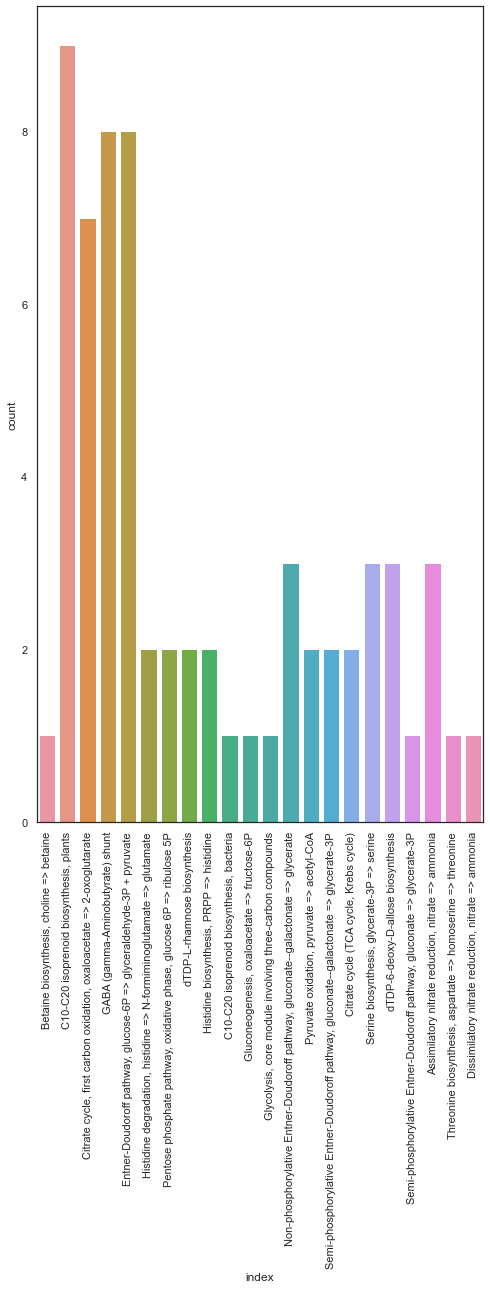

In [540]:
g = sns.countplot(data=grap4ingz[grap4ingz['outlier'] == 'yes'], x='index')
plt.xticks(rotation=90)

In [525]:
indv_pathwz = grap4ingz[grap4ingz['outlier'] == 'yes']['index'].unique()
print(len(indv_pathwz))

11


In [526]:
indv_pathwz

array(['C10-C20 isoprenoid biosynthesis, plants',
       'GABA (gamma-Aminobutyrate) shunt',
       'dTDP-6-deoxy-D-allose biosynthesis',
       'Assimilatory nitrate reduction, nitrate => ammonia',
       'Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate',
       'Dissimilatory nitrate reduction, nitrate => ammonia',
       'Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate',
       'Histidine degradation, histidine => N-formiminoglutamate => glutamate',
       'Non-phosphorylative Entner-Doudoroff pathway, gluconate--galactonate => glycerate',
       'Semi-phosphorylative Entner-Doudoroff pathway, gluconate--galactonate => glycerate-3P',
       'Serine biosynthesis, glycerate-3P => serine'], dtype=object)

In [541]:
Top4 = ['C10-C20 isoprenoid biosynthesis, plants', 
        'Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate', 
        'GABA (gamma-Aminobutyrate) shunt', 
       'Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate']

In [527]:
pathwayz3.shape

(49, 1222)

In [542]:
outlier_indv_path = pathwayz3.reset_index()
outlier_indv_path2 = outlier_indv_path[outlier_indv_path.name.isin(Top4)]
outlier_indv_path2

name  23B_Day7_11  \
1   Citrate cycle, first carbon oxidation, oxaloac...        33.33   
3   Entner-Doudoroff pathway, glucose-6P => glycer...        25.00   
25                   GABA (gamma-Aminobutyrate) shunt        66.67   
45            C10-C20 isoprenoid biosynthesis, plants        25.00   

    23B_Day7_12  23B_Day7_13  23B_Day7_14  23B_Day7_16  23B_Day7_17  \
1         33.33        33.33        33.33        33.33        33.33   
3         25.00        25.00        25.00        25.00        25.00   
25        66.67        66.67        66.67        66.67        33.33   
45        50.00        50.00        50.00        50.00        25.00   

    23B_Day7_18  23B_Day7_20  23B_Day7_21  ...  30N_Day7_23  30N_Day7_24  \
1         33.33        33.33        33.33  ...        33.33        33.33   
3         25.00        25.00        25.00  ...        25.00        25.00   
25        66.67        33.33        33.33  ...        66.67        66.67   
45        50.00        25.00        25.00  ...        50.00        50.00   

    30N_Day7_2  30N_Day7_3  30N_Day7_4  30N_Day7_5  30N_Day7_6  30N_Day7_7  \
1        33.33       66.67       33.33       33.33       33.33       33.33   
3        25.00       25.00       25.00       25.00       25.00       25.00   
25       66.67       66.67       66.67       66.67       66.67       66.67   
45       50.00       50.00       50.00       50.00       50.00       50.00   

    30N_Day7_8  30N_Day7_9  
1        33.33       33.33  
3        25.00       25.00  
25       66.67       66.67  
45       50.00       50.00  

[4 rows x 1223 columns]

In [543]:
outlier_indv_path2.shape

(4, 1223)

In [544]:
pathway_ind = pd.merge(outlier_indv_path2.set_index('name').T, metadata_non[['mouse', 'collection_timepoint']], left_index=True, right_index=True)
pathway_ind

Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
23B_Day7_11                                              33.33                       
23B_Day7_12                                              33.33                       
23B_Day7_13                                              33.33                       
23B_Day7_14                                              33.33                       
23B_Day7_16                                              33.33                       
...                                                        ...                       
30N_Day7_5                                               33.33                       
30N_Day7_6                                               33.33                       
30N_Day7_7                                               33.33                       
30N_Day7_8                                               33.33                       
30N_Day7_9                                               33.33                       

             Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
23B_Day7_11                                               25.0                      
23B_Day7_12                                               25.0                      
23B_Day7_13                                               25.0                      
23B_Day7_14                                               25.0                      
23B_Day7_16                                               25.0                      
...                                                        ...                      
30N_Day7_5                                                25.0                      
30N_Day7_6                                                25.0                      
30N_Day7_7                                                25.0                      
30N_Day7_8                                                25.0                      
30N_Day7_9                                                25.0                      

             GABA (gamma-Aminobutyrate) shunt  \
23B_Day7_11                             66.67   
23B_Day7_12                             66.67   
23B_Day7_13                             66.67   
23B_Day7_14                             66.67   
23B_Day7_16                             66.67   
...                                       ...   
30N_Day7_5                              66.67   
30N_Day7_6                              66.67   
30N_Day7_7                              66.67   
30N_Day7_8                              66.67   
30N_Day7_9                              66.67   

             C10-C20 isoprenoid biosynthesis, plants mouse  \
23B_Day7_11                                     25.0   23B   
23B_Day7_12                                     50.0   23B   
23B_Day7_13                                     50.0   23B   
23B_Day7_14                                     50.0   23B   
23B_Day7_16                                     50.0   23B   
...                                              ...   ...   
30N_Day7_5                                      50.0   30N   
30N_Day7_6                                      50.0   30N   
30N_Day7_7                                      50.0   30N   
30N_Day7_8                                      50.0   30N   
30N_Day7_9                                      50.0   30N   

            collection_timepoint  
23B_Day7_11                 Day7  
23B_Day7_12                 Day7  
23B_Day7_13                 Day7  
23B_Day7_14                 Day7  
23B_Day7_16                 Day7  
...                          ...  
30N_Day7_5                  Day7  
30N_Day7_6                  Day7  
30N_Day7_7                  Day7  
30N_Day7_8                  Day7  
30N_Day7_9                  Day7  

[1174 rows x 6 columns]

In [545]:
pathway_ind2 = pathway_ind.groupby(by=['mouse', 'collection_timepoint']).mean()
pathway_ind2

Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
mouse collection_timepoint                                                                          
23B   Day7                                                          34.997000                       
      Month3                                                        34.719167                       
      Month6                                                        33.330000                       
23LL  Day3                                                          35.552667                       
      Day7                                                          33.330000                       
...                                                                       ...                       
29N   Day7                                                          33.330000                       
      Month3                                                        33.330000                       
29R   Day7                                                          36.108333                       
      Month3                                                        33.330000                       
30N   Day7                                                          34.779565                       

                            Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
mouse collection_timepoint                                                                         
23B   Day7                                                          25.000000                      
      Month3                                                        27.083333                      
      Month6                                                        25.000000                      
23LL  Day3                                                          25.000000                      
      Day7                                                          25.000000                      
...                                                                       ...                      
29N   Day7                                                          25.000000                      
      Month3                                                        50.000000                      
29R   Day7                                                          25.000000                      
      Month3                                                        25.000000                      
30N   Day7                                                          25.000000                      

                            GABA (gamma-Aminobutyrate) shunt  \
mouse collection_timepoint                                     
23B   Day7                                         60.002000   
      Month3                                       65.280833   
      Month6                                       66.670000   
23LL  Day3                                         66.670000   
      Day7                                         66.670000   
...                                                      ...   
29N   Day7                                         66.670000   
      Month3                                       66.670000   
29R   Day7                                         66.670000   
      Month3                                       68.257143   
30N   Day7                                         63.770870   

                            C10-C20 isoprenoid biosynthesis, plants  
mouse collection_timepoint                                           
23B   Day7                                                43.750000  
      Month3                                              48.958333  
      Month6                                              47.916667  
23LL  Day3                                                50.000000  
      Day7                                                50.000000  
...                                                             ...  
29N   Day7          

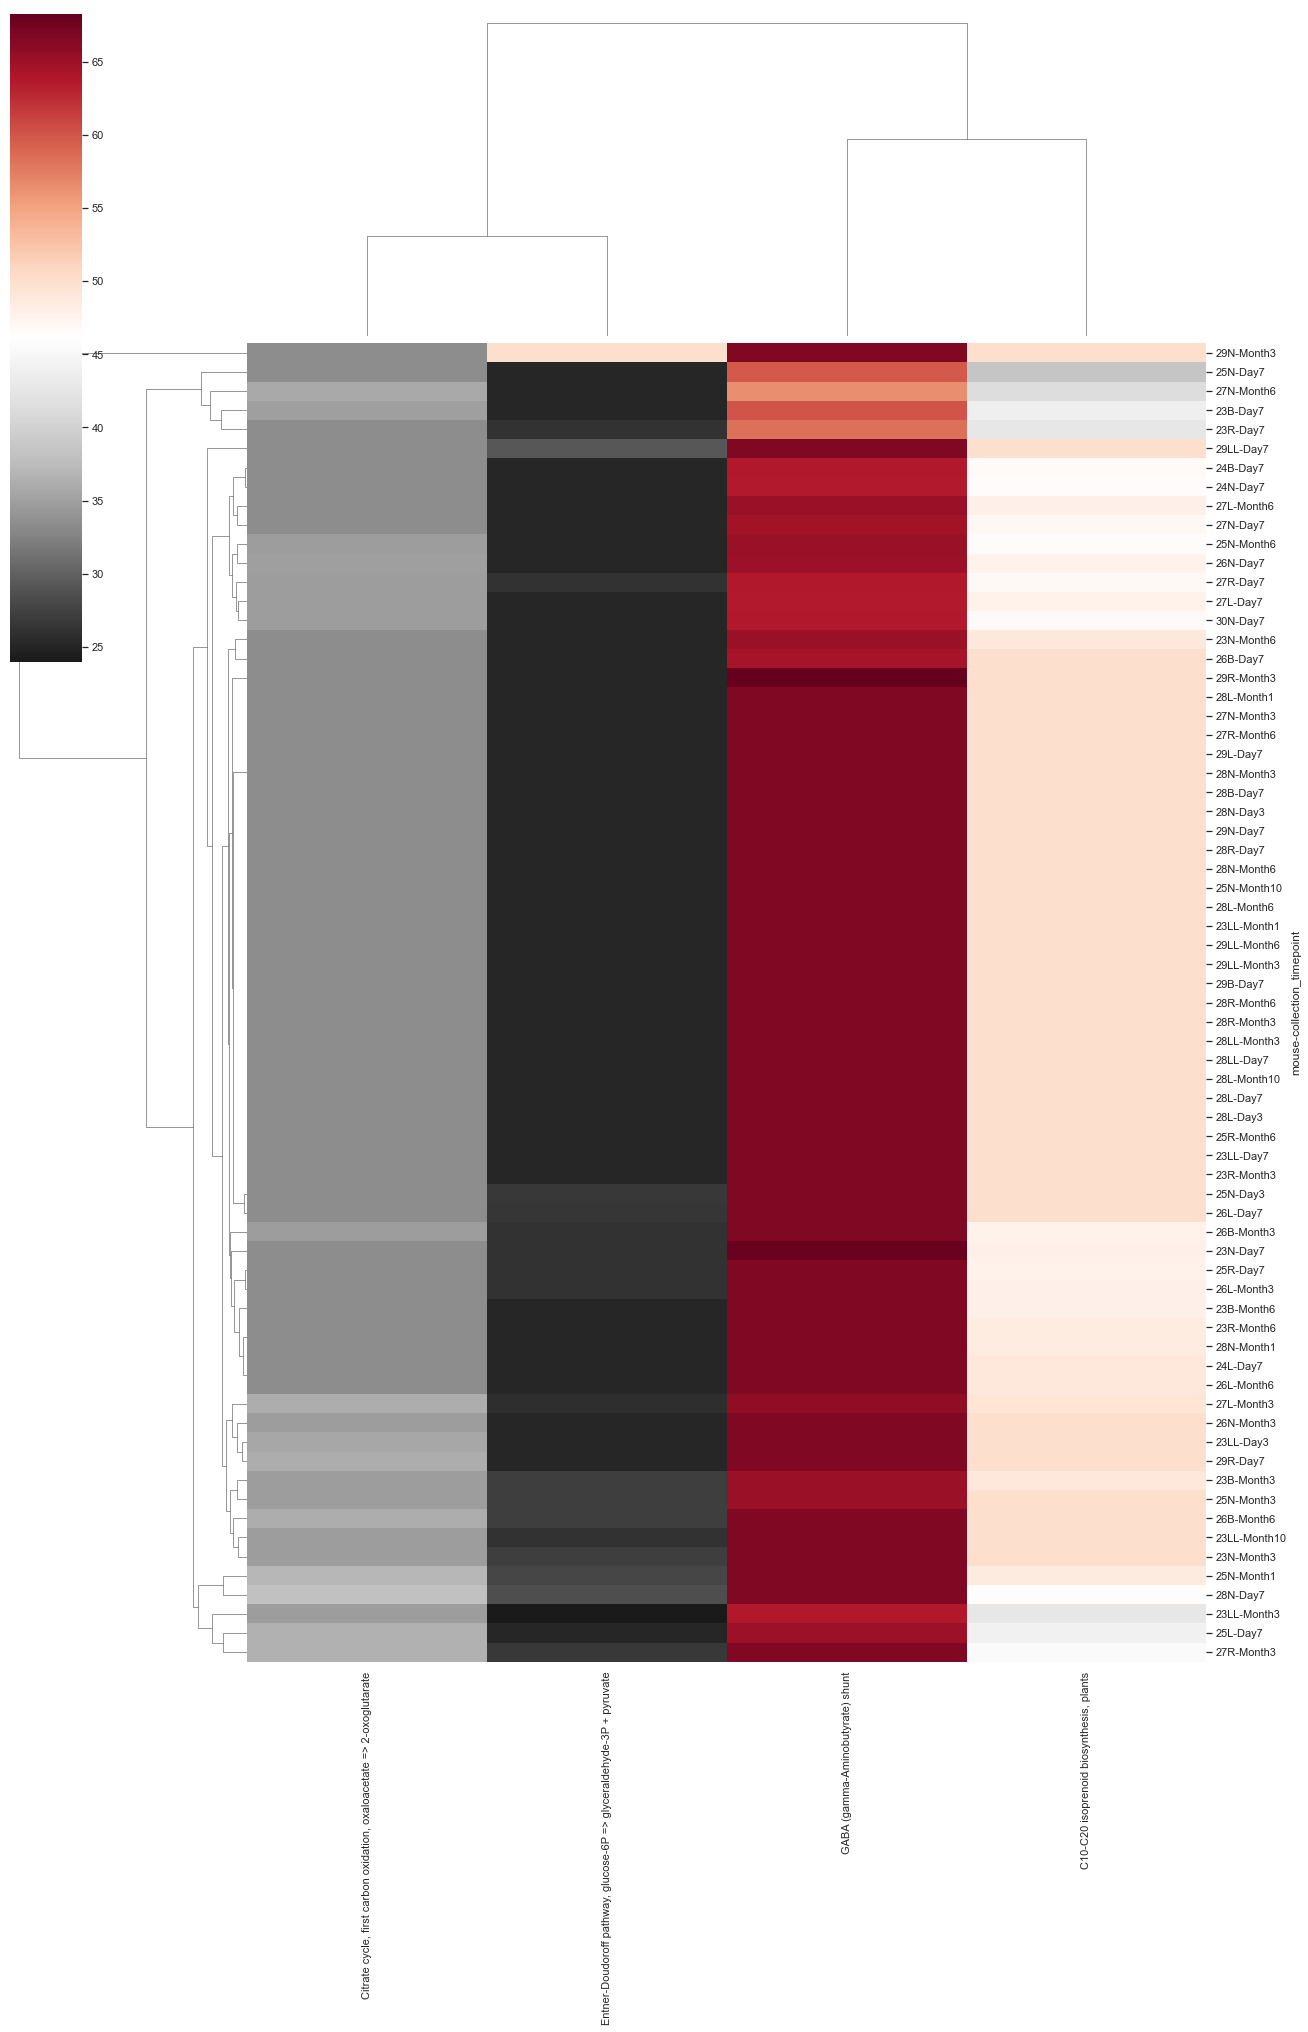

In [549]:
g = sns.clustermap(data=pathway_ind2, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((20,50))
g.savefig('./AZ20_pathway_clustermap_top4.png', dpi=300)

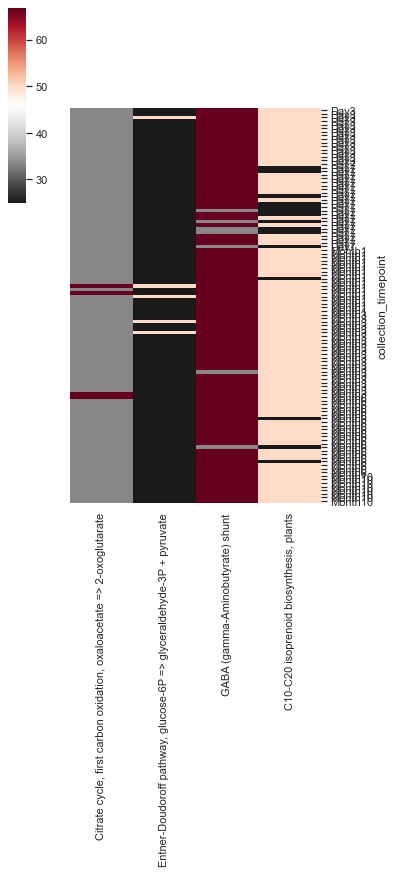

In [575]:
path25N = pathway_ind[pathway_ind['mouse'] == '25N'].copy()
path25N['collection_timepoint'] = pd.Categorical(path25N['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
path25N_grp = path25N.drop(columns=['mouse'])
path25N_grp2 = path25N_grp.set_index('collection_timepoint')
path25N_grp2 = path25N_grp2.sort_index()
#path25N_grp2

g = sns.clustermap(data=path25N_grp2, row_cluster=False, col_cluster=False, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((5,15))
g.savefig('./AZ20_pathway_clustermap_top4_25N.svg', dpi=300)

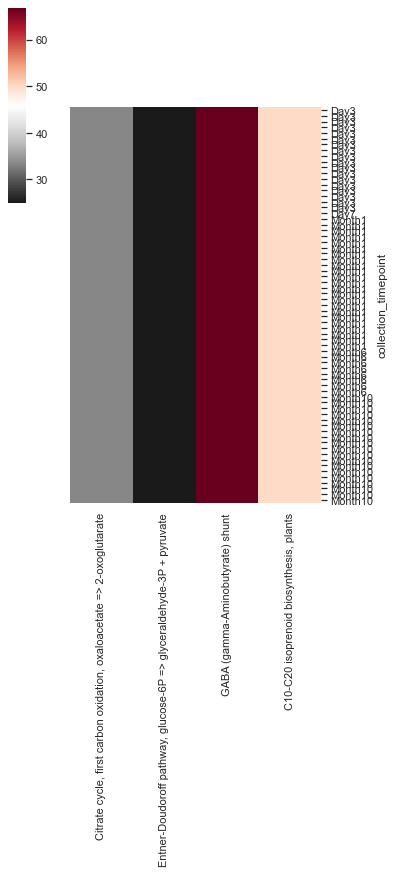

In [576]:
path25N = pathway_ind[pathway_ind['mouse'] == '28L'].copy()
path25N['collection_timepoint'] = pd.Categorical(path25N['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
path25N_grp = path25N.drop(columns=['mouse'])
path25N_grp2 = path25N_grp.set_index('collection_timepoint')
path25N_grp2 = path25N_grp2.sort_index()
#path25N_grp2

g = sns.clustermap(data=path25N_grp2, row_cluster=False, col_cluster=False, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((5,15))
g.savefig('./AZ20_pathway_clustermap_top4_28L.svg', dpi=300)

In [550]:
pathway_ind_tp = pd.merge(outlier_indv_path2.set_index('name').T, metadata_non[['collection_timepoint']], left_index=True, right_index=True)
pathway_ind_tp

Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
23B_Day7_11                                              33.33                       
23B_Day7_12                                              33.33                       
23B_Day7_13                                              33.33                       
23B_Day7_14                                              33.33                       
23B_Day7_16                                              33.33                       
...                                                        ...                       
30N_Day7_5                                               33.33                       
30N_Day7_6                                               33.33                       
30N_Day7_7                                               33.33                       
30N_Day7_8                                               33.33                       
30N_Day7_9                                               33.33                       

             Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
23B_Day7_11                                               25.0                      
23B_Day7_12                                               25.0                      
23B_Day7_13                                               25.0                      
23B_Day7_14                                               25.0                      
23B_Day7_16                                               25.0                      
...                                                        ...                      
30N_Day7_5                                                25.0                      
30N_Day7_6                                                25.0                      
30N_Day7_7                                                25.0                      
30N_Day7_8                                                25.0                      
30N_Day7_9                                                25.0                      

             GABA (gamma-Aminobutyrate) shunt  \
23B_Day7_11                             66.67   
23B_Day7_12                             66.67   
23B_Day7_13                             66.67   
23B_Day7_14                             66.67   
23B_Day7_16                             66.67   
...                                       ...   
30N_Day7_5                              66.67   
30N_Day7_6                              66.67   
30N_Day7_7                              66.67   
30N_Day7_8                              66.67   
30N_Day7_9                              66.67   

             C10-C20 isoprenoid biosynthesis, plants collection_timepoint  
23B_Day7_11                                     25.0                 Day7  
23B_Day7_12                                     50.0                 Day7  
23B_Day7_13                                     50.0                 Day7  
23B_Day7_14                                     50.0                 Day7  
23B_Day7_16                                     50.0                 Day7  
...                                              ...                  ...  
30N_Day7_5                                      50.0                 Day7  
30N_Day7_6                                      50.0                 Day7  
30N_Day7_7                                      50.0                 Day7  
30N_Day7_8                                      50.0                 Day7  
30N_Day7_9                                      50.0                 Day7  

[1174 rows x 5 columns]

In [553]:
pathway_ind_tp2 = pathway_ind_tp.groupby(by=['collection_timepoint']).mean()
pathway_ind_tp3 = pathway_ind_tp2.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
pathway_ind_tp3

Citrate cycle, first carbon oxidation, oxaloacetate => 2-oxoglutarate  \
collection_timepoint                                                                          
Day3                                                          33.859206                       
Day7                                                          34.004292                       
Month1                                                        34.174051                       
Month3                                                        34.646053                       
Month6                                                        34.042393                       
Month10                                                       34.010408                       

                      Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate  \
collection_timepoint                                                                         
Day3                                                          25.396825                      
Day7                                                          25.449438                      
Month1                                                        25.632911                      
Month3                                                        25.904605                      
Month6                                                        25.213675                      
Month10                                                       25.510204                      

                      GABA (gamma-Aminobutyrate) shunt  \
collection_timepoint                                     
Day3                                         66.670000   
Day7                                         64.572157   
Month1                                       66.670000   
Month3                                       66.231283   
Month6                                       65.102735   
Month10                                      66.670000   

                      C10-C20 isoprenoid biosynthesis, plants  
collection_timepoint                                           
Day3                                                50.000000  
Day7                                                47.078652  
Month1                                              49.367089  
Month3                                              48.437500  
Month6                                              47.970085  
Month10                                             50.000000

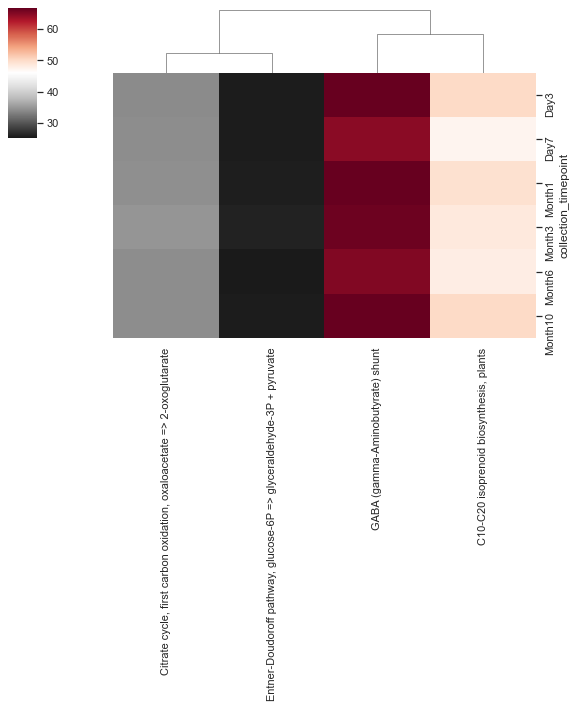

In [555]:
g = sns.clustermap(data=pathway_ind_tp3, row_cluster=False, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((8,10))
#g.savefig('./AZ20_pathway_clustermap_top4_bytp.png', dpi=300)

# AZ51

In [577]:
AZ51_metab = pd.read_csv('MA_AZ51_output/metabolic_summary__module_completeness.tsv', sep='\t', index_col=[2, 1, 0])
AZ51_metab.head()

41B_Day7_10_S73_L002_AZ51_mut.faa.ko  \
pathway group                   name                                               module                                         
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                                 100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                                  60.0   
                                Urea cycle                                         M00029                                  60.0   
                                Creatine pathway                                   M00047                                   0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                   0.0   

                                                                                           41B_Day7_11_S81_L002_AZ51_mut.faa.ko  \
pathway group                   name                                               module                                         
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                                 100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                                  60.0   
                                Urea cycle                                         M00029                                  60.0   
                                Creatine pathway                                   M00047                                   0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                   0.0   

                                                                                           41B_Day7_12_S89_L002_AZ51_mut.faa.ko  \
pathway group                   name                                               module                                         
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                                 100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                                  60.0   
                                Urea cycle                                         M00029                                  60.0   
                                Creatine pathway                                   M00047                                   0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                   0.0   

                                                                                           41B_Day7_13_S2_L002_AZ51_mut.faa.ko  \
pathway group                   name                                               module                                        
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                                100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028                                 60.0   
                                Urea cycle                                         M00029                                 60.0   
                                Creatine pathway                                   M00047                                  0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763                                  0.0   

                                                                                           41B_Day7_14_S10_L002_AZ51_mut.faa.ko  \
pathway group                   name                                               module                                         
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015                                 100.0   
                                O

In [659]:
AZ51_metab.shape

(394, 1594)

In [660]:
AZ51_metab.columns = AZ51_metab.columns.str.replace('_S([0-9]+)_L002_AZ51_mut\.faa\.ko', '', regex=True)
AZ51_metab.columns = AZ51_metab.columns.str.replace('_S_AZ51_mut\.faa\.ko', '', regex=True)

In [661]:
AZ51_metab.head()

41B_Day7_10  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           41B_Day7_11  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           41B_Day7_12  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           41B_Day7_13  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           41B_Day7_14  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, glutamate => ornithine     M00028         60.0   
                                Urea cycle                                         M00029         60.0   
                                Creatine pathway                                   M00047          0.0   
                                Ornithine biosynthesis, mediated by LysW, gluta... M00763          0.0   

                                                                                           41B_Day7_15  \
pathway group                   name                                               module                
Arginine and proline metabolism Proline biosynthesis, glutamate => proline         M00015        100.0   
                                Ornithine biosynthesis, gl

In [662]:
AZ51_metab_forbiom = AZ51_metab.reset_index()
AZ51_metab_forbiom2 = AZ51_metab_forbiom.drop(columns=['name', 'pathway group'])
AZ51_metab_forbiom3 = AZ51_metab_forbiom2.rename(columns={'module': '#OTU ID'})
AZ51_metab_forbiom4 = AZ51_metab_forbiom3.set_index('#OTU ID')
AZ51_metab_forbiom4.head()

41B_Day7_10  41B_Day7_11  41B_Day7_12  41B_Day7_13  41B_Day7_14  \
#OTU ID                                                                    
M00015         100.0        100.0        100.0        100.0        100.0   
M00028          60.0         60.0         60.0         60.0         60.0   
M00029          60.0         60.0         60.0         60.0         60.0   
M00047           0.0          0.0          0.0          0.0          0.0   
M00763           0.0          0.0          0.0          0.0          0.0   

         41B_Day7_15  41B_Day7_16  41B_Day7_17  41B_Day7_18  41B_Day7_19  ...  \
#OTU ID                                                                   ...   
M00015         100.0        100.0        100.0        100.0        100.0  ...   
M00028          60.0         60.0         60.0         60.0         60.0  ...   
M00029          60.0         60.0         60.0         60.0         60.0  ...   
M00047           0.0          0.0          0.0          0.0          0.0  ...   
M00763           0.0          0.0          0.0          0.0          0.0  ...   

         46R_Month6_23  46R_Month6_24  46R_Month6_2  46R_Month6_3  \
#OTU ID                                                             
M00015           100.0          100.0         100.0         100.0   
M00028            80.0           80.0          60.0          60.0   
M00029            60.0           60.0          60.0          60.0   
M00047             0.0            0.0           0.0           0.0   
M00763             0.0            0.0           0.0           0.0   

         46R_Month6_4  46R_Month6_5  46R_Month6_6  46R_Month6_7  46R_Month6_8  \
#OTU ID                                                                         
M00015          100.0         100.0         100.0         100.0         100.0   
M00028           60.0          60.0          60.0          60.0          60.0   
M00029           60.0          60.0          60.0          60.0          60.0   
M00047            0.0           0.0           0.0           0.0           0.0   
M00763            0.0           0.0           0.0           0.0           0.0   

         46R_Month6_9  
#OTU ID                
M00015          100.0  
M00028           60.0  
M00029           60.0  
M00047            0.0  
M00763            0.0  

[5 rows x 1594 columns]

In [663]:
AZ51_metab_forbiom4.isnull().values.any()

False

In [664]:
print(list(AZ51_metab_forbiom4.columns))

['41B_Day7_10', '41B_Day7_11', '41B_Day7_12', '41B_Day7_13', '41B_Day7_14', '41B_Day7_15', '41B_Day7_16', '41B_Day7_17', '41B_Day7_18', '41B_Day7_19', '41B_Day7_1', '41B_Day7_20', '41B_Day7_21', '41B_Day7_22', '41B_Day7_23', '41B_Day7_24', '41B_Day7_2', '41B_Day7_3', '41B_Day7_4', '41B_Day7_5', '41B_Day7_6', '41B_Day7_7', '41B_Day7_8', '41B_Day7_9', '41B_Month1_10', '41B_Month1_11', '41B_Month1_12', '41B_Month1_13', '41B_Month1_14', '41B_Month1_15', '41B_Month1_16', '41B_Month1_17', '41B_Month1_18', '41B_Month1_19', '41B_Month1_1', '41B_Month1_20', '41B_Month1_21', '41B_Month1_22', '41B_Month1_23', '41B_Month1_24', '41B_Month1_2', '41B_Month1_3', '41B_Month1_4', '41B_Month1_5', '41B_Month1_6', '41B_Month1_7', '41B_Month1_8', '41B_Month1_9', '41B_Month3_10', '41B_Month3_11', '41B_Month3_12', '41B_Month3_13', '41B_Month3_14', '41B_Month3_15', '41B_Month3_16', '41B_Month3_17', '41B_Month3_18', '41B_Month3_19', '41B_Month3_1', '41B_Month3_20', '41B_Month3_21', '41B_Month3_22', '41B_Month3_

In [665]:
AZ51_metab_forbiom4.to_csv('MA_AZ51_output/AZ51_metab_all.tsv', sep='\t')

In [666]:
AZ51_metab_all = AZ51_metab.reset_index()
AZ51_metab_all2 = AZ51_metab_all.drop(columns=['name', 'module'])
AZ51_metab_all3 = AZ51_metab_all2.groupby(by=['pathway group']).mean()
AZ51_metab_all3.head()

41B_Day7_10  41B_Day7_11  41B_Day7_12  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 41B_Day7_13  41B_Day7_14  41B_Day7_15  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 41B_Day7_16  41B_Day7_17  41B_Day7_18  \
pathway group                                                            
ATP synthesis                      14.144091    14.144091    14.144091   
Arginine and proline metabolism    57.142500    57.142500    57.142500   
Aromatic amino acid metabolism     37.500000    37.500000    37.500000   
Aromatics degradation               2.565714     2.565714     2.565714   
Beta-Lactam biosynthesis            0.000000     0.000000     0.000000   

                                 41B_Day7_19  ...  46R_Month6_23  \
pathway group                                 ...                  
ATP synthesis                      14.144091  ...      28.127273   
Arginine and proline metabolism    57.142500  ...      63.213750   
Aromatic amino acid metabolism     37.500000  ...      53.095833   
Aromatics degradation               2.565714  ...       8.475238   
Beta-Lactam biosynthesis            0.000000  ...       1.666000   

                                 46R_Month6_24  46R_Month6_2  46R_Month6_3  \
pathway group                                                                
ATP synthesis                        27.937727     14.144091     14.144091   
Arginine and proline metabolism      63.213750     57.142500     57.142500   
Aromatic amino acid metabolism       51.429167     37.500000     37.500000   
Aromatics degradation                 8.475238      2.565714      2.565714   
Beta-Lactam biosynthesis              1.666000      0.000000      0.000000   

                                 46R_Month6_4  46R_Month6_5  46R_Month6_6  \
pathway group                                                               
ATP synthesis                       14.144091     13.860000     14.144091   
Arginine and proline metabolism     57.142500     57.142500     57.142500   
Aromatic amino acid metabolism      37.500000     37.500000     37.500000   
Aromatics degradation                2.565714      2.565714      2.565714   
Beta-Lactam biosynthesis             0.000000      0.000000      0.000000   

                                 46R_Month6_7  46R_Month6_8  46R_Month6_9  
pathway group                                                              
ATP synthesis                       14.144091     14.144091     14.144091  
Arginine and proline metabolism     57.142500     57.142500     57.142500  
Aromatic amino acid metabolism      37.500000     37.500000     37.500000  
Aromatics degradation                2.565714      2.565714      2.565714  
Beta-Lactam biosynthesis             0.000000      0.000000      0.000000  

[5 rows x 1594 columns]

In [667]:
pathways = AZ51_metab_all.groupby(by=['pathway group', 'name']).mean()
pathways.head()

41B_Day7_10  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_11  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_12  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_13  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_14  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_15  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_16  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_17  \
pathway group name                                                   
ATP synthesis Cytochrome aa3-600 menaquinol oxidase          25.00   
              Cytochrome b6f complex                          0.00   
              Cytochrome bc1 complex                          0.00   
              Cytochrome bc1 complex respiratory unit         0.00   
              Cytochrome bd ubiquinol oxidase                66.67   

                                                       41B_Day7_18  \
pathway group name                                       

In [668]:
AZ51_metab_named = pd.merge(AZ51_metab_all3.T, metadata_non, left_index=True, right_index=True)
#merge with pathway groups
AZ51_metab_named.shape

(1543, 96)

In [669]:
AZ51_metab_named.head()

ATP synthesis  Arginine and proline metabolism  \
41B_Day7_10      14.144091                          57.1425   
41B_Day7_11      14.144091                          57.1425   
41B_Day7_12      14.144091                          57.1425   
41B_Day7_13      14.144091                          57.1425   
41B_Day7_14      14.144091                          57.1425   

             Aromatic amino acid metabolism  Aromatics degradation  \
41B_Day7_10                            37.5               2.565714   
41B_Day7_11                            37.5               2.565714   
41B_Day7_12                            37.5               2.565714   
41B_Day7_13                            37.5               2.565714   
41B_Day7_14                            37.5               2.565714   

             Beta-Lactam biosynthesis  \
41B_Day7_10                       0.0   
41B_Day7_11                       0.0   
41B_Day7_12                       0.0   
41B_Day7_13                       0.0   
41B_Day7_14                       0.0   

             Biosynthesis of other secondary metabolites  \
41B_Day7_10                                     6.315217   
41B_Day7_11                                     6.315217   
41B_Day7_12                                     6.315217   
41B_Day7_13                                     6.315217   
41B_Day7_14                                     6.315217   

             Branched-chain amino acid metabolism  Carbon fixation  \
41B_Day7_10                                49.778        41.494667   
41B_Day7_11                                49.778        41.494667   
41B_Day7_12                                49.778        41.494667   
41B_Day7_13                                49.778        41.494667   
41B_Day7_14                                49.778        41.494667   

             Central carbohydrate metabolism  Cofactor and vitamin metabolism  \
41B_Day7_10                        71.340625                        52.764516   
41B_Day7_11                        71.340625                        52.764516   
41B_Day7_12                        71.340625                        52.764516   
41B_Day7_13                        71.340625                        52.764516   
41B_Day7_14                        71.340625                        52.764516   

             ...  mouse  dam  sire  date_collected  bacteria_strain  \
41B_Day7_10  ...    41B   A1     A         9/20/17             AZ51   
41B_Day7_11  ...    41B   A1     A         9/20/17             AZ51   
41B_Day7_12  ...    41B   A1     A         9/20/17             AZ51   
41B_Day7_13  ...    41B   A1     A         9/20/17             AZ51   
41B_Day7_14  ...    41B   A1     A         9/20/17             AZ51   

             extraction_method  extraction_kit  run  plate  sample_ident  
41B_Day7_10      magnetic bead     Thermo CORE    2    5.0   41B_Day7_10  
41B_Day7_11      magnetic bead     Thermo CORE    2    5.0   41B_Day7_11  
41B_Day7_12      magnetic bead     Thermo CORE    2    5.0   41B_Day7_12  
41B_Day7_13      magnetic bead     Thermo CORE    2    5.0   41B_Day7_13  
41B_Day7_14      magnetic bead     Thermo CORE    2    5.0   41B_Day7_14  

[5 rows x 96 columns]

In [670]:
AZ51_metab_named_min = pd.merge(AZ51_metab_all3.T, metadata_non[['cage_id', 'mouse', 'collection_timepoint']], left_index=True, right_index=True)

In [671]:
AZ51_metab_named_min['cage_id'] = AZ51_metab_named_min['cage_id'].astype(str)

In [672]:
AZ51_metab_named_groups = AZ51_metab_named_min.groupby(by=['cage_id', 'mouse', 'collection_timepoint']).mean()

In [673]:
AZ51_metab_named_groups

ATP synthesis  \
cage_id mouse collection_timepoint                  
41      41B   Day7                      14.144091   
              Month1                    14.144091   
              Month3                    14.203004   
              Month6                    14.120417   
        41L   Day3                      14.144091   
...                                           ...   
46      46N   Month10                   14.144091   
              Month6                    14.144091   
        46R   Day7                      14.144091   
              Month1                    14.144091   
              Month6                    14.120417   

                                    Arginine and proline metabolism  \
cage_id mouse collection_timepoint                                    
41      41B   Day7                                        57.142500   
              Month1                                      57.038333   
              Month3                                      57.142500   
              Month6                                      57.142500   
        41L   Day3                                        57.142500   
...                                                             ...   
46      46N   Month10                                     57.142500   
              Month6                                      57.142500   
        46R   Day7                                        57.142500   
              Month1                                      57.033804   
              Month6                                      57.142500   

                                    Aromatic amino acid metabolism  \
cage_id mouse collection_timepoint                                   
41      41B   Day7                                       37.500000   
              Month1                                     37.500000   
              Month3                                     37.448225   
              Month6                                     37.500000   
        41L   Day3                                       37.500000   
...                                                            ...   
46      46N   Month10                                    37.500000   
              Month6                                     37.500000   
        46R   Day7                                       37.500000   
              Month1                                     37.500000   
              Month6                                     37.500000   

                                    Aromatics degradation  \
cage_id mouse collection_timepoint                          
41      41B   Day7                               2.565714   
              Month1                             2.578115   
              Month3                             2.565714   
              Month6                             2.565714   
        41L   Day3                               2.532639   
...                                                   ...   
46      46N   Month10                            2.565714   
              Month6                             2.565714   
        46R   Day7                               2.565714   
              Month1                             2.531201   
              Month6                             2.565714   

                                    Beta-Lactam biosynthesis  \
cage_id mouse collection_timepoint                             
41      41B   Day7                                  0.000000   
              Month1                                0.381917   
              Month3                                0.000000   
              Month6                                0.000000   
        41L   Day3                                  0.000000   
...                                                      ...   
46      46N   Month10                               0.000000   
              Month6                                0.000000   
        46R   Day7                                  0.000000   
             

In [674]:
AZ51_metab_named_groups.shape

(67, 40)

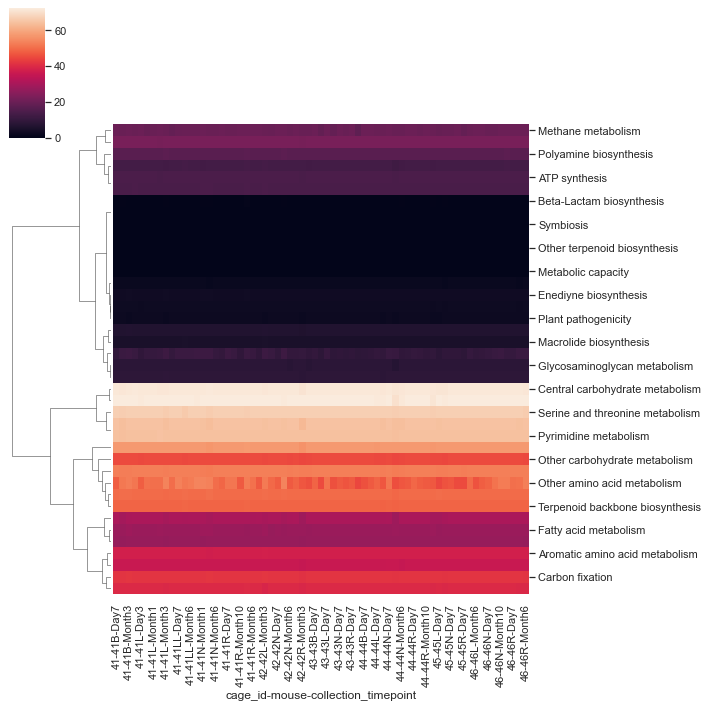

In [675]:
sns.clustermap(data=AZ51_metab_named_groups.T, col_cluster=False)

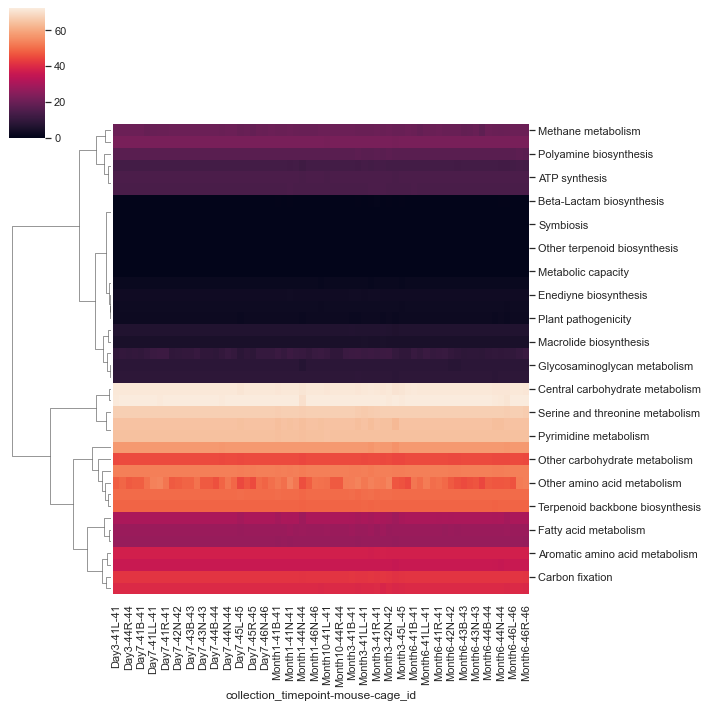

In [676]:
AZ51_metab_named_groups2 = AZ51_metab_named_min.groupby(by=['collection_timepoint', 'mouse', 'cage_id']).mean()
sns.clustermap(data=AZ51_metab_named_groups2.T, col_cluster=False)

In [677]:
AZ51_metab_named_mouse = pd.merge(AZ51_metab_all3.T, metadata_non[['mouse']], left_index=True, right_index=True)

In [678]:
AZ51_metab_named_mouse2 = AZ51_metab_named_mouse.groupby(by=['mouse']).mean()

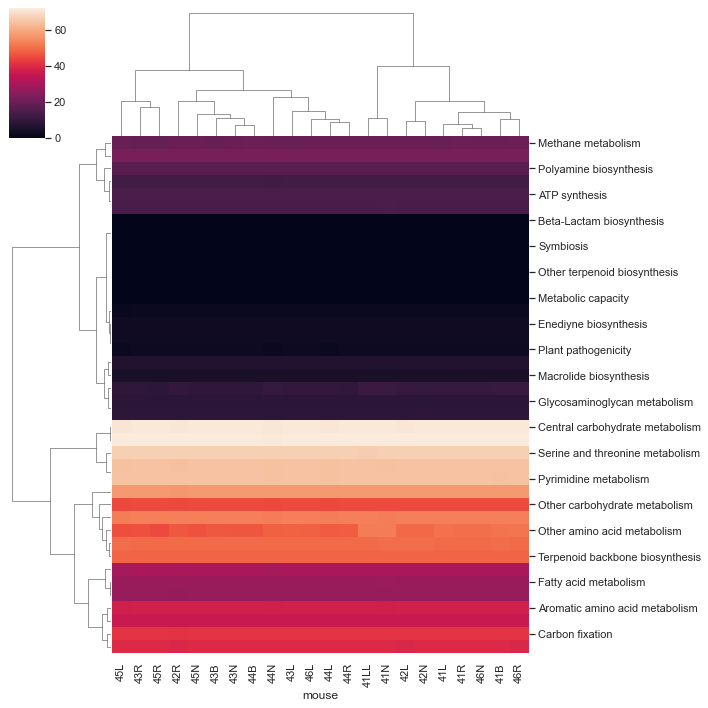

In [679]:
sns.clustermap(data=AZ51_metab_named_mouse2.T)

In [680]:
AZ51_metab_named_ctp = pd.merge(AZ51_metab_all3.T, metadata_non[['collection_timepoint']], left_index=True, right_index=True)

In [681]:
AZ51_metab_named_ctp2 = AZ51_metab_named_ctp.groupby(by=['collection_timepoint']).mean()

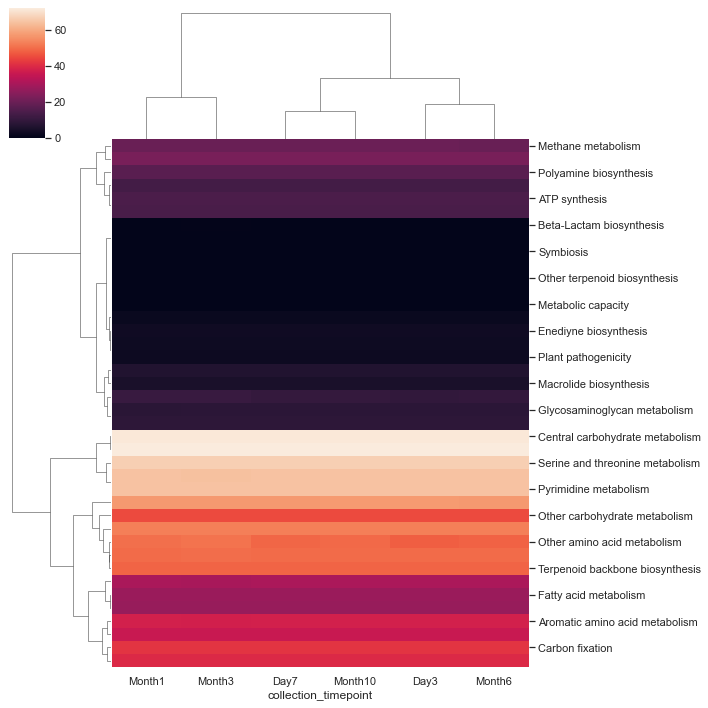

In [682]:
sns.clustermap(data=AZ51_metab_named_ctp2.T)

In [683]:
AZ51_metab_named_groups_stack = pd.DataFrame(AZ51_metab_named_groups.stack())
AZ51_metab_named_groups_stack.reset_index(inplace=True)
AZ51_metab_named_groups_stack.rename(columns={'level_3':'pathway_group', 0:'Mean % Present'}, inplace=True)
AZ51_metab_named_groups_stack

cage_id mouse collection_timepoint                    pathway_group  \
0         41   41B                 Day7                    ATP synthesis   
1         41   41B                 Day7  Arginine and proline metabolism   
2         41   41B                 Day7   Aromatic amino acid metabolism   
3         41   41B                 Day7            Aromatics degradation   
4         41   41B                 Day7         Beta-Lactam biosynthesis   
...      ...   ...                  ...                              ...   
2675      46   46R               Month6              Sterol biosynthesis   
2676      46   46R               Month6                Sulfur metabolism   
2677      46   46R               Month6                        Symbiosis   
2678      46   46R               Month6  Terpenoid backbone biosynthesis   
2679      46   46R               Month6  Type II polyketide biosynthesis   

      Mean % Present  
0          14.144091  
1          57.142500  
2          37.500000  
3           2.565714  
4           0.000000  
...              ...  
2675        0.000000  
2676       22.223333  
2677        0.000000  
2678       48.638571  
2679        8.576250  

[2680 rows x 5 columns]

In [684]:
AZ51_metab_named_groups_stack['collection_timepoint'] = pd.Categorical(AZ51_metab_named_groups_stack['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [685]:
AZ51_metab_named_groups_stack_sorted = AZ51_metab_named_groups_stack.sort_values('collection_timepoint')

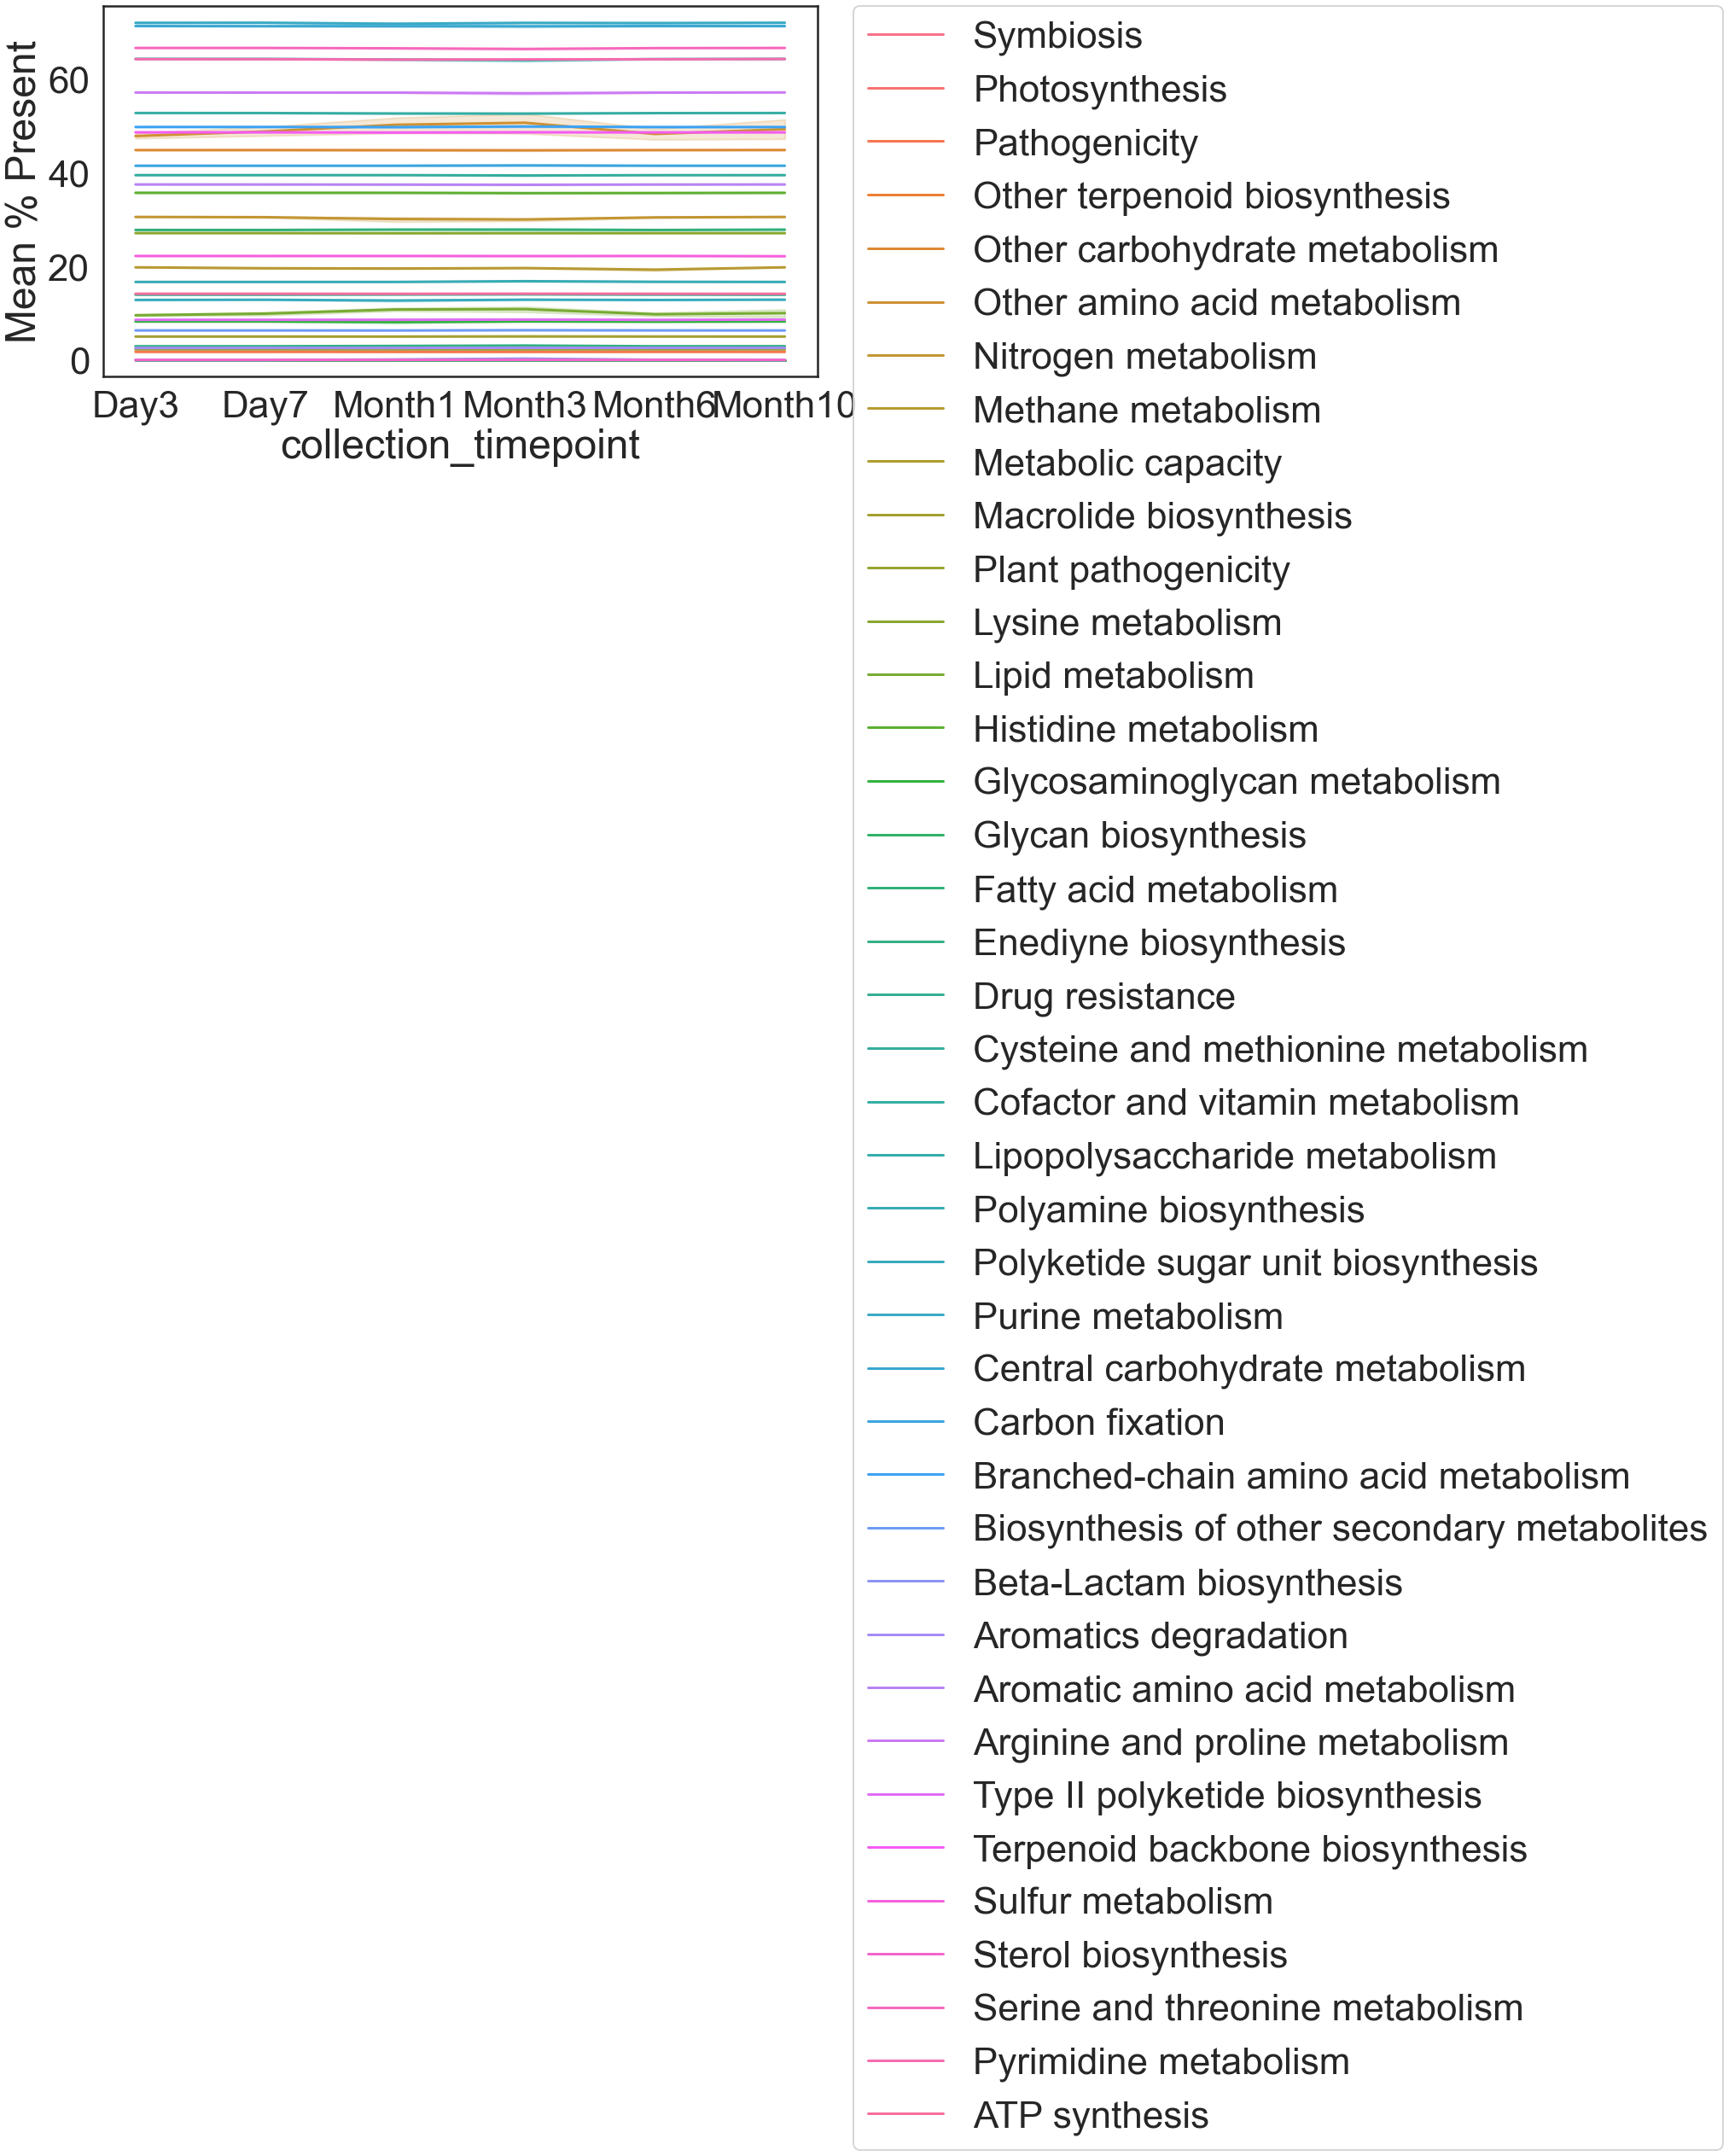

In [686]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('white')
sns.set_context('poster', font_scale=2)
g = sns.lineplot(data=AZ51_metab_named_groups_stack_sorted, x='collection_timepoint', 
             y='Mean % Present',
             hue='pathway_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Delta by Pathway Group

In [729]:
AZ51_change = AZ51_metab_named_groups
AZ51_change2 = AZ51_change.drop(index=['Month3', 'Day3', 'Month10', 'Month1'], level=2)
AZ51_change2.reset_index()

cage_id mouse collection_timepoint  ATP synthesis  \
0       41   41B                 Day7      14.144091   
1       41   41B               Month6      14.120417   
2       41   41L                 Day7      14.168794   
3       41   41L               Month6      14.144091   
4       41  41LL                 Day7      14.144091   
5       41  41LL               Month6      14.144091   
6       41   41N                 Day7      14.144091   
7       41   41N               Month6      14.144091   
8       41   41R                 Day7      14.144091   
9       41   41R               Month6      14.144091   
10      42   42L                 Day7      14.144091   
11      42   42L               Month6      14.144091   
12      42   42N                 Day7      14.144091   
13      42   42N               Month6      14.144091   
14      42   42R                 Day7      14.144091   
15      42   42R               Month6      14.144091   
16      43   43B                 Day7      14.144091   
17      43   43B               Month6      14.144091   
18      43   43L                 Day7      14.144091   
19      43   43L               Month6      14.144091   
20      43   43N                 Day7      14.144091   
21      43   43N               Month6      14.144091   
22      43   43R                 Day7      14.144091   
23      43   43R               Month6      14.144091   
24      44   44B                 Day7      14.144091   
25      44   44B               Month6      14.144091   
26      44   44L                 Day7      14.144091   
27      44   44L               Month6      14.132254   
28      44   44N                 Day7      14.144091   
29      44   44N               Month6      14.159886   
30      44   44R                 Day7      14.144091   
31      44   44R               Month6      14.128893   
32      45   45L                 Day7      14.110742   
33      45   45N                 Day7      14.144091   
34      45   45R                 Day7      14.144091   
35      46   46L                 Day7      14.144091   
36      46   46L               Month6      14.144091   
37      46   46N                 Day7      14.144091   
38      46   46N               Month6      14.144091   
39      46   46R                 Day7      14.144091   
40      46   46R               Month6      14.120417   

    Arginine and proline metabolism  Aromatic amino acid metabolism  \
0                         57.142500                       37.500000   
1                         57.142500                       37.500000   
2                         57.142500                       37.500000   
3                         57.142500                       37.500000   
4                         57.142500                       37.500000   
5                         57.142500                       37.500000   
6                         57.142500                       37.500000   
7                         57.142500                       37.500000   
8                         57.142500                       37.500000   
9                         57.142500                       37.500000   
10                        57.142500                       37.500000   
11                        57.142500                       37.500000   
12                        57.142500                       37.500000   
13                        57.142500                       37.413194   
14                        57.142500                       37.500000   
15                        57.142500                       37.500000   
16                        57.142500                       37.500000   
17                        57.142500                       37.500000   
18                        57.142500                       37.500000   
19                        57.142500                       37.500000   
20                        57.142500                       37.500000   
21                        57.142500                       37.500000   
22               

In [730]:
table = pd.pivot_table(AZ51_change2, values=AZ51_change.columns, index=['cage_id', 'mouse'], columns=['collection_timepoint'], aggfunc=np.mean)

In [731]:
table

ATP synthesis            Arginine and proline metabolism  \
collection_timepoint          Day7     Month6                            Day7   
cage_id mouse                                                                   
41      41B              14.144091  14.120417                       57.142500   
        41L              14.168794  14.144091                       57.142500   
        41LL             14.144091  14.144091                       57.142500   
        41N              14.144091  14.144091                       57.142500   
        41R              14.144091  14.144091                       57.142500   
42      42L              14.144091  14.144091                       57.142500   
        42N              14.144091  14.144091                       57.142500   
        42R              14.144091  14.144091                       57.142500   
43      43B              14.144091  14.144091                       57.142500   
        43L              14.144091  14.144091                       57.142500   
        43N              14.144091  14.144091                       57.142500   
        43R              14.144091  14.144091                       57.142500   
44      44B              14.144091  14.144091                       57.142500   
        44L              14.144091  14.132254                       56.864740   
        44N              14.144091  14.159886                       57.142500   
        44R              14.144091  14.128893                       57.142500   
45      45L              14.110742        NaN                       57.010921   
        45N              14.144091        NaN                       57.142500   
        45R              14.144091        NaN                       57.142500   
46      46L              14.144091  14.144091                       57.142500   
        46N              14.144091  14.144091                       57.142500   
        46R              14.144091  14.120417                       57.142500   

                                Aromatic amino acid metabolism             \
collection_timepoint     Month6                           Day7     Month6   
cage_id mouse                                                               
41      41B           57.142500                      37.500000  37.500000   
        41L           57.142500                      37.500000  37.500000   
        41LL          57.142500                      37.500000  37.500000   
        41N           57.142500                      37.500000  37.500000   
        41R           57.142500                      37.500000  37.500000   
42      42L           57.142500                      37.500000  37.500000   
        42N           57.142500                      37.500000  37.413194   
        42R           57.142500                      37.500000  37.500000   
43      43B           57.142500                      37.500000  37.500000   
        43L           57.142500                      37.500000  37.500000   
        43N           57.142500                      37.500000  37.500000   
        43R           57.142500                      37.500000  37.500000   
44      44B           57.142500                      37.500000  37.500000   
        44L           57.146250                      37.500000  37.450382   
        44N           57.038333                      37.500000  37.442118   
        44R           56.821630                      37.500000  37.357645   
45      45L                 NaN                      37.335526        NaN   
        45N                 NaN                      37.500000        NaN   
        45R                 NaN                      37.500000        NaN   
46      46L           57.142500                      37.500000  37.500000   
        46N           57.142500                      37.500000  37.500000   
        46R           57.142500                      37.500000  37.500000   

                     Aromatics degradation           Beta-Lactam bios

In [732]:
new_cols1 = [(x, 'Day7') for x in table.columns.levels[0]]
new_cols2 = [(x, 'Month6') for x in table.columns.levels[0]]

In [733]:
deltaz = [(table[x, 'Month6'] - table[x, 'Day7']) for x in table.columns.levels[0]]

In [734]:
for x in table.columns.levels[0]:
    table[x, 'delta'] = table[x, 'Month6'] - table[x, 'Day7']

In [735]:
table2 = table.groupby(axis=1, level=[0, 1]).mean()
table2

ATP synthesis                           \
collection_timepoint          Day7     Month6         delta   
cage_id mouse                                                 
41      41B              14.144091  14.120417 -2.367424e-02   
        41L              14.168794  14.144091 -2.470356e-02   
        41LL             14.144091  14.144091  0.000000e+00   
        41N              14.144091  14.144091  0.000000e+00   
        41R              14.144091  14.144091  1.776357e-15   
42      42L              14.144091  14.144091  0.000000e+00   
        42N              14.144091  14.144091  0.000000e+00   
        42R              14.144091  14.144091  0.000000e+00   
43      43B              14.144091  14.144091  1.776357e-15   
        43L              14.144091  14.144091  0.000000e+00   
        43N              14.144091  14.144091  0.000000e+00   
        43R              14.144091  14.144091  1.776357e-15   
44      44B              14.144091  14.144091  1.776357e-15   
        44L              14.144091  14.132254 -1.183712e-02   
        44N              14.144091  14.159886  1.579545e-02   
        44R              14.144091  14.128893 -1.519763e-02   
45      45L              14.110742        NaN           NaN   
        45N              14.144091        NaN           NaN   
        45R              14.144091        NaN           NaN   
46      46L              14.144091  14.144091  0.000000e+00   
        46N              14.144091  14.144091  3.552714e-15   
        46R              14.144091  14.120417 -2.367424e-02   

                     Arginine and proline metabolism                           \
collection_timepoint                            Day7     Month6         delta   
cage_id mouse                                                                   
41      41B                                57.142500  57.142500  0.000000e+00   
        41L                                57.142500  57.142500 -7.105427e-15   
        41LL                               57.142500  57.142500  0.000000e+00   
        41N                                57.142500  57.142500  0.000000e+00   
        41R                                57.142500  57.142500  7.105427e-15   
42      42L                                57.142500  57.142500  0.000000e+00   
        42N                                57.142500  57.142500  0.000000e+00   
        42R                                57.142500  57.142500  0.000000e+00   
43      43B                                57.142500  57.142500  7.105427e-15   
        43L                                57.142500  57.142500  0.000000e+00   
        43N                                57.142500  57.142500  0.000000e+00   
        43R                                57.142500  57.142500  7.105427e-15   
44      44B                                57.142500  57.142500  7.105427e-15   
        44L                                56.864740  57.146250  2.815104e-01   
        44N                                57.142500  57.038333 -1.041667e-01   
        44R                                57.142500  56.821630 -3.208696e-01   
45      45L                                57.010921        NaN           NaN   
        45N                                57.142500        NaN           NaN   
        45R                                57.142500        NaN           NaN   
46      46L                                57.142500  57.142500  0.000000e+00   
        46N                                57.142500  57.142500  1.421085e-14   
        46R                                57.142500  57.142500 -7.105427e-15   

                     Aromatic amino acid metabolism                       \
collection_timepoint                           Day7     Month6     delta   
cage_id mouse                                                              
41      41B                               37.500000  37.500000  0.000000   
        41L                               37.500000  37.500000  0.000000   
        41LL                           

In [736]:
table3 = table2.dropna(axis=0)
table3

ATP synthesis                           \
collection_timepoint          Day7     Month6         delta   
cage_id mouse                                                 
41      41B              14.144091  14.120417 -2.367424e-02   
        41L              14.168794  14.144091 -2.470356e-02   
        41LL             14.144091  14.144091  0.000000e+00   
        41N              14.144091  14.144091  0.000000e+00   
        41R              14.144091  14.144091  1.776357e-15   
42      42L              14.144091  14.144091  0.000000e+00   
        42N              14.144091  14.144091  0.000000e+00   
        42R              14.144091  14.144091  0.000000e+00   
43      43B              14.144091  14.144091  1.776357e-15   
        43L              14.144091  14.144091  0.000000e+00   
        43N              14.144091  14.144091  0.000000e+00   
        43R              14.144091  14.144091  1.776357e-15   
44      44B              14.144091  14.144091  1.776357e-15   
        44L              14.144091  14.132254 -1.183712e-02   
        44N              14.144091  14.159886  1.579545e-02   
        44R              14.144091  14.128893 -1.519763e-02   
46      46L              14.144091  14.144091  0.000000e+00   
        46N              14.144091  14.144091  3.552714e-15   
        46R              14.144091  14.120417 -2.367424e-02   

                     Arginine and proline metabolism                           \
collection_timepoint                            Day7     Month6         delta   
cage_id mouse                                                                   
41      41B                                 57.14250  57.142500  0.000000e+00   
        41L                                 57.14250  57.142500 -7.105427e-15   
        41LL                                57.14250  57.142500  0.000000e+00   
        41N                                 57.14250  57.142500  0.000000e+00   
        41R                                 57.14250  57.142500  7.105427e-15   
42      42L                                 57.14250  57.142500  0.000000e+00   
        42N                                 57.14250  57.142500  0.000000e+00   
        42R                                 57.14250  57.142500  0.000000e+00   
43      43B                                 57.14250  57.142500  7.105427e-15   
        43L                                 57.14250  57.142500  0.000000e+00   
        43N                                 57.14250  57.142500  0.000000e+00   
        43R                                 57.14250  57.142500  7.105427e-15   
44      44B                                 57.14250  57.142500  7.105427e-15   
        44L                                 56.86474  57.146250  2.815104e-01   
        44N                                 57.14250  57.038333 -1.041667e-01   
        44R                                 57.14250  56.821630 -3.208696e-01   
46      46L                                 57.14250  57.142500  0.000000e+00   
        46N                                 57.14250  57.142500  1.421085e-14   
        46R                                 57.14250  57.142500 -7.105427e-15   

                     Aromatic amino acid metabolism                       \
collection_timepoint                           Day7     Month6     delta   
cage_id mouse                                                              
41      41B                                    37.5  37.500000  0.000000   
        41L                                    37.5  37.500000  0.000000   
        41LL                                   37.5  37.500000  0.000000   
        41N                                    37.5  37.500000  0.000000   
        41R                                    37.5  37.500000  0.000000   
42      42L                                    37.5  37.500000  0.000000   
        42N                                    37.5  37.413194 -0.086806   
        42R                                    37.5  37.500000  0.000000   
43      43B    

In [737]:
grap4ing = table3.stack(level=0).reset_index(level=0).reset_index()
grap4ing.head()

collection_timepoint mouse                          level_1 cage_id  \
0                      41B                    ATP synthesis      41   
1                      41B  Arginine and proline metabolism      41   
2                      41B   Aromatic amino acid metabolism      41   
3                      41B            Aromatics degradation      41   
4                      41B         Beta-Lactam biosynthesis      41   

collection_timepoint       Day7     Month6     delta  
0                     14.144091  14.120417 -0.023674  
1                     57.142500  57.142500  0.000000  
2                     37.500000  37.500000  0.000000  
3                      2.565714   2.565714  0.000000  
4                      0.000000   0.000000  0.000000

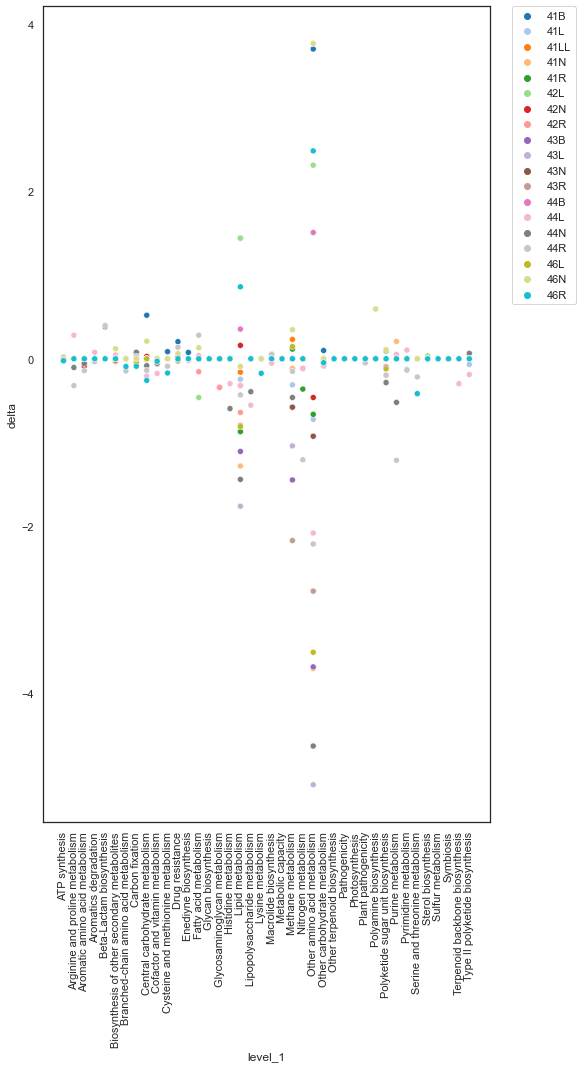

In [738]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ing, x='level_1', y='delta', hue='mouse', palette='tab20')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

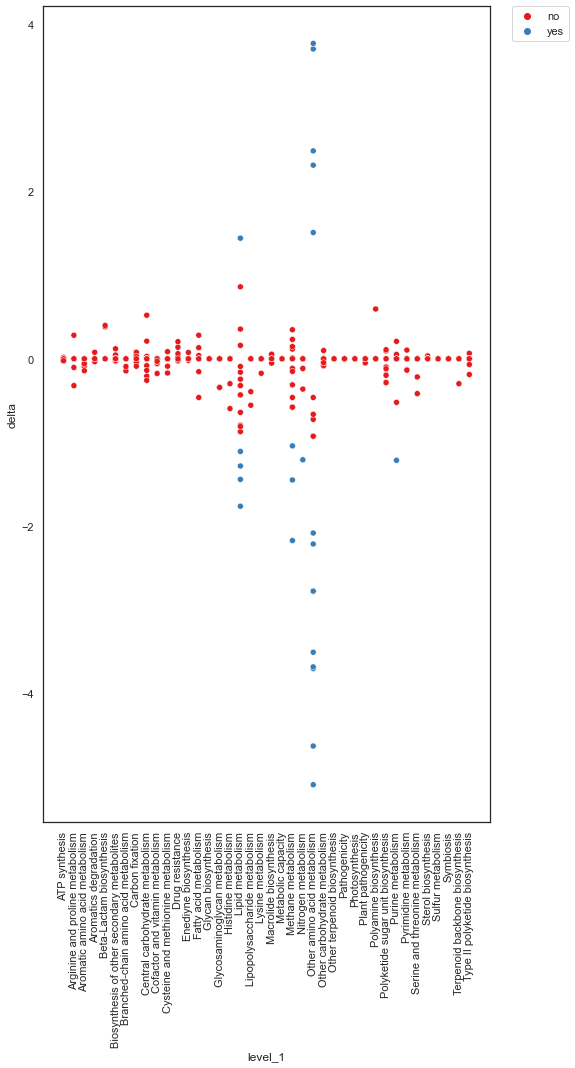

In [739]:
grap4ing['outlier'] = np.where((grap4ing['delta']>1)|(grap4ing['delta']<-1), 'yes', 'no')
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ing, x='level_1', y='delta', hue='outlier', palette='Set1')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./AZ51_group_delta_outliers.png', bbox_inches='tight')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Lipid metabolism'),
  Text(1, 0, 'Other amino acid metabolism'),
  Text(2, 0, 'Methane metabolism'),
  Text(3, 0, 'Nitrogen metabolism'),
  Text(4, 0, 'Purine metabolism')])

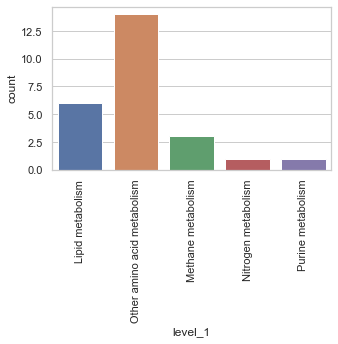

In [740]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style('whitegrid')
sns.countplot(data=grap4ing[grap4ing['outlier'] == 'yes'], x='level_1')
plt.xticks(rotation=90)

In [741]:
out_pathways = grap4ing[grap4ing['outlier'] == 'yes'].level_1.unique()

In [742]:
pathwayz = pathways.reset_index()
pathwayz.head()

pathway group                                     name  41B_Day7_10  \
0  ATP synthesis    Cytochrome aa3-600 menaquinol oxidase        25.00   
1  ATP synthesis                   Cytochrome b6f complex         0.00   
2  ATP synthesis                   Cytochrome bc1 complex         0.00   
3  ATP synthesis  Cytochrome bc1 complex respiratory unit         0.00   
4  ATP synthesis          Cytochrome bd ubiquinol oxidase        66.67   

   41B_Day7_11  41B_Day7_12  41B_Day7_13  41B_Day7_14  41B_Day7_15  \
0        25.00        25.00        25.00        25.00        25.00   
1         0.00         0.00         0.00         0.00         0.00   
2         0.00         0.00         0.00         0.00         0.00   
3         0.00         0.00         0.00         0.00         0.00   
4        66.67        66.67        66.67        66.67        66.67   

   41B_Day7_16  41B_Day7_17  ...  46R_Month6_23  46R_Month6_24  46R_Month6_2  \
0        25.00        25.00  ...           25.0           25.0         25.00   
1         0.00         0.00  ...           12.5           12.5          0.00   
2         0.00         0.00  ...            0.0            0.0          0.00   
3         0.00         0.00  ...            0.0            0.0          0.00   
4        66.67        66.67  ...          100.0          100.0         66.67   

   46R_Month6_3  46R_Month6_4  46R_Month6_5  46R_Month6_6  46R_Month6_7  \
0         25.00         25.00         25.00         25.00         25.00   
1          0.00          0.00          0.00          0.00          0.00   
2          0.00          0.00          0.00          0.00          0.00   
3          0.00          0.00          0.00          0.00          0.00   
4         66.67         66.67         66.67         66.67         66.67   

   46R_Month6_8  46R_Month6_9  
0         25.00         25.00  
1          0.00          0.00  
2          0.00          0.00  
3          0.00          0.00  
4         66.67         66.67  

[5 rows x 1596 columns]

In [743]:
pathwayz2 = pathwayz[pathwayz['pathway group'].isin(out_pathways)]
pathwayz2.head()

pathway group                                               name  \
232  Lipid metabolism                           Acylglycerol degradation   
233  Lipid metabolism                              Ceramide biosynthesis   
234  Lipid metabolism                         Jasmonic acid biosynthesis   
235  Lipid metabolism  Ketone body biosynthesis, acetyl-CoA => acetoa...   
236  Lipid metabolism                      Lactosylceramide biosynthesis   

     41B_Day7_10  41B_Day7_11  41B_Day7_12  41B_Day7_13  41B_Day7_14  \
232          0.0          0.0          0.0          0.0          0.0   
233          0.0          0.0          0.0          0.0          0.0   
234          0.0          0.0          0.0          0.0          0.0   
235         50.0         50.0         50.0         50.0         50.0   
236          0.0          0.0          0.0          0.0          0.0   

     41B_Day7_15  41B_Day7_16  41B_Day7_17  ...  46R_Month6_23  46R_Month6_24  \
232          0.0          0.0          0.0  ...            0.0            0.0   
233          0.0          0.0          0.0  ...           25.0           25.0   
234          0.0          0.0          0.0  ...            0.0            0.0   
235         50.0         50.0         50.0  ...           50.0           50.0   
236          0.0          0.0          0.0  ...            0.0            0.0   

     46R_Month6_2  46R_Month6_3  46R_Month6_4  46R_Month6_5  46R_Month6_6  \
232           0.0           0.0           0.0           0.0           0.0   
233           0.0           0.0           0.0           0.0           0.0   
234           0.0           0.0           0.0           0.0           0.0   
235          50.0          50.0          50.0          50.0          50.0   
236           0.0           0.0           0.0           0.0           0.0   

     46R_Month6_7  46R_Month6_8  46R_Month6_9  
232           0.0           0.0           0.0  
233           0.0           0.0           0.0  
234           0.0           0.0           0.0  
235          50.0          50.0          50.0  
236           0.0           0.0           0.0  

[5 rows x 1596 columns]

In [744]:
pathwayz2.shape

(38, 1596)

In [745]:
pathwayz3 = pathwayz2.set_index(['name'])
pathwayz3.drop(columns=['pathway group'], inplace=True)
pathwayz3.head()

41B_Day7_10  41B_Day7_11  \
name                                                                           
Acylglycerol degradation                                    0.0          0.0   
Ceramide biosynthesis                                       0.0          0.0   
Jasmonic acid biosynthesis                                  0.0          0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...         50.0         50.0   
Lactosylceramide biosynthesis                               0.0          0.0   

                                                    41B_Day7_12  41B_Day7_13  \
name                                                                           
Acylglycerol degradation                                    0.0          0.0   
Ceramide biosynthesis                                       0.0          0.0   
Jasmonic acid biosynthesis                                  0.0          0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...         50.0         50.0   
Lactosylceramide biosynthesis                               0.0          0.0   

                                                    41B_Day7_14  41B_Day7_15  \
name                                                                           
Acylglycerol degradation                                    0.0          0.0   
Ceramide biosynthesis                                       0.0          0.0   
Jasmonic acid biosynthesis                                  0.0          0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...         50.0         50.0   
Lactosylceramide biosynthesis                               0.0          0.0   

                                                    41B_Day7_16  41B_Day7_17  \
name                                                                           
Acylglycerol degradation                                    0.0          0.0   
Ceramide biosynthesis                                       0.0          0.0   
Jasmonic acid biosynthesis                                  0.0          0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...         50.0         50.0   
Lactosylceramide biosynthesis                               0.0          0.0   

                                                    41B_Day7_18  41B_Day7_19  \
name                                                                           
Acylglycerol degradation                                    0.0          0.0   
Ceramide biosynthesis                                       0.0          0.0   
Jasmonic acid biosynthesis                                  0.0          0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...         50.0         50.0   
Lactosylceramide biosynthesis                               0.0          0.0   

                                                    ...  46R_Month6_23  \
name                                                ...                  
Acylglycerol degradation                            ...            0.0   
Ceramide biosynthesis                               ...           25.0   
Jasmonic acid biosynthesis                          ...            0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...  ...           50.0   
Lactosylceramide biosynthesis                       ...            0.0   

                                                    46R_Month6_24  \
name                                                                
Acylglycerol degradation                                      0.0   
Ceramide biosynthesis                                        25.0   
Jasmonic acid biosynthesis                                    0.0   
Ketone body biosynthesis, acetyl-CoA => acetoac...           50.0   
Lactosylceramide biosynthesis                                 0.0   

                                                    46R_Month6_2  \
name                                                               
Acylglycerol degradation                                     0.0   
Ceramide biosynthesis                   

In [746]:
pathwayz_named = pd.merge(pathwayz3.T, metadata_non[['mouse', 'collection_timepoint']], left_index=True, right_index=True)
pathwayz_named.head()

Acylglycerol degradation  Ceramide biosynthesis  \
41B_Day7_10                       0.0                    0.0   
41B_Day7_11                       0.0                    0.0   
41B_Day7_12                       0.0                    0.0   
41B_Day7_13                       0.0                    0.0   
41B_Day7_14                       0.0                    0.0   

             Jasmonic acid biosynthesis  \
41B_Day7_10                         0.0   
41B_Day7_11                         0.0   
41B_Day7_12                         0.0   
41B_Day7_13                         0.0   
41B_Day7_14                         0.0   

             Ketone body biosynthesis, acetyl-CoA => acetoacetate--3-hydroxybutyrate--acetone  \
41B_Day7_10                                               50.0                                  
41B_Day7_11                                               50.0                                  
41B_Day7_12                                               50.0                                  
41B_Day7_13                                               50.0                                  
41B_Day7_14                                               50.0                                  

             Lactosylceramide biosynthesis  \
41B_Day7_10                            0.0   
41B_Day7_11                            0.0   
41B_Day7_12                            0.0   
41B_Day7_13                            0.0   
41B_Day7_14                            0.0   

             Phosphatidylcholine (PC) biosynthesis, PE => PC  \
41B_Day7_10                                              0.0   
41B_Day7_11                                              0.0   
41B_Day7_12                                              0.0   
41B_Day7_13                                              0.0   
41B_Day7_14                                              0.0   

             Phosphatidylcholine (PC) biosynthesis, choline => PC  \
41B_Day7_10                                                0.0      
41B_Day7_11                                                0.0      
41B_Day7_12                                                0.0      
41B_Day7_13                                                0.0      
41B_Day7_14                                                0.0      

             Phosphatidylethanolamine (PE) biosynthesis, PA => PS => PE  \
41B_Day7_10                                              33.33            
41B_Day7_11                                              33.33            
41B_Day7_12                                              33.33            
41B_Day7_13                                              33.33            
41B_Day7_14                                              33.33            

             Phosphatidylethanolamine (PE) biosynthesis, ethanolamine => PE  \
41B_Day7_10                                                0.0                
41B_Day7_11                                                0.0                
41B_Day7_12                                                0.0                
41B_Day7_13                                                0.0                
41B_Day7_14                                                0.0                

             Sphingosine biosynthesis  ...  \
41B_Day7_10                       0.0  ...   
41B_Day7_11                       0.0  ...   
41B_Day7_12                       0.0  ...   
41B_Day7_13                       0.0  ...   
41B_Day7_14                       0.0  ...   

             Nitrogen fixation, nitrogen => ammonia  \
41B_Day7_10                                     0.0   
41B_Day7_11                                     0.0   
41B_Day7_12                                     0.0   
41B_Day7_13                                     0.0   
41B_Day7_14                                     0.0   

             Cyanogenic glycoside biosynthesis, tyrosine => dhurrin  \
41B_Day7_10                                                0.0        
41B_Day7_11                      

In [747]:
pathwayz_named_grouped = pathwayz_named.groupby(by=['mouse', 'collection_timepoint']).mean()
pathwayz_named_grouped.head()

Acylglycerol degradation  Ceramide biosynthesis  \
mouse collection_timepoint                                                    
41B   Day7                                       0.0                    0.0   
      Month1                                     0.0                    0.0   
      Month3                                     0.0                    0.0   
      Month6                                     0.0                    0.0   
41L   Day3                                       0.0                    0.0   

                            Jasmonic acid biosynthesis  \
mouse collection_timepoint                               
41B   Day7                                         0.0   
      Month1                                       0.0   
      Month3                                       0.0   
      Month6                                       0.0   
41L   Day3                                         0.0   

                            Ketone body biosynthesis, acetyl-CoA => acetoacetate--3-hydroxybutyrate--acetone  \
mouse collection_timepoint                                                                                     
41B   Day7                                                               50.0                                  
      Month1                                                             50.0                                  
      Month3                                                             50.0                                  
      Month6                                                             50.0                                  
41L   Day3                                                               50.0                                  

                            Lactosylceramide biosynthesis  \
mouse collection_timepoint                                  
41B   Day7                                            0.0   
      Month1                                          0.0   
      Month3                                          0.0   
      Month6                                          0.0   
41L   Day3                                            0.0   

                            Phosphatidylcholine (PC) biosynthesis, PE => PC  \
mouse collection_timepoint                                                    
41B   Day7                                                              0.0   
      Month1                                                            0.0   
      Month3                                                            0.0   
      Month6                                                            0.0   
41L   Day3                                                              0.0   

                            Phosphatidylcholine (PC) biosynthesis, choline => PC  \
mouse collection_timepoint                                                         
41B   Day7                                                                0.0      
      Month1                                                              0.0      
      Month3                                                              0.0      
      Month6                                                              0.0      
41L   Day3                                                                0.0      

                            Phosphatidylethanolamine (PE) biosynthesis, PA => PS => PE  \
mouse collection_timepoint                                                               
41B   Day7                                                              33.33            
      Month1                                                            33.33            
      Month3                                                            33.33            
      Month6                                                            33.33            
41L   Day3                                                              33.33            

                            Phosphatidylethanolamine (PE) biosynthesis, ethanola

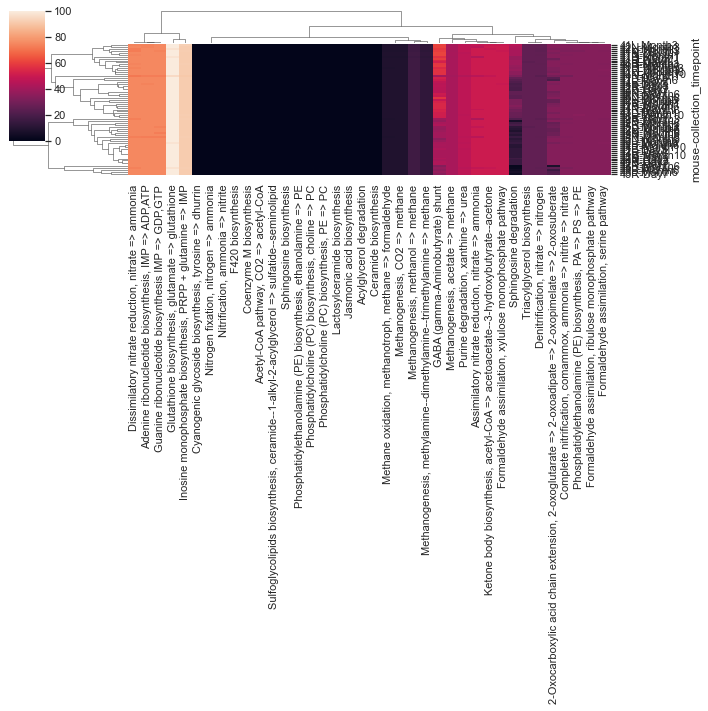

In [748]:
sns.set(rc = {'figure.figsize':(100,100)})
sns.clustermap(data=pathwayz_named_grouped, yticklabels=1, xticklabels=1)

# Delta by Individual Pathway

In [749]:
AZ51_changez = pathwayz_named_grouped
AZ51_changez2 = AZ51_changez.drop(index=['Month3', 'Day3', 'Month10', 'Month1'], level=1)
AZ51_changez2.reset_index()

mouse collection_timepoint  Acylglycerol degradation  \
0    41B                 Day7                       0.0   
1    41B               Month6                       0.0   
2    41L                 Day7                       0.0   
3    41L               Month6                       0.0   
4   41LL                 Day7                       0.0   
5   41LL               Month6                       0.0   
6    41N                 Day7                       0.0   
7    41N               Month6                       0.0   
8    41R                 Day7                       0.0   
9    41R               Month6                       0.0   
10   42L                 Day7                       0.0   
11   42L               Month6                       0.0   
12   42N                 Day7                       0.0   
13   42N               Month6                       0.0   
14   42R                 Day7                       0.0   
15   42R               Month6                       0.0   
16   43B                 Day7                       0.0   
17   43B               Month6                       0.0   
18   43L                 Day7                       0.0   
19   43L               Month6                       0.0   
20   43N                 Day7                       0.0   
21   43N               Month6                       0.0   
22   43R                 Day7                       0.0   
23   43R               Month6                       0.0   
24   44B                 Day7                       0.0   
25   44B               Month6                       0.0   
26   44L                 Day7                       0.0   
27   44L               Month6                       0.0   
28   44N                 Day7                       0.0   
29   44N               Month6                       0.0   
30   44R                 Day7                       0.0   
31   44R               Month6                       0.0   
32   45L                 Day7                       0.0   
33   45N                 Day7                       0.0   
34   45R                 Day7                       0.0   
35   46L                 Day7                       0.0   
36   46L               Month6                       0.0   
37   46N                 Day7                       0.0   
38   46N               Month6                       0.0   
39   46R                 Day7                       0.0   
40   46R               Month6                       0.0   

    Ceramide biosynthesis  Jasmonic acid biosynthesis  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
5                     0.0                         0.0   
6                     0.0                         0.0   
7                     0.0                         0.0   
8                     0.0                         0.0   
9                     0.0                         0.0   
10                    0.0                         0.0   
11                    0.0                         0.0   
12                    0.0                         0.0   
13                    0.0                         0.0   
14                    0.0                         0.0   
15                    0.0                         0.0   
16                    0.0                         0.0   
17                    0.0                         0.0   
18                    0.0                         0.0   
19                    0.0                         0.0   
20                    0.0                         0.0   
21                    0.0                         0.0   
22                    0.0                         0.0   
23                    0.0                         0.0   
24                    0.0                         0.0   
25                    0.0                 

In [750]:
tabled = pd.pivot_table(AZ51_changez2, values=AZ51_changez2.columns, index=['mouse'], columns=['collection_timepoint'], aggfunc=np.mean)

In [751]:
tabled

2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
collection_timepoint                                                                                                   Day7   
mouse                                                                                                                         
41B                                                           33.330000                                                       
41L                                                           23.186087                                                       
41LL                                                          27.775000                                                       
41N                                                           31.941250                                                       
41R                                                           31.941250                                                       
42L                                                           33.330000                                                       
42N                                                           33.330000                                                       
42R                                                           33.330000                                                       
43B                                                           33.330000                                                       
43L                                                           33.330000                                                       
43N                                                           33.330000                                                       
43R                                                           33.330000                                                       
44B                                                           33.330000                                                       
44L                                                           31.941250                                                       
44N                                                           33.330000                                                       
44R                                                           33.330000                                                       
45L                                                           24.558947                                                       
45N                                                           27.775000                                                       
45R                                                           22.220000                                                       
46L                                                           31.575789                                                       
46N                                                           29.163750                                                       
46R                                                           33.330000                                                       

                                Acetyl-CoA pathway, CO2 => acetyl-CoA         \
collection_timepoint     Month6                                  Day7 Month6   
mouse                                                                          
41B                   31.941250                                   0.0    0.0   
41L                   19.442500                                   0.0    0.0   
41LL                  30.552500                                   0.0    0.0   
41N                   30.552500                                   0.0    0.0   
41R                   33.330000                                   0.0    0.0   
42L                   26.386250                                   0.0    0.0   
42N                   26.386250                                   0.0    0.0   
42R                   26.386250              

In [752]:
new_cols1 = [(x, 'Day7') for x in tabled.columns.levels[0]]
new_cols2 = [(x, 'Month6') for x in tabled.columns.levels[0]]

In [753]:
deltad = [(tabled[x, 'Month6'] - tabled[x, 'Day7']) for x in tabled.columns.levels[0]]

In [754]:
for x in tabled.columns.levels[0]:
    tabled[x, 'delta'] = tabled[x, 'Month6'] - tabled[x, 'Day7']

In [755]:
tabled2 = tabled.groupby(axis=1, level=[0, 1]).mean()
tabled2

2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
collection_timepoint                                                                                                   Day7   
mouse                                                                                                                         
41B                                                           33.330000                                                       
41L                                                           23.186087                                                       
41LL                                                          27.775000                                                       
41N                                                           31.941250                                                       
41R                                                           31.941250                                                       
42L                                                           33.330000                                                       
42N                                                           33.330000                                                       
42R                                                           33.330000                                                       
43B                                                           33.330000                                                       
43L                                                           33.330000                                                       
43N                                                           33.330000                                                       
43R                                                           33.330000                                                       
44B                                                           33.330000                                                       
44L                                                           31.941250                                                       
44N                                                           33.330000                                                       
44R                                                           33.330000                                                       
45L                                                           24.558947                                                       
45N                                                           27.775000                                                       
45R                                                           22.220000                                                       
46L                                                           31.575789                                                       
46N                                                           29.163750                                                       
46R                                                           33.330000                                                       

                                               \
collection_timepoint     Month6         delta   
mouse                                           
41B                   31.941250 -1.388750e+00   
41L                   19.442500 -3.743587e+00   
41LL                  30.552500  2.777500e+00   
41N                   30.552500 -1.388750e+00   
41R                   33.330000  1.388750e+00   
42L                   26.386250 -6.943750e+00   
42N                   26.386250 -6.943750e+00   
42R                   26.386250 -6.943750e+00   
43B                   15.940435 -1.738957e+01   
43L                   20.831250 -1.249875e+01   
43N                   26.386250 -6.943750e+00   
43R                    7.245652 -2.608435e+01   
44B                   33.330000  0.000000e+00   
44L                   30.552500 -1.388750e+00   
44N         

In [756]:
tabled3 = tabled2.dropna(axis=0)
tabled3

2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
collection_timepoint                                                                                                   Day7   
mouse                                                                                                                         
41B                                                           33.330000                                                       
41L                                                           23.186087                                                       
41LL                                                          27.775000                                                       
41N                                                           31.941250                                                       
41R                                                           31.941250                                                       
42L                                                           33.330000                                                       
42N                                                           33.330000                                                       
42R                                                           33.330000                                                       
43B                                                           33.330000                                                       
43L                                                           33.330000                                                       
43N                                                           33.330000                                                       
43R                                                           33.330000                                                       
44B                                                           33.330000                                                       
44L                                                           31.941250                                                       
44N                                                           33.330000                                                       
44R                                                           33.330000                                                       
46L                                                           31.575789                                                       
46N                                                           29.163750                                                       
46R                                                           33.330000                                                       

                                               \
collection_timepoint     Month6         delta   
mouse                                           
41B                   31.941250 -1.388750e+00   
41L                   19.442500 -3.743587e+00   
41LL                  30.552500  2.777500e+00   
41N                   30.552500 -1.388750e+00   
41R                   33.330000  1.388750e+00   
42L                   26.386250 -6.943750e+00   
42N                   26.386250 -6.943750e+00   
42R                   26.386250 -6.943750e+00   
43B                   15.940435 -1.738957e+01   
43L                   20.831250 -1.249875e+01   
43N                   26.386250 -6.943750e+00   
43R                    7.245652 -2.608435e+01   
44B                   33.330000  0.000000e+00   
44L                   30.552500 -1.388750e+00   
44N                   27.775000 -5.555000e+00   
44R                   31.880870 -1.449130e+00   
46L                   33.330000  1.754211e+00   
46N                   33.330000  4.166250e+00   
46R                   33.330000 -7.105427e-15   

                     Acetyl-CoA pathway, CO2 => acetyl-CoA               \
collection_timepoint                                  Day7 Month6 delta 

In [757]:
grap4ingz = tabled3.stack(level=0).reset_index(level=0).reset_index()
grap4ingz.head()

collection_timepoint                                              index mouse  \
0                     2-Oxocarboxylic acid chain extension, 2-oxoglu...   41B   
1                                 Acetyl-CoA pathway, CO2 => acetyl-CoA   41B   
2                                              Acylglycerol degradation   41B   
3                     Adenine ribonucleotide biosynthesis, IMP => AD...   41B   
4                     Assimilatory nitrate reduction, nitrate => amm...   41B   

collection_timepoint   Day7    Month6    delta  
0                     33.33  31.94125 -1.38875  
1                      0.00   0.00000  0.00000  
2                      0.00   0.00000  0.00000  
3                     75.00  75.00000  0.00000  
4                     50.00  50.00000  0.00000

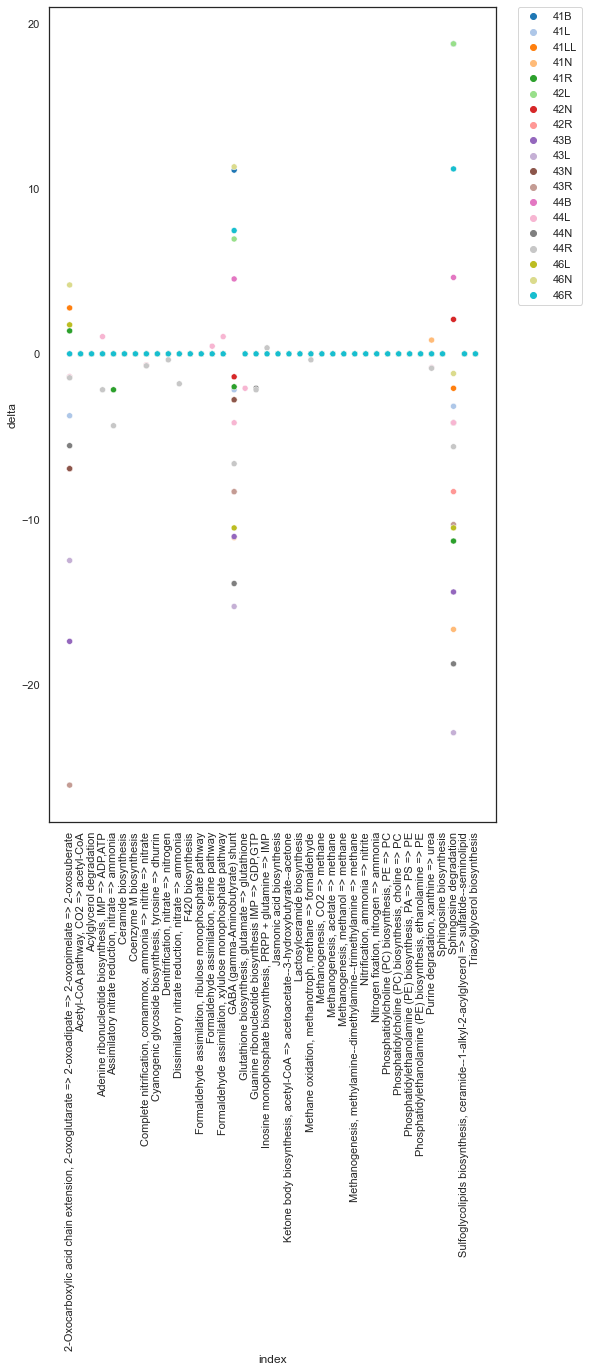

In [758]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.scatterplot(data=grap4ingz, x='index', y='delta', hue='mouse', palette='tab20')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [759]:
grap4ingz['outlier'] = np.where((grap4ingz['delta']>1)|(grap4ingz['delta']<-1), 'yes', 'no')

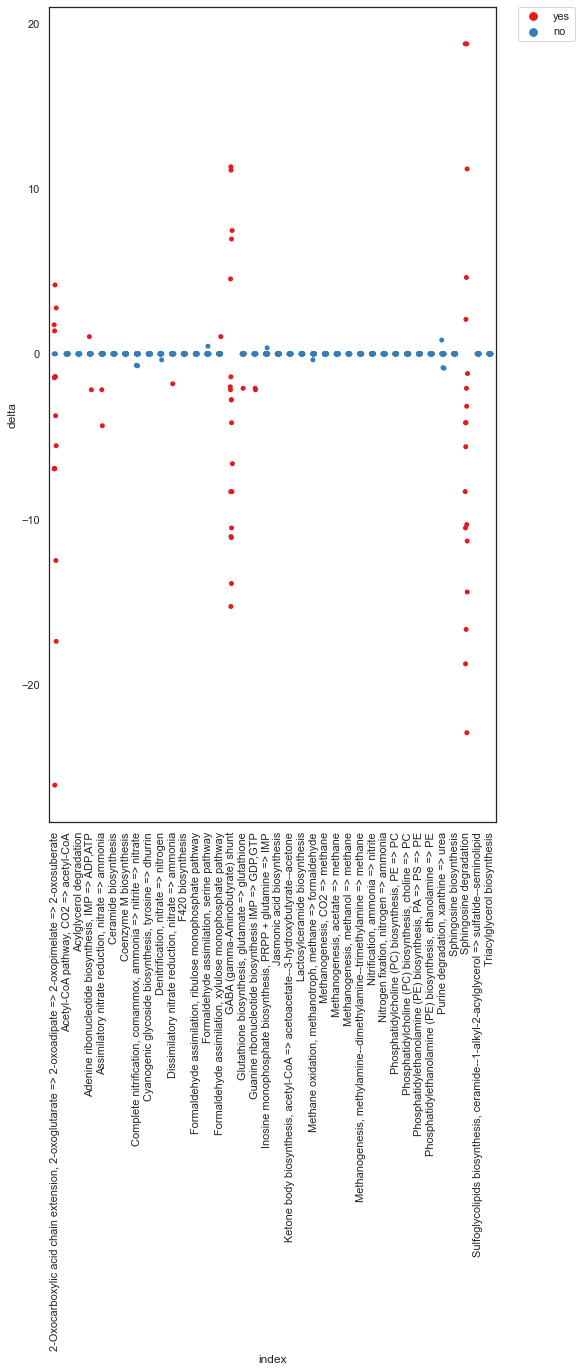

In [760]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set_style('white')
sns.stripplot(data=grap4ingz, x='index', y='delta', hue='outlier', palette='Set1')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('./AZ51_outliers.png', bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate'),
  Text(1, 0, 'GABA (gamma-Aminobutyrate) shunt'),
  Text(2, 0, 'Sphingosine degradation'),
  Text(3, 0, 'Assimilatory nitrate reduction, nitrate => ammonia'),
  Text(4, 0, 'Adenine ribonucleotide biosynthesis, IMP => ADP,ATP'),
  Text(5, 0, 'Formaldehyde assimilation, xylulose monophosphate pathway'),
  Text(6, 0, 'Glutathione biosynthesis, glutamate => glutathione'),
  Text(7, 0, 'Guanine ribonucleotide biosynthesis IMP => GDP,GTP'),
  Text(8, 0, 'Dissimilatory nitrate reduction, nitrate => ammonia')])

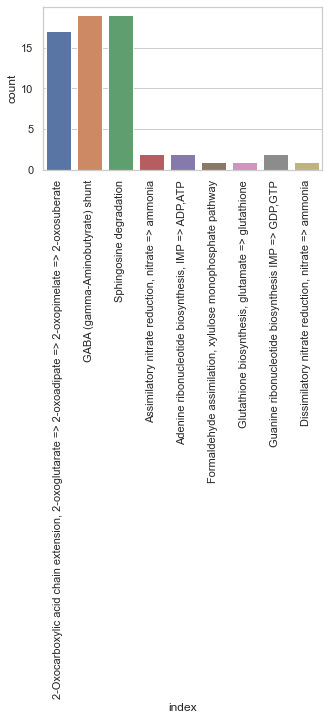

In [761]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style('whitegrid')
g = sns.countplot(data=grap4ingz[grap4ingz['outlier'] == 'yes'], x='index')
plt.xticks(rotation=90)

In [762]:
indv_pathwz = grap4ingz[grap4ingz['outlier'] == 'yes']['index'].unique()
print(len(indv_pathwz))

9


In [763]:
indv_pathwz

array(['2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate',
       'GABA (gamma-Aminobutyrate) shunt', 'Sphingosine degradation',
       'Assimilatory nitrate reduction, nitrate => ammonia',
       'Adenine ribonucleotide biosynthesis, IMP => ADP,ATP',
       'Formaldehyde assimilation, xylulose monophosphate pathway',
       'Glutathione biosynthesis, glutamate => glutathione',
       'Guanine ribonucleotide biosynthesis IMP => GDP,GTP',
       'Dissimilatory nitrate reduction, nitrate => ammonia'],
      dtype=object)

In [771]:
Top3 = ['2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate',
       'GABA (gamma-Aminobutyrate) shunt', 'Sphingosine degradation']

In [772]:
pathwayz3.shape

(38, 1594)

In [773]:
outlier_indv_path = pathwayz3.reset_index()
outlier_indv_path2 = outlier_indv_path[outlier_indv_path.name.isin(Top3)]
outlier_indv_path2

name  41B_Day7_10  \
10                            Sphingosine degradation        50.00   
13  2-Oxocarboxylic acid chain extension, 2-oxoglu...        33.33   
32                   GABA (gamma-Aminobutyrate) shunt        66.67   

    41B_Day7_11  41B_Day7_12  41B_Day7_13  41B_Day7_14  41B_Day7_15  \
10        50.00         0.00         0.00         0.00        50.00   
13        33.33        33.33        33.33        33.33        33.33   
32        66.67        33.33        33.33        33.33        66.67   

    41B_Day7_16  41B_Day7_17  41B_Day7_18  ...  46R_Month6_23  46R_Month6_24  \
10         0.00         0.00         0.00  ...          50.00          50.00   
13        33.33        33.33        33.33  ...          66.67          66.67   
32        33.33        33.33        33.33  ...         100.00         100.00   

    46R_Month6_2  46R_Month6_3  46R_Month6_4  46R_Month6_5  46R_Month6_6  \
10         50.00         50.00          0.00         50.00         50.00   
13         33.33         33.33         33.33         33.33         33.33   
32         66.67         66.67         33.33         66.67         66.67   

    46R_Month6_7  46R_Month6_8  46R_Month6_9  
10         50.00          0.00         50.00  
13         33.33         33.33         33.33  
32         66.67         33.33         66.67  

[3 rows x 1595 columns]

In [774]:
outlier_indv_path2.shape

(3, 1595)

In [775]:
pathway_ind = pd.merge(outlier_indv_path2.set_index('name').T, metadata_non[['mouse', 'collection_timepoint']], left_index=True, right_index=True)
pathway_ind

Sphingosine degradation  \
41B_Day7_10                      50.0   
41B_Day7_11                      50.0   
41B_Day7_12                       0.0   
41B_Day7_13                       0.0   
41B_Day7_14                       0.0   
...                               ...   
46R_Month6_5                     50.0   
46R_Month6_6                     50.0   
46R_Month6_7                     50.0   
46R_Month6_8                      0.0   
46R_Month6_9                     50.0   

              2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
41B_Day7_10                                               33.33                                                        
41B_Day7_11                                               33.33                                                        
41B_Day7_12                                               33.33                                                        
41B_Day7_13                                               33.33                                                        
41B_Day7_14                                               33.33                                                        
...                                                         ...                                                        
46R_Month6_5                                              33.33                                                        
46R_Month6_6                                              33.33                                                        
46R_Month6_7                                              33.33                                                        
46R_Month6_8                                              33.33                                                        
46R_Month6_9                                              33.33                                                        

              GABA (gamma-Aminobutyrate) shunt mouse collection_timepoint  
41B_Day7_10                              66.67   41B                 Day7  
41B_Day7_11                              66.67   41B                 Day7  
41B_Day7_12                              33.33   41B                 Day7  
41B_Day7_13                              33.33   41B                 Day7  
41B_Day7_14                              33.33   41B                 Day7  
...                                        ...   ...                  ...  
46R_Month6_5                             66.67   46R               Month6  
46R_Month6_6                             66.67   46R               Month6  
46R_Month6_7                             66.67   46R               Month6  
46R_Month6_8                             33.33   46R               Month6  
46R_Month6_9                             66.67   46R               Month6  

[1543 rows x 5 columns]

In [776]:
pathway_ind2 = pathway_ind.groupby(by=['mouse', 'collection_timepoint']).mean()
pathway_ind2

Sphingosine degradation  \
mouse collection_timepoint                            
41B   Day7                                14.583333   
      Month1                              37.500000   
      Month3                              39.130435   
      Month6                              33.333333   
41L   Day3                                12.500000   
...                                             ...   
46N   Month10                             35.416667   
      Month6                              23.809524   
46R   Day7                                26.315789   
      Month1                              39.130435   
      Month6                              37.500000   

                            2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
mouse collection_timepoint                                                                                                           
41B   Day7                                                           33.33000                                                        
      Month1                                                         33.33000                                                        
      Month3                                                         33.33000                                                        
      Month6                                                         31.94125                                                        
41L   Day3                                                           33.33000                                                        
...                                                                       ...                                                        
46N   Month10                                                        33.33000                                                        
      Month6                                                         33.33000                                                        
46R   Day7                                                           33.33000                                                        
      Month1                                                         33.33000                                                        
      Month6                                                         33.33000                                                        

                            GABA (gamma-Aminobutyrate) shunt  
mouse collection_timepoint                                    
41B   Day7                                         43.054167  
      Month1                                       56.945833  
      Month3                                       57.972609  
      Month6                                       54.167500  
41L   Day3                                         43.054167  
...                                                      ...  
46N   Month10                                      56.945833  
      Month6                                       57.144286  
46R   Day7                                         50.877368  
      Month1                                       52.174348  
      Month6                                       58.335000  

[67 rows x 3 columns]

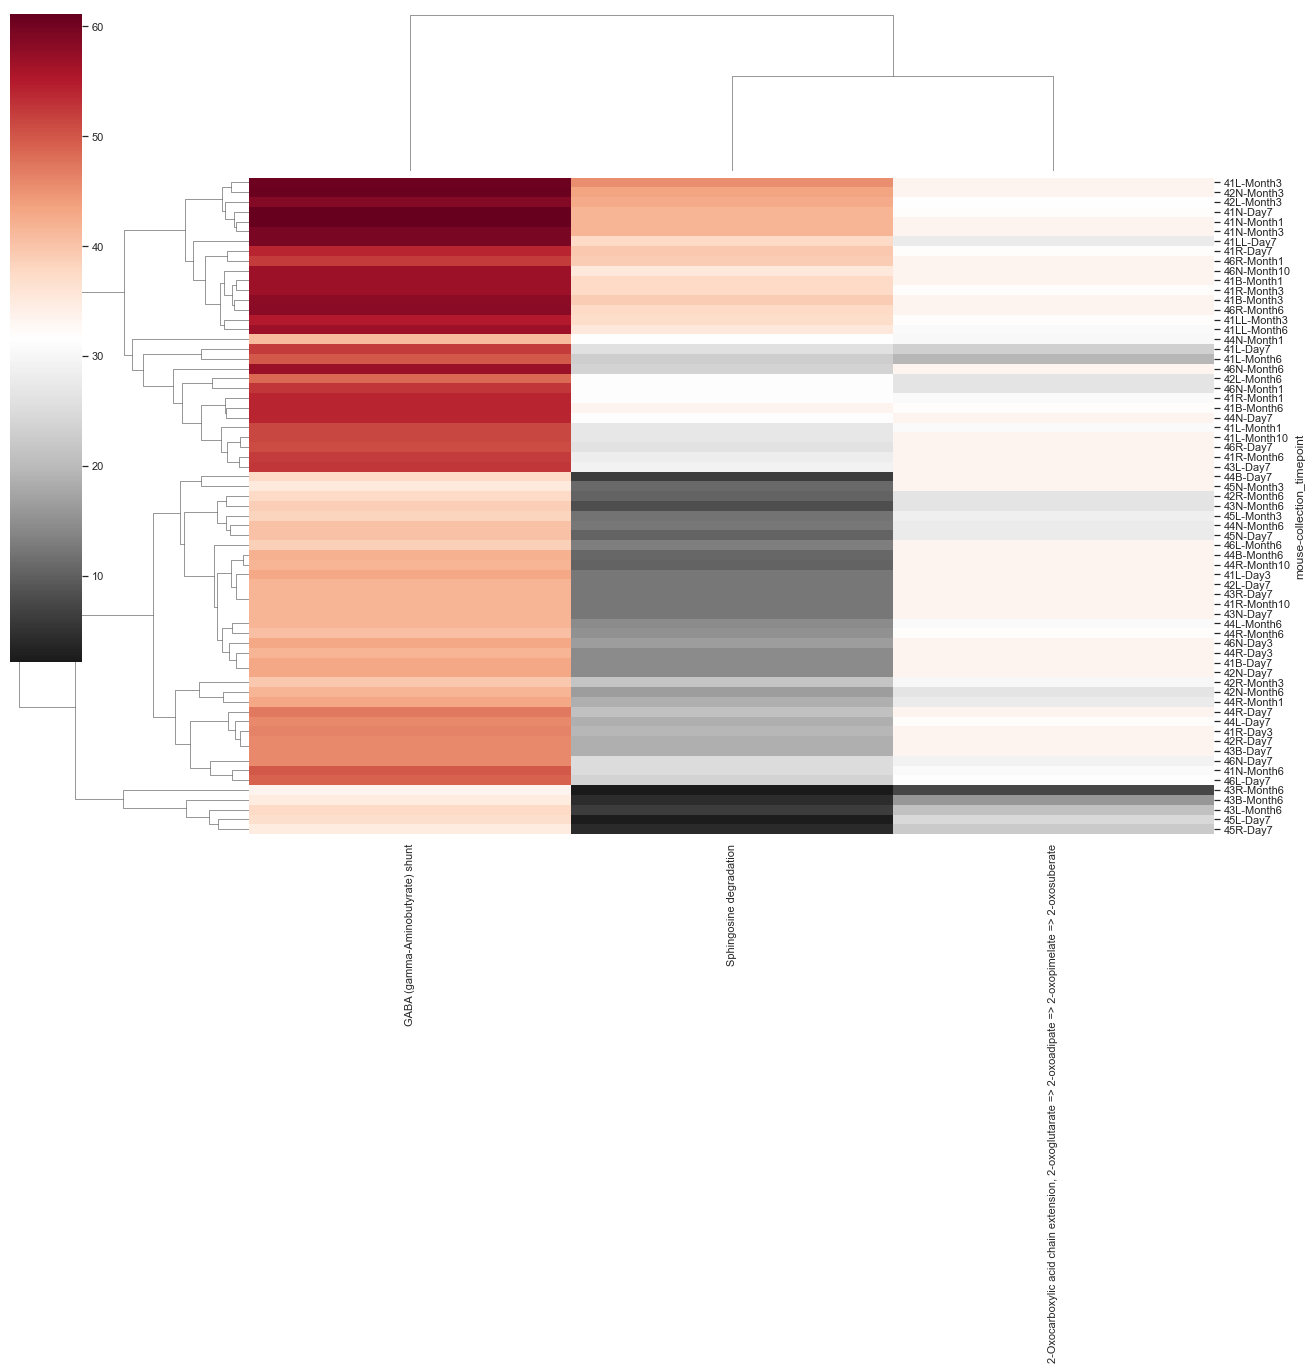

In [777]:
g = sns.clustermap(data=pathway_ind2, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((20,50))
g.savefig('./AZ51_pathway_clustermap_top4.png', dpi=300)

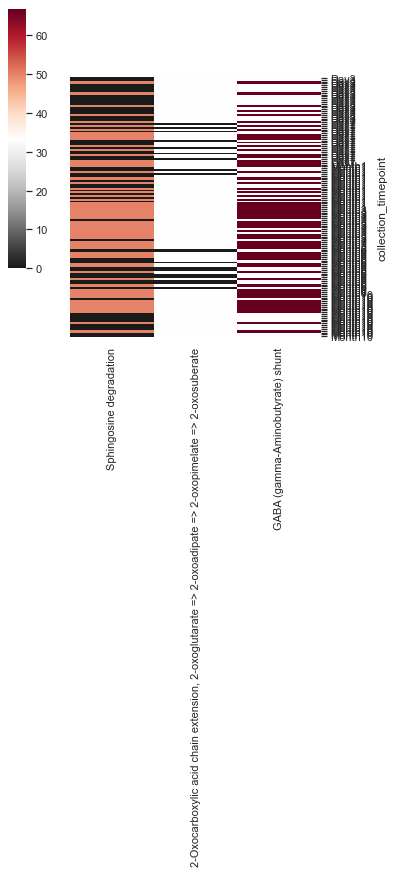

In [789]:
path41L = pathway_ind[pathway_ind['mouse'] == '41L'].copy()
path41L['collection_timepoint'] = pd.Categorical(path41L['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
path41L_grp = path41L.drop(columns=['mouse'])
path41L_grp2 = path41L_grp.set_index('collection_timepoint')
path41L_grp2 = path41L_grp2.sort_index()
#path41L_grp2

g = sns.clustermap(data=path41L_grp2, row_cluster=False, col_cluster=False, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((5,20))
#g.savefig('./AZ51_pathway_clustermap_top4_41L.svg', dpi=300)

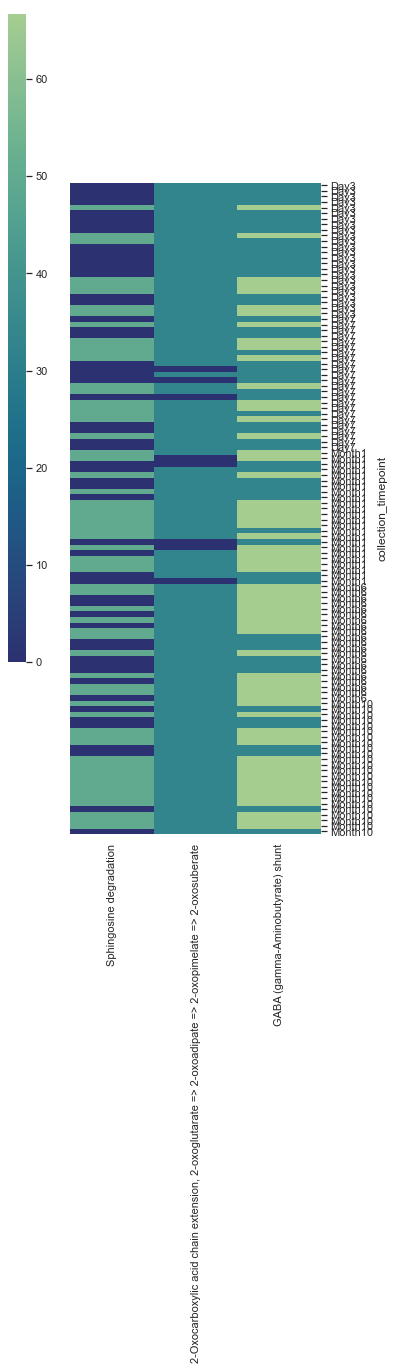

In [816]:
path46N = pathway_ind[pathway_ind['mouse'] == '46N'].copy()
path46N['collection_timepoint'] = pd.Categorical(path46N['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
path46N_grp = path46N.drop(columns=['mouse'])
path46N_grp2 = path46N_grp.set_index('collection_timepoint')
path46N_grp2 = path46N_grp2.sort_index()
#path46N_grp2

g = sns.clustermap(data=path46N_grp2, row_cluster=False, col_cluster=False, 
                   yticklabels=1, xticklabels=1, cmap='crest_r')
g.fig.set_size_inches((5,50))
g.savefig('./AZ51_pathway_clustermap_top4_46N.svg', dpi=300)

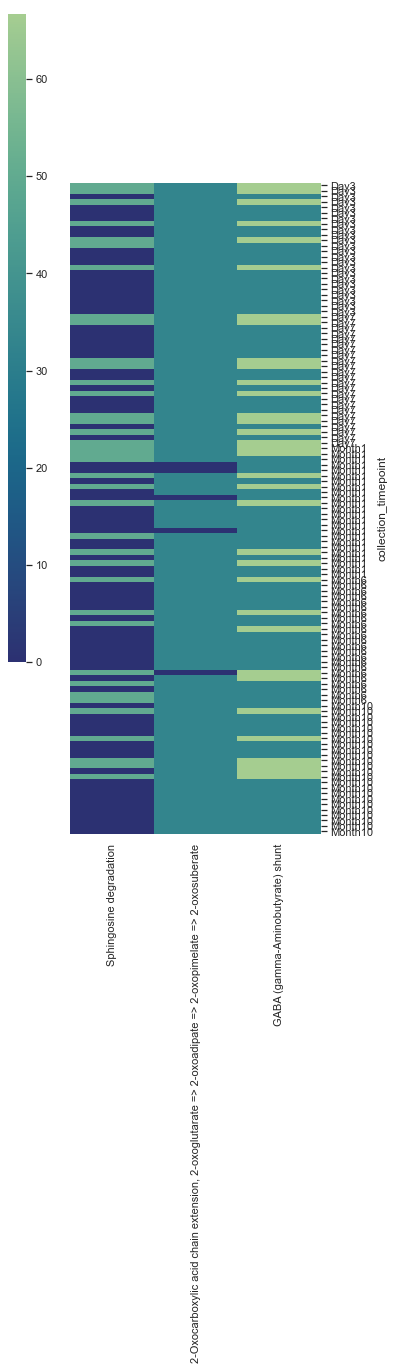

In [817]:
path44R = pathway_ind[pathway_ind['mouse'] == '44R'].copy()
path44R['collection_timepoint'] = pd.Categorical(path44R['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
path44R_grp = path44R.drop(columns=['mouse'])
path44R_grp2 = path44R_grp.set_index('collection_timepoint')
path44R_grp2 = path44R_grp2.sort_index()
#path44R_grp2

g = sns.clustermap(data=path44R_grp2, row_cluster=False, col_cluster=False, 
                   yticklabels=1, xticklabels=1, 
                   cmap='crest_r')
g.fig.set_size_inches((5,50))
g.savefig('./AZ51_pathway_clustermap_top4_44R.svg', dpi=300)

In [778]:
pathway_ind_tp = pd.merge(outlier_indv_path2.set_index('name').T, metadata_non[['collection_timepoint']], left_index=True, right_index=True)
pathway_ind_tp

Sphingosine degradation  \
41B_Day7_10                      50.0   
41B_Day7_11                      50.0   
41B_Day7_12                       0.0   
41B_Day7_13                       0.0   
41B_Day7_14                       0.0   
...                               ...   
46R_Month6_5                     50.0   
46R_Month6_6                     50.0   
46R_Month6_7                     50.0   
46R_Month6_8                      0.0   
46R_Month6_9                     50.0   

              2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
41B_Day7_10                                               33.33                                                        
41B_Day7_11                                               33.33                                                        
41B_Day7_12                                               33.33                                                        
41B_Day7_13                                               33.33                                                        
41B_Day7_14                                               33.33                                                        
...                                                         ...                                                        
46R_Month6_5                                              33.33                                                        
46R_Month6_6                                              33.33                                                        
46R_Month6_7                                              33.33                                                        
46R_Month6_8                                              33.33                                                        
46R_Month6_9                                              33.33                                                        

              GABA (gamma-Aminobutyrate) shunt collection_timepoint  
41B_Day7_10                              66.67                 Day7  
41B_Day7_11                              66.67                 Day7  
41B_Day7_12                              33.33                 Day7  
41B_Day7_13                              33.33                 Day7  
41B_Day7_14                              33.33                 Day7  
...                                        ...                  ...  
46R_Month6_5                             66.67               Month6  
46R_Month6_6                             66.67               Month6  
46R_Month6_7                             66.67               Month6  
46R_Month6_8                             33.33               Month6  
46R_Month6_9                             66.67               Month6  

[1543 rows x 4 columns]

In [779]:
pathway_ind_tp2 = pathway_ind_tp.groupby(by=['collection_timepoint']).mean()
pathway_ind_tp3 = pathway_ind_tp2.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
pathway_ind_tp3

Sphingosine degradation  \
collection_timepoint                            
Day3                                15.789474   
Day7                                20.410156   
Month1                              32.275132   
Month3                              33.863636   
Month6                              18.097448   
Month10                             21.354167   

                      2-Oxocarboxylic acid chain extension, 2-oxoglutarate => 2-oxoadipate => 2-oxopimelate => 2-oxosuberate  \
collection_timepoint                                                                                                           
Day3                                                          33.330000                                                        
Day7                                                          31.051582                                                        
Month1                                                        30.684762                                                        
Month3                                                        32.118000                                                        
Month6                                                        27.066125                                                        
Month10                                                       33.330000                                                        

                      GABA (gamma-Aminobutyrate) shunt  
collection_timepoint                                    
Day3                                         43.507474  
Day7                                         46.613906  
Month1                                       51.675767  
Month3                                       52.879364  
Month6                                       44.623828  
Month10                                      47.916250

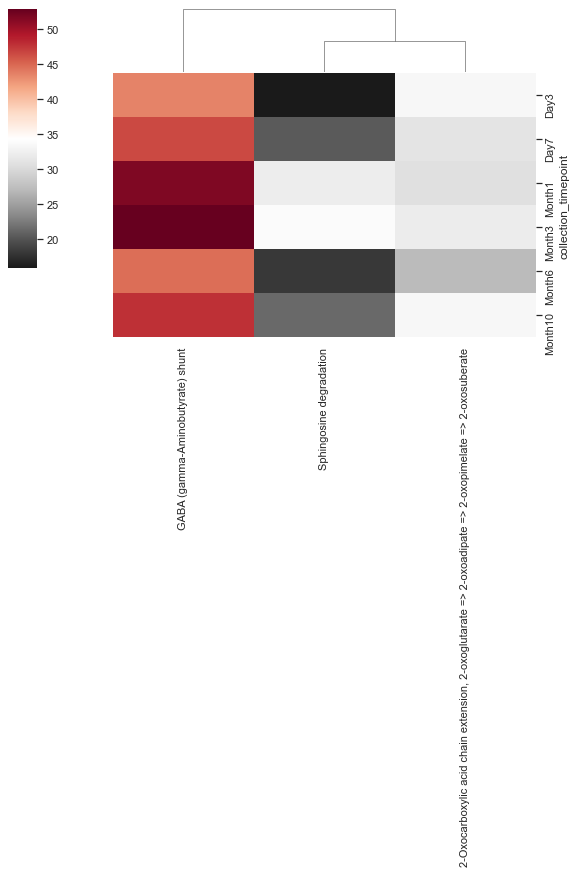

In [783]:
g = sns.clustermap(data=pathway_ind_tp3, row_cluster=False, yticklabels=1, xticklabels=1, cmap='RdGy_r')
g.fig.set_size_inches((8,20))
#g.savefig('./AZ51_pathway_clustermap_top4_bytp.png', dpi=300)